<a href="https://colab.research.google.com/github/gilangrr1042/analisis-sentimen-opini-masyarakat-terhadap-kinerja-pemerintah-kab-berau-2021-2024-dg-svm-dan-lda/blob/main/sentimen_SVM_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Modul

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report
import nltk

nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline
from wordcloud import WordCloud, STOPWORDS
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


#Data Reading


In [ ]:
file_path = '/content/drive/My Drive/Data Tugas Akhir/Proses Model/Data Baru.xlsx'
df = pd.read_excel(file_path)
df

,Timestamp,Nama Lengkap,Usia,Pekerjaan,Lama Waktu Tinggal di Kabupaten Berau,Alamat Tinggal Kecamatan,Alamat Tinggal Kelurahan/Kampung,Alamat Tinggal Kelurahan/Kampung.1,Alamat Tinggal Kelurahan/Kampung.2,Alamat Tinggal Kelurahan/Kampung.3,...,pertanyaan5,pertanyaan6,pertanyaan7,pertanyaan8,pertanyaan9,pertanyaan10,pertanyaan11,pertanyaan12,pertanyaan13,pertanyaan14
0,2025-04-23 14:25:52.490,Ahmad Riza,40,Penjahit,Lebih dari 15 tahun,Teluk Bayur,NaN,NaN,NaN,NaN,...,Bantuan alat jahit belum pernah dapat.,UMKM kreatif perlu promosi.,Wisata kerajinan bisa dikembangkan,Harga bahan baku kadang mahal.,Pangan cukup.,Jalan cukup bagus.,Ojek tersedia.,Sampah dijemput mingguan.,Info anggaran lewat RT.,Pelayanan desa baik.
1,2025-04-22 12:50:36.024,Akhmad Firdaus,34,Pegawai Negeri Sipil (PNS),Lebih dari 15 tahun,Tanjung Redeb,NaN,NaN,NaN,NaN,...,Bantuan sosial tdk selalu tepat sasaran.,"UMKM mulai dapet perhatian, tp akses modal msh...","Pariwisata tumbuh, tp tdk semua destinasi dira...","Dukungan sektor primer lumayan, tp hasil panen...","Ketahanan pangan blm merata, masih tergantung ...","Infrastruktur dasar cukup bagus, tp air bersih...",Konektivitas membaik dgn jln penghubung baru.,Kualitas lingkungan agak menurun karena aktivi...,"Akuntabilitas meningkat, tp butuh transparansi...",Pelayanan publik makin ramah dan terorganisir.
2,2025-04-22 15:28:51.801,Amelia Putri,22,Pelayan Toko,10 - 15 Tahun,Teluk Bayur,NaN,NaN,NaN,NaN,...,"Program bansos membantu, tp kadang telat.",UMKM butuh lebih bnyk pelatihan digital.,Wisata bagus tp kurang promosi online.,Petani msh ngeluh soal bibit & pupuk mahal.,"Pangan udah stabil skrg, tp masih mahal di tok...","Jalan besar udah diperbaiki, tp jln kampung ms...","Mobilitas makin gampang, tp transportasi msh m...",Sampah makin bnyk di sekitaran pasar.,"Pemerintah udah mulai transparan, tp tdk semua...","Pelayanan publik sdh baik, terutama pelayanan ..."
3,2025-04-23 21:27:48.288,Arif Rahman,40,Pegawai Negeri Sipil (PNS),10 - 15 Tahun,Batu Putih,Batu Putih,NaN,NaN,NaN,...,Pendataan miskin msh kurang valid.,UMKM perlu masuk kurikulum pelatihan juga.,Wisata bisa jadi potensi edukatif jika dikemba...,Sektor pertanian perlu pendekatan teknologi te...,Ketahanan pangan butuh kerja sama antar instansi.,Infrastruktur pendukung sekolah msh kurang.,Akses antar sekolah dan pemukiman msh minim.,Lingkungan sekolah perlu penghijauan.,Akuntabilitas harus melibatkan komite sekolah.,"Pelayanan publik di bidang pendidikan cukup, t..."
4,2025-04-22 13:11:06.747,Ayu Maharani,32,Karyawan Swasta,5 - 10 Tahun,Teluk Bayur,NaN,NaN,NaN,NaN,...,Bantuan pemerintah belum menjangkau semua warg...,UMKM kreatif perlu akses pameran dan promosi d...,"Tempat wisata banyak yang cantik, tapi sayangn...","Produksi pangan lokal bagus, tapi kalah bersai...",Ketahanan pangan bisa diperkuat dengan mengaja...,Infrastruktur dasar seperti listrik dan air be...,Transportasi antarkecamatan gak terjadwal deng...,Lingkungan mulai dipenuhi bangunan tanpa kontr...,Saya pengen lihat laporan keuangan desa dipaja...,"Pelayanan publik ramah, tapi sistemnya kadang ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2306,2025-11-27 10:23:54.000,Zulkifli Amin,53,Petani,Lebih dari 15 tahun,Biatan,NaN,Biatan Ulu,NaN,NaN,...,"Harga padi lokal murah, gabah dijual ke luar d...","Beras merah Berau enak, tp blm punya merek. Bi...","Sawah bisa jadi agrowisata, tp akses jalan jel...","Pupuk subsidi tdk cukup, apalagi kalo musim hu...","Pangan utama nasi, tp kurang sayur. Harusnya d...","Irigasi rusak, air tdk merata. Harusnya diperb...",Truk pengangkut padi sering mogok di jalan rus...,Lahan sawah mulai berkurang krn alih fungsi. H...,Dana pertanian tdk jelas realisasinya. Warga b...,Urus surat tanah lama banget. Harusnya ada lay...
2307,2025-04-23 16:07:43.488,zulkifli hanafiah,30,Nelayan,Lebih dari 15 tahun,Sambaliung,NaN,NaN,NaN,NaN,...,"Bantuan miskin ada, tp msh byk yg tdk dapat pa...",UMKM di pesisir jarang diperhatikan.,"W

#Data dipilih dan disatukan

In [ ]:
data = []

for i in range(1, 15):
    temp = df[[f'pertanyaan{i}']].copy()
    temp.columns = ['pertanyaan']
    data.append(temp)

df_long = pd.concat(data, ignore_index=True)
df_long = df_long.dropna()
df_long

,pertanyaan
0,Pemerintah mulai dukung ekonomi kreatif.
1,Kinerja pemerintah sdh cukup baik scr umum.
2,"Kinerja pemerintah udh ad perubahan, tp blm rata."
3,Kinerja pemda cukup terlihat di sektor pendidi...
4,Saya merasa pemerintah sudah mencoba berbagai ...
...,...
32349,Urus surat tanah lama banget. Harusnya ada lay...
32350,"Pelayanan publik jarang ada di kampung, mesti ..."
32351,"Pelayanan publik lambat, krn petugas jarang st..."
32352,Pelayanan publik msh lambat krn jarak dan fasi...


#Menghapus duplicates

In [ ]:
df_long = df_long.drop_duplicates(subset='pertanyaan')
df_long.head()
df = df_long.dropna()
df_long

,pertanyaan
0,Pemerintah mulai dukung ekonomi kreatif.
1,Kinerja pemerintah sdh cukup baik scr umum.
2,"Kinerja pemerintah udh ad perubahan, tp blm rata."
3,Kinerja pemda cukup terlihat di sektor pendidi...
4,Saya merasa pemerintah sudah mencoba berbagai ...
...,...
32349,Urus surat tanah lama banget. Harusnya ada lay...
32350,"Pelayanan publik jarang ada di kampung, mesti ..."
32351,"Pelayanan publik lambat, krn petugas jarang st..."
32352,Pelayanan publik msh lambat krn jarak dan fasi...


#Cleaning Data

In [ ]:
import re
import pandas as pd
def clean_ig_data(textt):

    textt = re.sub(r'\.{2,}', ' ', textt)
    textt = re.sub(r'\,{2,}', ' ', textt)
    textt = re.sub(r'"', ' ', textt)
    textt = re.sub(r'[^A-Za-z0-9\s,]', '', textt)
    textt = re.sub(r'\s+', ' ', textt).strip()

    return textt

df['cleaning'] = df['pertanyaan'].apply(clean_ig_data)
df

,pertanyaan,cleaning
0,Pemerintah mulai dukung ekonomi kreatif.,Pemerintah mulai dukung ekonomi kreatif
1,Kinerja pemerintah sdh cukup baik scr umum.,Kinerja pemerintah sdh cukup baik scr umum
2,"Kinerja pemerintah udh ad perubahan, tp blm rata.","Kinerja pemerintah udh ad perubahan, tp blm rata"
3,Kinerja pemda cukup terlihat di sektor pendidi...,Kinerja pemda cukup terlihat di sektor pendidikan
4,Saya merasa pemerintah sudah mencoba berbagai ...,Saya merasa pemerintah sudah mencoba berbagai ...
...,...,...
32349,Urus surat tanah lama banget. Harusnya ada lay...,Urus surat tanah lama banget Harusnya ada laya...
32350,"Pelayanan publik jarang ada di kampung, mesti ...","Pelayanan publik jarang ada di kampung, mesti ..."
32351,"Pelayanan publik lambat, krn petugas jarang st...","Pelayanan publik lambat, krn petugas jarang st..."
32352,Pelayanan publik msh lambat krn jarak dan fasi...,Pelayanan publik msh lambat krn jarak dan fasi...


#Casefolding

In [ ]:
df['case_folding'] = df['cleaning'].str.lower()
df

,pertanyaan,cleaning,case_folding
0,Pemerintah mulai dukung ekonomi kreatif.,Pemerintah mulai dukung ekonomi kreatif,pemerintah mulai dukung ekonomi kreatif
1,Kinerja pemerintah sdh cukup baik scr umum.,Kinerja pemerintah sdh cukup baik scr umum,kinerja pemerintah sdh cukup baik scr umum
2,"Kinerja pemerintah udh ad perubahan, tp blm rata.","Kinerja pemerintah udh ad perubahan, tp blm rata","kinerja pemerintah udh ad perubahan, tp blm rata"
3,Kinerja pemda cukup terlihat di sektor pendidi...,Kinerja pemda cukup terlihat di sektor pendidikan,kinerja pemda cukup terlihat di sektor pendidikan
4,Saya merasa pemerintah sudah mencoba berbagai ...,Saya merasa pemerintah sudah mencoba berbagai ...,saya merasa pemerintah sudah mencoba berbagai ...
...,...,...,...
32349,Urus surat tanah lama banget. Harusnya ada lay...,Urus surat tanah lama banget Harusnya ada laya...,urus surat tanah lama banget harusnya ada laya...
32350,"Pelayanan publik jarang ada di kampung, mesti ...","Pelayanan publik jarang ada di kampung, mesti ...","pelayanan publik jarang ada di kampung, mesti ..."
32351,"Pelayanan publik lambat, krn petugas jarang st...","Pelayanan publik lambat, krn petugas jarang st...","pelayanan publik lambat, krn petugas jarang st..."
32352,Pelayanan publik msh lambat krn jarak dan fasi...,Pelayanan publik msh lambat krn jarak dan fasi...,pelayanan publik msh lambat krn jarak dan fasi...


#Normalization

In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Data Tugas Akhir/Proses Model/kamus_norm.txt'

def load_kamus_normalisasi(file_path):
    kamus = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            if '=' in line:
                tidak_baku, baku = line.strip().split('=')
                kamus[tidak_baku.lower()] = baku.lower()
    return kamus

def normalisasi_teks(teks, kamus):
    if pd.isnull(teks):
        return ''
    kata_kata = teks.split()
    hasil = [kamus.get(k.lower(), k) for k in kata_kata]
    return ' '.join(hasil)

kamus = load_kamus_normalisasi(file_path)

df['normalize'] = df['case_folding'].apply(lambda x: normalisasi_teks(x, kamus))
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,pertanyaan,cleaning,case_folding,normalize
0,Pemerintah mulai dukung ekonomi kreatif.,Pemerintah mulai dukung ekonomi kreatif,pemerintah mulai dukung ekonomi kreatif,pemerintah mulai dukung ekonomi kreatif
1,Kinerja pemerintah sdh cukup baik scr umum.,Kinerja pemerintah sdh cukup baik scr umum,kinerja pemerintah sdh cukup baik scr umum,kinerja pemerintah sudah cukup baik scr umum
2,"Kinerja pemerintah udh ad perubahan, tp blm rata.","Kinerja pemerintah udh ad perubahan, tp blm rata","kinerja pemerintah udh ad perubahan, tp blm rata","kinerja pemerintah sudah ad perubahan, tapi be..."
3,Kinerja pemda cukup terlihat di sektor pendidi...,Kinerja pemda cukup terlihat di sektor pendidikan,kinerja pemda cukup terlihat di sektor pendidikan,kinerja pemerintah daerah cukup terlihat di se...
4,Saya merasa pemerintah sudah mencoba berbagai ...,Saya merasa pemerintah sudah mencoba berbagai ...,saya merasa pemerintah sudah mencoba berbagai ...,saya merasa pemerintah sudah mencoba berbagai ...
...,...,...,...,...
32349,Urus surat tanah lama banget. Harusnya ada lay...,Urus surat tanah lama banget Harusnya ada laya...,urus surat tanah lama banget harusnya ada laya...,urus surat tanah lama sangat harusnya ada laya...
32350,"Pelayanan publik jarang ada di kampung, mesti ...","Pelayanan publik jarang ada di kampung, mesti ...","pelayanan publik jarang ada di kampung, mesti ...","pelayanan publik jarang ada di kampung, mesti ..."
32351,"Pelayanan publik lambat, krn petugas jarang st...","Pelayanan publik lambat, krn petugas jarang st...","pelayanan publik lambat, krn petugas jarang st...","pelayanan publik lambat, karena petugas jarang..."
32352,Pelayanan publik msh lambat krn jarak dan fasi...,Pelayanan publik msh lambat krn jarak dan fasi...,pelayanan publik msh lambat krn jarak dan fasi...,pelayanan publik masih lambat karena jarak dan...


#Tokenization


In [ ]:
df['tokenize'] = df['normalize'].apply(lambda x: x.split())
df

,pertanyaan,cleaning,case_folding,normalize,tokenize
0,Pemerintah mulai dukung ekonomi kreatif.,Pemerintah mulai dukung ekonomi kreatif,pemerintah mulai dukung ekonomi kreatif,pemerintah mulai dukung ekonomi kreatif,"[pemerintah, mulai, dukung, ekonomi, kreatif]"
1,Kinerja pemerintah sdh cukup baik scr umum.,Kinerja pemerintah sdh cukup baik scr umum,kinerja pemerintah sdh cukup baik scr umum,kinerja pemerintah sudah cukup baik scr umum,"[kinerja, pemerintah, sudah, cukup, baik, scr,..."
2,"Kinerja pemerintah udh ad perubahan, tp blm rata.","Kinerja pemerintah udh ad perubahan, tp blm rata","kinerja pemerintah udh ad perubahan, tp blm rata","kinerja pemerintah sudah ad perubahan, tapi be...","[kinerja, pemerintah, sudah, ad, perubahan,, t..."
3,Kinerja pemda cukup terlihat di sektor pendidi...,Kinerja pemda cukup terlihat di sektor pendidikan,kinerja pemda cukup terlihat di sektor pendidikan,kinerja pemerintah daerah cukup terlihat di se...,"[kinerja, pemerintah, daerah, cukup, terlihat,..."
4,Saya merasa pemerintah sudah mencoba berbagai ...,Saya merasa pemerintah sudah mencoba berbagai ...,saya merasa pemerintah sudah mencoba berbagai ...,saya merasa pemerintah sudah mencoba berbagai ...,"[saya, merasa, pemerintah, sudah, mencoba, ber..."
...,...,...,...,...,...
32349,Urus surat tanah lama banget. Harusnya ada lay...,Urus surat tanah lama banget Harusnya ada laya...,urus surat tanah lama banget harusnya ada laya...,urus surat tanah lama sangat harusnya ada laya...,"[urus, surat, tanah, lama, sangat, harusnya, a..."
32350,"Pelayanan publik jarang ada di kampung, mesti ...","Pelayanan publik jarang ada di kampung, mesti ...","pelayanan publik jarang ada di kampung, mesti ...","pelayanan publik jarang ada di kampung, mesti ...","[pelayanan, publik, jarang, ada, di, kampung,,..."
32351,"Pelayanan publik lambat, krn petugas jarang st...","Pelayanan publik lambat, krn petugas jarang st...","pelayanan publik lambat, krn petugas jarang st...","pelayanan publik lambat, karena petugas jarang...","[pelayanan, publik, lambat,, karena, petugas, ..."
32352,Pelayanan publik msh lambat krn jarak dan fasi...,Pelayanan publik msh lambat krn jarak dan fasi...,pelayanan publik msh lambat krn jarak dan fasi...,pelayanan publik masih lambat karena jarak dan...,"[pelayanan, publik, masih, lambat, karena, jar..."


#Stopwords Removal

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_word = stopwords.words('indonesian')

def remove_stopwords(text):
    return [word for word in text if word not in stop_word]

df['stopword_removal'] = df['tokenize'].apply(lambda x: remove_stopwords(x))
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,pertanyaan,cleaning,case_folding,normalize,tokenize,stopword_removal
0,Pemerintah mulai dukung ekonomi kreatif.,Pemerintah mulai dukung ekonomi kreatif,pemerintah mulai dukung ekonomi kreatif,pemerintah mulai dukung ekonomi kreatif,"[pemerintah, mulai, dukung, ekonomi, kreatif]","[pemerintah, dukung, ekonomi, kreatif]"
1,Kinerja pemerintah sdh cukup baik scr umum.,Kinerja pemerintah sdh cukup baik scr umum,kinerja pemerintah sdh cukup baik scr umum,kinerja pemerintah sudah cukup baik scr umum,"[kinerja, pemerintah, sudah, cukup, baik, scr,...","[kinerja, pemerintah, scr]"
2,"Kinerja pemerintah udh ad perubahan, tp blm rata.","Kinerja pemerintah udh ad perubahan, tp blm rata","kinerja pemerintah udh ad perubahan, tp blm rata","kinerja pemerintah sudah ad perubahan, tapi be...","[kinerja, pemerintah, sudah, ad, perubahan,, t...","[kinerja, pemerintah, ad, perubahan,]"
3,Kinerja pemda cukup terlihat di sektor pendidi...,Kinerja pemda cukup terlihat di sektor pendidikan,kinerja pemda cukup terlihat di sektor pendidikan,kinerja pemerintah daerah cukup terlihat di se...,"[kinerja, pemerintah, daerah, cukup, terlihat,...","[kinerja, pemerintah, daerah, sektor, pendidikan]"
4,Saya merasa pemerintah sudah mencoba berbagai ...,Saya merasa pemerintah sudah mencoba berbagai ...,saya merasa pemerintah sudah mencoba berbagai ...,saya merasa pemerintah sudah mencoba berbagai ...,"[saya, merasa, pemerintah, sudah, mencoba, ber...","[pemerintah, mencoba, cara,, menyentuh, sektor..."
...,...,...,...,...,...,...
32349,Urus surat tanah lama banget. Harusnya ada lay...,Urus surat tanah lama banget Harusnya ada laya...,urus surat tanah lama banget harusnya ada laya...,urus surat tanah lama sangat harusnya ada laya...,"[urus, surat, tanah, lama, sangat, harusnya, a...","[urus, surat, tanah, layanan, keliling, desa]"
32350,"Pelayanan publik jarang ada di kampung, mesti ...","Pelayanan publik jarang ada di kampung, mesti ...","pelayanan publik jarang ada di kampung, mesti ...","pelayanan publik jarang ada di kampung, mesti ...","[pelayanan, publik, jarang, ada, di, kampung,,...","[pelayanan, publik, jarang, kampung,, mesti, k..."
32351,"Pelayanan publik lambat, krn petugas jarang st...","Pelayanan publik lambat, krn petugas jarang st...","pelayanan publik lambat, krn petugas jarang st...","pelayanan publik lambat, karena petugas jarang...","[pelayanan, publik, lambat,, karena, petugas, ...","[pelayanan, publik, lambat,, petugas, jarang, ..."
32352,Pelayanan publik msh lambat krn jarak dan fasi...,Pelayanan publik msh lambat krn jarak dan fasi...,pelayanan publik msh lambat krn jarak dan fasi...,pelayanan publik masih lambat karena jarak dan...,"[pelayanan, publik, masih, lambat, karena, jar...","[pelayanan, publik, lambat, jarak, fasilitas, ..."


#Lemmatization

In [ ]:
!pip install simplemma

import pandas as pd
import simplemma

# Contoh DataFrame (asumsi sudah ada)
# df = pd.DataFrame({'stopword_removal': [...]})

def lemmatization(text_list):
    """
    Fungsi untuk melakukan lemmatisasi pada teks.
    Fungsi ini akan memproses kata-kata per individu.
    """
    if not isinstance(text_list, list):
        # Handle cases where input might not be a list (e.g., NaN after dropna earlier)
        return ''

    # Melakukan lemmatisasi pada setiap token dalam list
    # Menggunakan 'lang='id'' untuk bahasa Indonesia
    lemmatized_tokens = [simplemma.lemmatize(word, lang='id') for word in text_list]

    # Menggabungkan kembali token-token yang sudah dilemmatisasi menjadi string
    return ' '.join(lemmatized_tokens)

# Terapkan fungsi lemmatisasi ke kolom 'stopword_removal'
df['lemmatization'] = df['stopword_removal'].apply(lemmatization)
df

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.2/67.2 MB 14.1 MB/s eta 0:00:00


,pertanyaan,cleaning,case_folding,normalize,tokenize,stopword_removal,lemmatization
0,Pemerintah mulai dukung ekonomi kreatif.,Pemerintah mulai dukung ekonomi kreatif,pemerintah mulai dukung ekonomi kreatif,pemerintah mulai dukung ekonomi kreatif,"[pemerintah, mulai, dukung, ekonomi, kreatif]","[pemerintah, dukung, ekonomi, kreatif]",perintah dukung ekonomi kreatif
1,Kinerja pemerintah sdh cukup baik scr umum.,Kinerja pemerintah sdh cukup baik scr umum,kinerja pemerintah sdh cukup baik scr umum,kinerja pemerintah sudah cukup baik scr umum,"[kinerja, pemerintah, sudah, cukup, baik, scr,...","[kinerja, pemerintah, scr]",kinerja perintah scr
2,"Kinerja pemerintah udh ad perubahan, tp blm rata.","Kinerja pemerintah udh ad perubahan, tp blm rata","kinerja pemerintah udh ad perubahan, tp blm rata","kinerja pemerintah sudah ad perubahan, tapi be...","[kinerja, pemerintah, sudah, ad, perubahan,, t...","[kinerja, pemerintah, ad, perubahan,]","kinerja perintah ad perubahan,"
3,Kinerja pemda cukup terlihat di sektor pendidi...,Kinerja pemda cukup terlihat di sektor pendidikan,kinerja pemda cukup terlihat di sektor pendidikan,kinerja pemerintah daerah cukup terlihat di se...,"[kinerja, pemerintah, daerah, cukup, terlihat,...","[kinerja, pemerintah, daerah, sektor, pendidikan]",kinerja perintah daerah sektor didik
4,Saya merasa pemerintah sudah mencoba berbagai ...,Saya merasa pemerintah sudah mencoba berbagai ...,saya merasa pemerintah sudah mencoba berbagai ...,saya merasa pemerintah sudah mencoba berbagai ...,"[saya, merasa, pemerintah, sudah, mencoba, ber...","[pemerintah, mencoba, cara,, menyentuh, sektor...","perintah coba cara, sentuh sektor kreatif gaya..."
...,...,...,...,...,...,...,...
32349,Urus surat tanah lama banget. Harusnya ada lay...,Urus surat tanah lama banget Harusnya ada laya...,urus surat tanah lama banget harusnya ada laya...,urus surat tanah lama sangat harusnya ada laya...,"[urus, surat, tanah, lama, sangat, harusnya, a...","[urus, surat, tanah, layanan, keliling, desa]",urus surat tanah layan keliling desa
32350,"Pelayanan publik jarang ada di kampung, mesti ...","Pelayanan publik jarang ada di kampung, mesti ...","pelayanan publik jarang ada di kampung, mesti ...","pelayanan publik jarang ada di kampung, mesti ...","[pelayanan, publik, jarang, ada, di, kampung,,...","[pelayanan, publik, jarang, kampung,, mesti, k...","layan publik jarang kampung, mesti kota"
32351,"Pelayanan publik lambat, krn petugas jarang st...","Pelayanan publik lambat, krn petugas jarang st...","pelayanan publik lambat, krn petugas jarang st...","pelayanan publik lambat, karena petugas jarang...","[pelayanan, publik, lambat,, karena, petugas, ...","[pelayanan, publik, lambat,, petugas, jarang, ...","layan publik lambat, petugas jarang standby"
32352,Pelayanan publik msh lambat krn jarak dan fasi...,Pelayanan publik msh lambat krn jarak dan fasi...,pelayanan publik msh lambat krn jarak dan fasi...,pelayanan publik masih lambat karena jarak dan...,"[pelayanan, publik, masih, lambat, karena, jar...","[pelayanan, publik, lambat, jarak, fasilitas, ...",layan publik lambat jarak fasilitas terbatas


#Labelling

In [ ]:
positive_words = ['baik', 'bagus', 'lumayan', 'oke', 'cepat', 'bersih','membaik', 'aman', 'meningkat', 'diperbaiki', 'ditingkatkan', 'membantu', 'lancar', 'berkembang', 'suka', 'mudah', 'gratis', 'maju', 'rapi', 'nyaman', 'meningkatkan', 'memadai', 'responsif', 'semakin', 'tersedia', 'semoga', 'positif', 'mendukung', 'memuaskan', 'efisien', 'memberikan', 'perbaiki', 'mantap', 'tertib', 'optimal', 'kecepatan', 'dipermudah', 'menjaga', 'puas', 'alhamdulillah', 'memudahkan', 'berkualitas', 'rajin', 'tingkatkan', 'berhasil', 'apresiasi', 'dipercepat', 'diapresiasi']


negative_words = ['kurang', 'susah', 'rusak', 'turun', 'minim', 'mahal', 'lambat', 'terbatas', 'lama', 'sulit', 'masalah', 'menurun', 'parah', 'sedikit', 'kotor', 'buruk', 'kekurangan', 'berkurang', 'jelek', 'rendah', 'kesulitan', 'turunkan', 'nganggur', 'merusak', 'dijangkau', 'terlambat', 'kurangi', 'menurunkan', 'gagal', 'kurangnya', 'tercemar', 'sayangnya']


# Fungsi yang diperbaiki
def label_with_dictionary(text, pos_dict, neg_dict):

    # Jika text berupa string → split ke list
    if isinstance(text, str):
        words = text.split()

    # Jika text sudah list → gunakan langsung
    elif isinstance(text, list):
        words = text

    # Jika NaN atau tipe lain → kosong
    else:
        words = []

    # Hitung jumlah kata positif & negatif
    pos_count = sum(1 for w in words if w in pos_dict)
    neg_count = sum(1 for w in words if w in neg_dict)

    # Tentukan hasil
    return 'positive' if pos_count >= neg_count else 'negative'


# Terapkan ke dataframe
df['dict_sentimen'] = df['lemmatization'].apply(
    lambda x: label_with_dictionary(x, positive_words, negative_words)
)

df

,pertanyaan,cleaning,case_folding,normalize,tokenize,stopword_removal,lemmatization,dict_sentimen
0,Pemerintah mulai dukung ekonomi kreatif.,Pemerintah mulai dukung ekonomi kreatif,pemerintah mulai dukung ekonomi kreatif,pemerintah mulai dukung ekonomi kreatif,"[pemerintah, mulai, dukung, ekonomi, kreatif]","[pemerintah, dukung, ekonomi, kreatif]",perintah dukung ekonomi kreatif,positive
1,Kinerja pemerintah sdh cukup baik scr umum.,Kinerja pemerintah sdh cukup baik scr umum,kinerja pemerintah sdh cukup baik scr umum,kinerja pemerintah sudah cukup baik scr umum,"[kinerja, pemerintah, sudah, cukup, baik, scr,...","[kinerja, pemerintah, scr]",kinerja perintah scr,positive
2,"Kinerja pemerintah udh ad perubahan, tp blm rata.","Kinerja pemerintah udh ad perubahan, tp blm rata","kinerja pemerintah udh ad perubahan, tp blm rata","kinerja pemerintah sudah ad perubahan, tapi be...","[kinerja, pemerintah, sudah, ad, perubahan,, t...","[kinerja, pemerintah, ad, perubahan,]","kinerja perintah ad perubahan,",positive
3,Kinerja pemda cukup terlihat di sektor pendidi...,Kinerja pemda cukup terlihat di sektor pendidikan,kinerja pemda cukup terlihat di sektor pendidikan,kinerja pemerintah daerah cukup terlihat di se...,"[kinerja, pemerintah, daerah, cukup, terlihat,...","[kinerja, pemerintah, daerah, sektor, pendidikan]",kinerja perintah daerah sektor didik,positive
4,Saya merasa pemerintah sudah mencoba berbagai ...,Saya merasa pemerintah sudah mencoba berbagai ...,saya merasa pemerintah sudah mencoba berbagai ...,saya merasa pemerintah sudah mencoba berbagai ...,"[saya, merasa, pemerintah, sudah, mencoba, ber...","[pemerintah, mencoba, cara,, menyentuh, sektor...","perintah coba cara, sentuh sektor kreatif gaya...",positive
...,...,...,...,...,...,...,...,...
32349,Urus surat tanah lama banget. Harusnya ada lay...,Urus surat tanah lama banget Harusnya ada laya...,urus surat tanah lama banget harusnya ada laya...,urus surat tanah lama sangat harusnya ada laya...,"[urus, surat, tanah, lama, sangat, harusnya, a...","[urus, surat, tanah, layanan, keliling, desa]",urus surat tanah layan keliling desa,positive
32350,"Pelayanan publik jarang ada di kampung, mesti ...","Pelayanan publik jarang ada di kampung, mesti ...","pelayanan publik jarang ada di kampung, mesti ...","pelayanan publik jarang ada di kampung, mesti ...","[pelayanan, publik, jarang, ada, di, kampung,,...","[pelayanan, publik, jarang, kampung,, mesti, k...","layan publik jarang kampung, mesti kota",positive
32351,"Pelayanan publik lambat, krn petugas jarang st...","Pelayanan publik lambat, krn petugas jarang st...","pelayanan publik lambat, krn petugas jarang st...","pelayanan publik lambat, karena petugas jarang...","[pelayanan, publik, lambat,, karena, petugas, ...","[pelayanan, publik, lambat,, petugas, jarang, ...","layan publik lambat, petugas jarang standby",positive
32352,Pelayanan publik msh lambat krn jarak dan fasi...,Pelayanan publik msh lambat krn jarak dan fasi...,pelayanan publik msh lambat krn jarak dan fasi...,pelayanan publik masih lambat karena jarak dan...,"[pelayanan, publik, masih, lambat, karena, jar...","[pelayanan, publik, lambat, jarak, fasilitas, ...",layan publik lambat jarak fasilitas terbatas,negative


In [ ]:
file_path = '/content/drive/MyDrive/Data Tugas Akhir/Output Model/Hasil Preprocessing/hasil_akhir.csv'

df.to_csv(file_path, index=False)
print("File berhasil disimpan ke:", file_path)

File berhasil disimpan ke: /content/drive/MyDrive/Data Tugas Akhir/Output Model/Hasil Preprocessing/hasil_akhir.csv


#SVM

In [ ]:
#pip install sklearn

In [ ]:
#pip install --upgrade numpy scikit-learn

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV

file_path = '/content/drive/My Drive/Data Tugas Akhir/Output Model/Hasil Preprocessing/hasil_akhir.csv'
df = pd.read_csv(file_path)
df

,pertanyaan,cleaning,case_folding,normalize,tokenize,stopword_removal,lemmatization,dict_sentimen
0,Pemerintah mulai dukung ekonomi kreatif.,Pemerintah mulai dukung ekonomi kreatif,pemerintah mulai dukung ekonomi kreatif,pemerintah mulai dukung ekonomi kreatif,"['pemerintah', 'mulai', 'dukung', 'ekonomi', '...","['pemerintah', 'dukung', 'ekonomi', 'kreatif']",perintah dukung ekonomi kreatif,positive
1,Kinerja pemerintah sdh cukup baik scr umum.,Kinerja pemerintah sdh cukup baik scr umum,kinerja pemerintah sdh cukup baik scr umum,kinerja pemerintah sudah cukup baik scr umum,"['kinerja', 'pemerintah', 'sudah', 'cukup', 'b...","['kinerja', 'pemerintah', 'scr']",kinerja perintah scr,positive
2,"Kinerja pemerintah udh ad perubahan, tp blm rata.","Kinerja pemerintah udh ad perubahan, tp blm rata","kinerja pemerintah udh ad perubahan, tp blm rata","kinerja pemerintah sudah ad perubahan, tapi be...","['kinerja', 'pemerintah', 'sudah', 'ad', 'peru...","['kinerja', 'pemerintah', 'ad', 'perubahan,']","kinerja perintah ad perubahan,",positive
3,Kinerja pemda cukup terlihat di sektor pendidi...,Kinerja pemda cukup terlihat di sektor pendidikan,kinerja pemda cukup terlihat di sektor pendidikan,kinerja pemerintah daerah cukup terlihat di se...,"['kinerja', 'pemerintah', 'daerah', 'cukup', '...","['kinerja', 'pemerintah', 'daerah', 'sektor', ...",kinerja perintah daerah sektor didik,positive
4,Saya merasa pemerintah sudah mencoba berbagai ...,Saya merasa pemerintah sudah mencoba berbagai ...,saya merasa pemerintah sudah mencoba berbagai ...,saya merasa pemerintah sudah mencoba berbagai ...,"['saya', 'merasa', 'pemerintah', 'sudah', 'men...","['pemerintah', 'mencoba', 'cara,', 'menyentuh'...","perintah coba cara, sentuh sektor kreatif gaya...",positive
...,...,...,...,...,...,...,...,...
31163,Urus surat tanah lama banget. Harusnya ada lay...,Urus surat tanah lama banget Harusnya ada laya...,urus surat tanah lama banget harusnya ada laya...,urus surat tanah lama sangat harusnya ada laya...,"['urus', 'surat', 'tanah', 'lama', 'sangat', '...","['urus', 'surat', 'tanah', 'layanan', 'kelilin...",urus surat tanah layan keliling desa,positive
31164,"Pelayanan publik jarang ada di kampung, mesti ...","Pelayanan publik jarang ada di kampung, mesti ...","pelayanan publik jarang ada di kampung, mesti ...","pelayanan publik jarang ada di kampung, mesti ...","['pelayanan', 'publik', 'jarang', 'ada', 'di',...","['pelayanan', 'publik', 'jarang', 'kampung,', ...","layan publik jarang kampung, mesti kota",positive
31165,"Pelayanan publik lambat, krn petugas jarang st...","Pelayanan publik lambat, krn petugas jarang st...","pelayanan publik lambat, krn petugas jarang st...","pelayanan publik lambat, karena petugas jarang...","['pelayanan', 'publik', 'lambat,', 'karena', '...","['pelayanan', 'publik', 'lambat,', 'petugas', ...","layan publik lambat, petugas jarang standby",positive
31166,Pelayanan publik msh lambat krn jarak dan fasi...,Pelayanan publik msh lambat krn jarak dan fasi...,pelayanan publik msh lambat krn jarak dan fasi...,pelayanan publik masih lambat karena jarak dan...,"['pelayanan', 'publik', 'masih', 'lambat', 'ka...","['pelayanan', 'publik', 'lambat', 'jarak', 'fa...",layan publik lambat jarak fasilitas terbatas,negative


In [ ]:
print(type(df))
print(type(df['lemmatization'].iloc[0]))


<class 'pandas.core.frame.DataFrame'>
<class 'str'>


#TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np

X = df['lemmatization']
y = df['dict_sentimen']

X = X.astype(str)
X = X[X.notna()]
X = X[X.str.strip() != ""]
X = X.reset_index(drop=True)

tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X_tfidf = tfidf_vectorizer.fit_transform(X)

tfidf_means = np.asarray(X_tfidf.mean(axis=0)).ravel()
feature_names = tfidf_vectorizer.get_feature_names_out()

tfidf_rank = pd.DataFrame({
    'word': feature_names,
    'tfidf_mean': tfidf_means
})

top20 = tfidf_rank.sort_values(
    by='tfidf_mean',
    ascending=False
).head(20)

top20

,word,tfidf_mean
3224,layan,0.025889
436,bantu,0.023758
4499,perintah,0.023746
2448,jalan,0.022011
2569,kadang,0.020281
373,bagus,0.019926
2482,jarang,0.019010
6288,umkm,0.017526
4218,pangan,0.017496
385,baik,0.017305


#Hyperparameter Tuning

In [ ]:
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.5, 1, 10],
    'gamma': ['scale', 1, 0.1, 0.01]
}

test_sizes = [0.1, 0.2, 0.3]
results = []

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=test_size, random_state=0)

    grid_search = GridSearchCV(estimator=SVC(random_state=0),
                               param_grid=parameters,
                               n_jobs=-1,
                               verbose=1,
                               scoring='accuracy',
                               cv=2)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    results.append({
        'Test Size': test_size,
        'Train Size': 1 - test_size,
        'Best Accuracy': accuracy,
        'Best Params': grid_search.best_params_
    })

# Menampilkan hasil terbaik
results_df = pd.DataFrame(results)
print(results_df.sort_values(by='Best Accuracy', ascending=False))

Fitting 2 folds for each of 24 candidates, totalling 48 fits
Fitting 2 folds for each of 24 candidates, totalling 48 fits
Fitting 2 folds for each of 24 candidates, totalling 48 fits
   Test Size  Train Size  Best Accuracy  \
2        0.3         0.7       0.952412   
0        0.1         0.9       0.949952   
1        0.2         0.8       0.949952   

                                      Best Params  
2        {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}  
0  {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}  
1        {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}  


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=0)

In [ ]:
svm_model = SVC(C=10, gamma=0.1, kernel='rbf')
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print("Akurasi Model: ", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

train_accuracy = svm_model.score(X_train, y_train)
print(f"Train Accuracy: {train_accuracy:.4f}")

test_accuracy = svm_model.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

Akurasi Model:  0.9524115067907176

Classification Report:
               precision    recall  f1-score   support

    negative       0.83      0.91      0.87      1665
    positive       0.98      0.96      0.97      7686

    accuracy                           0.95      9351
   macro avg       0.91      0.94      0.92      9351
weighted avg       0.95      0.95      0.95      9351

Train Accuracy: 0.9760
Test Accuracy: 0.9524


#Confusion Matrix

Confusion Matrix:
[[1522  143]
 [ 302 7384]]


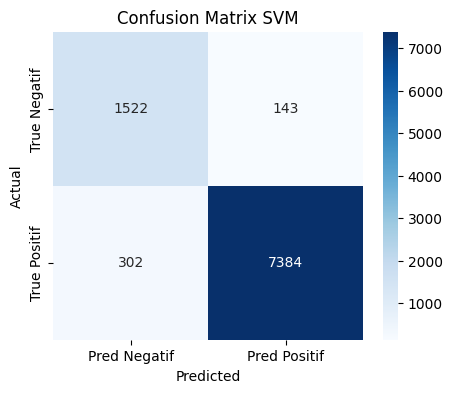

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Tampilkan matrix dalam bentuk angka
print("Confusion Matrix:")
print(cm)

# Visualisasi heatmap biar lebih jelas
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Pred Negatif', 'Pred Positif'],
            yticklabels=['True Negatif', 'True Positif'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix SVM")
plt.show()

#Visualisasi Keseluruhan

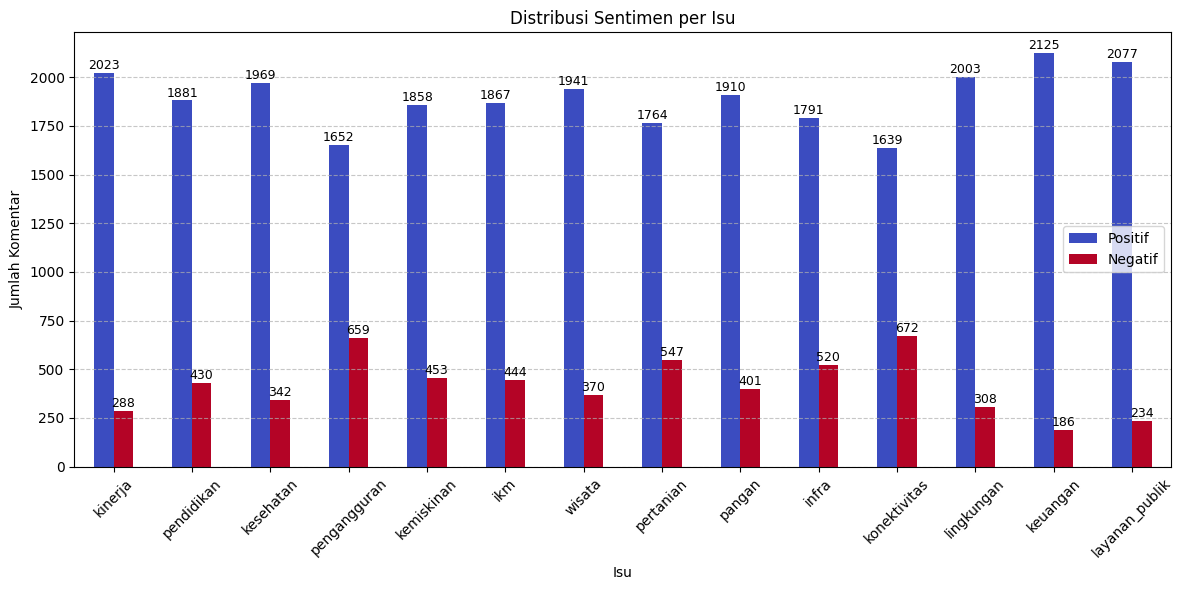

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
import simplemma

# Ensure nltk stopwords are downloaded
nltk.download('stopwords', quiet=True)

# Define positive and negative words (from previous cell 76-9P05TG11g)
positive_words = ['baik', 'bagus', 'lumayan', 'oke', 'cepat', 'bersih','membaik', 'aman', 'meningkat', 'diperbaiki', 'ditingkatkan', 'membantu', 'lancar', 'berkembang', 'suka', 'mudah', 'gratis', 'maju', 'rapi', 'nyaman', 'meningkatkan', 'memadai', 'responsif', 'semakin', 'tersedia', 'semoga', 'positif', 'mendukung', 'memuaskan', 'efisien', 'memberikan', 'perbaiki', 'mantap', 'tertib', 'optimal', 'kecepatan', 'dipermudah', 'menjaga', 'puas', 'alhamdulillah', 'memudahkan', 'berkualitas', 'rajin', 'tingkatkan', 'berhasil', 'apresiasi', 'dipercepat', 'diapresiasi']
negative_words = ['kurang', 'susah', 'rusak', 'turun', 'minim', 'mahal', 'lambat', 'terbatas', 'lama', 'sulit', 'masalah', 'menurun', 'parah', 'sedikit', 'kotor', 'buruk', 'kekurangan', 'berkurang', 'jelek', 'rendah', 'kesulitan', 'turunkan', 'nganggur', 'merusak', 'dijangkau', 'terlambat', 'kurangi', 'menurunkan', 'gagal', 'kurangnya', 'tercemar', 'sayangnya']

# Define preprocessing functions (re-defined for self-containment of this cell)
def clean_ig_data(textt):
    if pd.isna(textt):
        return ""
    textt = re.sub(r'\.{2,}', ' ', textt)
    textt = re.sub(r'\,{2,}', ' ', textt)
    textt = re.sub(r'"', ' ', textt)
    textt = re.sub(r'[^A-Za-z0-9\s,]', '', textt)
    textt = re.sub(r'\s+', ' ', textt).strip()
    return textt

def load_kamus_normalisasi(file_path):
    kamus = {}
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            for line in f:
                if '=' in line:
                    tidak_baku, baku = line.strip().split('=')
                    kamus[tidak_baku.lower()] = baku.lower()
    except FileNotFoundError:
        print(f"Error: Kamus normalisasi file not found at {file_path}")
        # Fallback to an empty dictionary or raise an error
    return kamus

def normalisasi_teks(teks, kamus):
    if pd.isnull(teks) or not isinstance(teks, str):
        return ''
    kata_kata = teks.split()
    hasil = [kamus.get(k.lower(), k) for k in kata_kata]
    return ' '.join(hasil)

stop_word = stopwords.words('indonesian')
def remove_stopwords(text_list):
    if not isinstance(text_list, list):
        return []
    return [word for word in text_list if word not in stop_word]

def lemmatization(text_list):
    if not isinstance(text_list, list):
        return ''
    lemmatized_tokens = [simplemma.lemmatize(word, lang='id') for word in text_list]
    return ' '.join(lemmatized_tokens)

# Function to label sentiment (from previous cell 76-9P05TG11g)
def label_with_dictionary(text, pos_dict, neg_dict):
    if isinstance(text, str):
        words = text.split()
    elif isinstance(text, list):
        words = text
    else:
        words = []

    pos_count = sum(1 for w in words if w in pos_dict)
    neg_count = sum(1 for w in words if w in neg_dict)

    return 'positive' if pos_count >= neg_count else 'negative'

# Load the original data
file_path = '/content/drive/My Drive/Data Tugas Akhir/Proses Model/Data Baru.xlsx'
df_original = pd.read_excel(file_path)
df

# Load kamus normalisasi
kamus_path = '/content/drive/My Drive/Data Tugas Akhir/Proses Model/kamus_norm.txt' # Adjust path if needed
kamus = load_kamus_normalisasi(kamus_path)

issue_map = {
    'pertanyaan1': 'kinerja',
    'pertanyaan2': 'pendidikan',
    'pertanyaan3': 'kesehatan',
    'pertanyaan4': 'pengangguran',
    'pertanyaan5': 'kemiskinan',
    'pertanyaan6': 'ikm',
    'pertanyaan7': 'wisata',
    'pertanyaan8': 'pertanian',
    'pertanyaan9': 'pangan',
    'pertanyaan10': 'infra',
    'pertanyaan11': 'konektivitas',
    'pertanyaan12': 'lingkungan',
    'pertanyaan13': 'keuangan',
    'pertanyaan14': 'layanan_publik'
}

sentimen_per_isu = []

for i in range(1, 15):
    pertanyaan_col_name = f'pertanyaan{i}'
    nama_isu = issue_map.get(pertanyaan_col_name, f'Pertanyaan {i}')

    if pertanyaan_col_name in df_original.columns:
        # Apply preprocessing steps to each 'pertanyaan' column
        temp_series = df_original[pertanyaan_col_name].dropna().astype(str)

        cleaned_text = temp_series.apply(clean_ig_data)
        case_folded = cleaned_text.str.lower()
        normalized_text = case_folded.apply(lambda x: normalisasi_teks(x, kamus))
        tokenized_text = normalized_text.apply(lambda x: x.split())
        stopword_removed = tokenized_text.apply(lambda x: remove_stopwords(x))
        lemmatized_text = stopword_removed.apply(lambda x: lemmatization(x))

        # Apply sentiment labeling
        sentiments = lemmatized_text.apply(lambda x: label_with_dictionary(x, positive_words, negative_words))

        positive_count = (sentiments == 'positive').sum()
        negative_count = (sentiments == 'negative').sum()

        sentimen_per_isu.append({
            'Isu': nama_isu,
            'Positif': positive_count,
            'Negatif': negative_count
        })

# Create DataFrame for visualization
df_sentimen_isu = pd.DataFrame(sentimen_per_isu)

# Plotting
if not df_sentimen_isu.empty:
    ax = df_sentimen_isu.set_index('Isu')[['Positif', 'Negatif']].plot(
        kind='bar',
        figsize=(12, 6),
        colormap='coolwarm'
    )

    plt.title('Distribusi Sentimen per Isu')
    plt.ylabel('Jumlah Komentar')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(
                str(int(height)),
                (p.get_x() + p.get_width() / 2, height + 5),
                ha='center', va='bottom', fontsize=9
            )

    plt.tight_layout()
    plt.show()
else:
    print("No sentiment data to display for any issue.")

#Visualisasi Per Isu

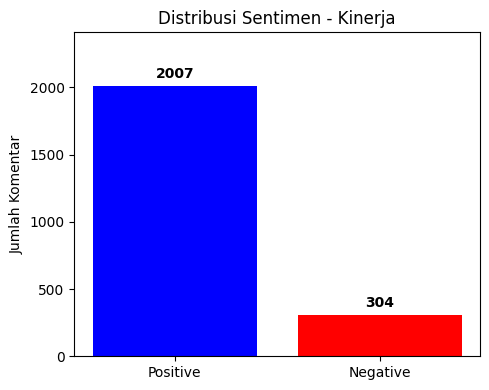

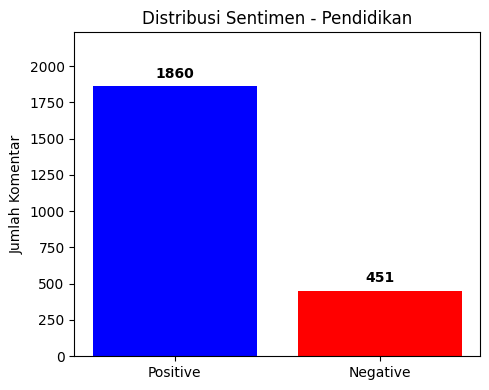

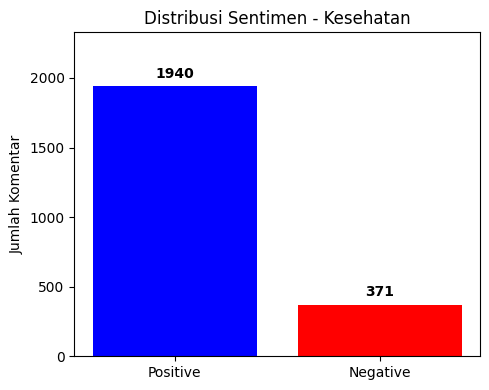

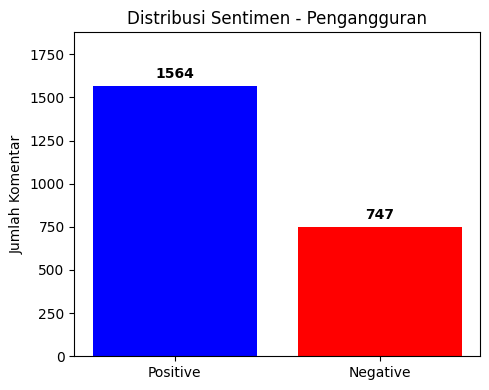

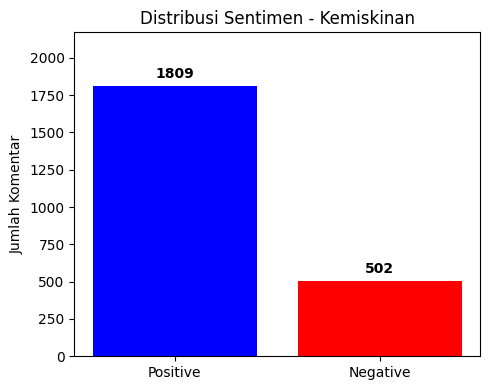

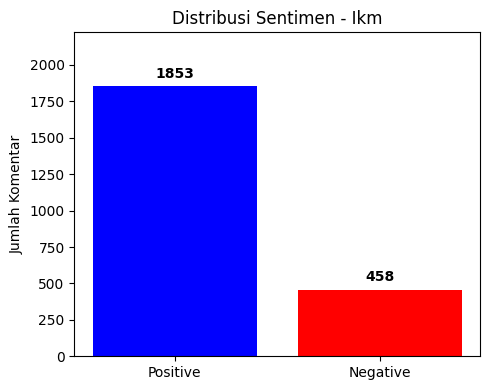

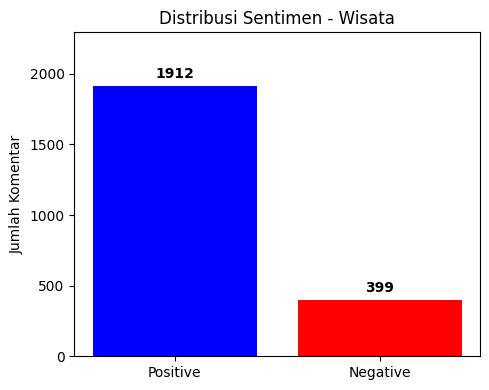

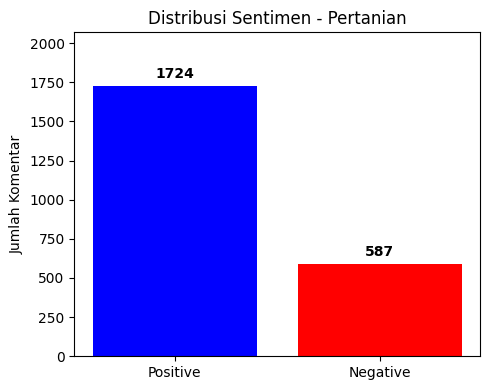

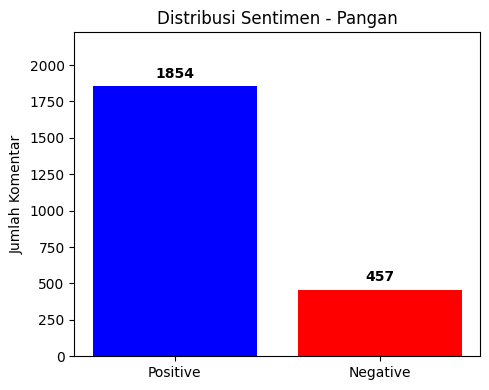

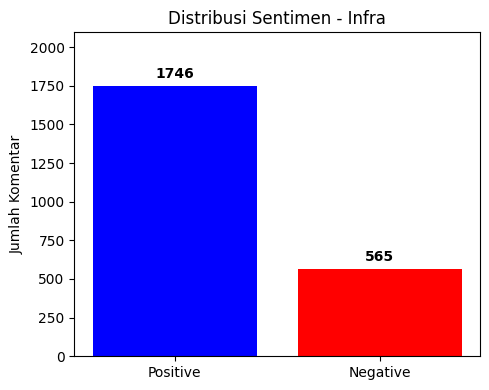

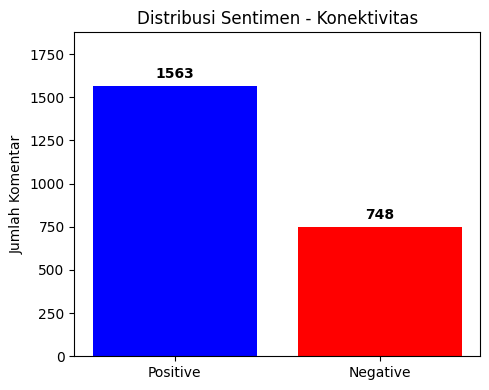

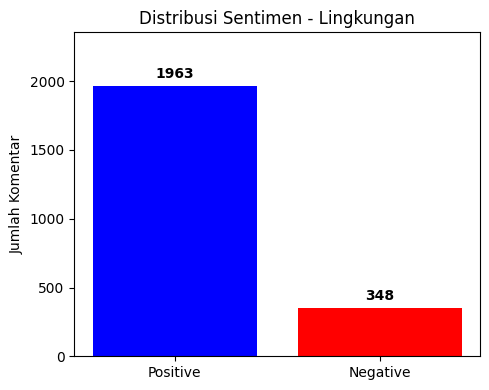

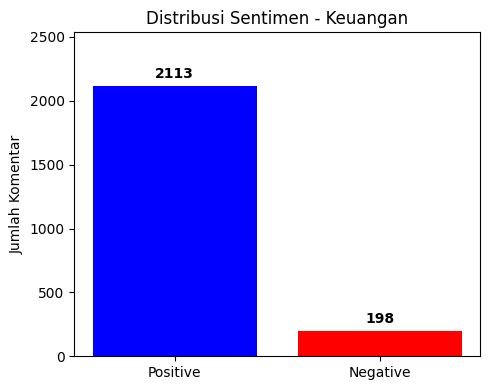

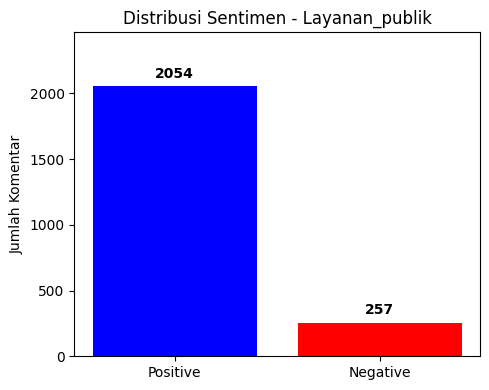

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
import simplemma

nltk.download('stopwords', quiet=True)

def clean_ig_data(textt):
    if pd.isna(textt):
        return ""
    textt = re.sub(r'\.{2,}', ' ', textt)
    textt = re.sub(r'\,{2,}', ' ', textt)
    textt = re.sub(r'"', ' ', textt)
    textt = re.sub(r'[^A-Za-z0-9\s,]', '', textt)
    textt = re.sub(r'\s+', ' ', textt).strip()
    return textt

def load_kamus_normalisasi(file_path):
    kamus = {}
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            for line in f:
                if '=' in line:
                    tidak_baku, baku = line.strip().split('=')
                    kamus[tidak_baku.lower()] = baku.lower()
    except FileNotFoundError:
        print(f"Error: Kamus normalisasi file not found at {file_path}")
    return kamus

def normalisasi_teks(teks, kamus):
    if pd.isnull(teks) or not isinstance(teks, str):
        return ''
    kata_kata = teks.split()
    hasil = [kamus.get(k.lower(), k) for k in kata_kata]
    return ' '.join(hasil)

stop_word = stopwords.words('indonesian')

def remove_stopwords(text_list):
    if not isinstance(text_list, list):
        return []
    return [word for word in text_list if word not in stop_word]

def lemmatization(text_list):
    if not isinstance(text_list, list):
        return ''
    lemmatized_tokens = [simplemma.lemmatize(word, lang='id') for word in text_list]
    return ' '.join(lemmatized_tokens)

kamus_path = '/content/drive/My Drive/Data Tugas Akhir/Proses Model/kamus_norm.txt'
kamus = load_kamus_normalisasi(kamus_path)

file_path = '/content/drive/My Drive/Data Tugas Akhir/Proses Model/Data Baru.xlsx'
df_original = pd.read_excel(file_path)

issue_map = {
    'pertanyaan1': 'kinerja',
    'pertanyaan2': 'pendidikan',
    'pertanyaan3': 'kesehatan',
    'pertanyaan4': 'pengangguran',
    'pertanyaan5': 'kemiskinan',
    'pertanyaan6': 'ikm',
    'pertanyaan7': 'wisata',
    'pertanyaan8': 'pertanian',
    'pertanyaan9': 'pangan',
    'pertanyaan10': 'infra',
    'pertanyaan11': 'konektivitas',
    'pertanyaan12': 'lingkungan',
    'pertanyaan13': 'keuangan',
    'pertanyaan14': 'layanan_publik'
}

df_predictions = df_original.copy()

all_negative = []

for col, isu in issue_map.items():
    if col not in df_original.columns:
        continue

    temp_series = df_original[col].dropna().astype(str)

    cleaned = temp_series.apply(clean_ig_data)
    lower = cleaned.str.lower()
    normalized = lower.apply(lambda x: normalisasi_teks(x, kamus))
    tokenized = normalized.apply(lambda x: x.split())
    stop_removed = tokenized.apply(remove_stopwords)
    lemmatized = stop_removed.apply(lemmatization)

    tfidf_transformed = tfidf_vectorizer.transform(lemmatized)
    predictions = svm_model.predict(tfidf_transformed)

    pred_series = pd.Series(predictions, index=lemmatized.index)
    df_predictions[f'{isu}_sentimen'] = pred_series

    pos_count = (predictions == 'positive').sum()
    neg_count = (predictions == 'negative').sum()

    df_original[pred_series == 'positive'][[col]].to_csv(f"{isu}_positif.csv", index=False)
    df_original[pred_series == 'negative'][[col]].to_csv(f"{isu}_negatif.csv", index=False)

    all_negative.append(df_original[pred_series == 'negative'][[col]].rename(columns={col: 'komentar'}))

    labels = ['Positive', 'Negative']
    values = [pos_count, neg_count]
    colors = ['blue', 'red']

    plt.figure(figsize=(5, 4))
    bars = plt.bar(labels, values, color=colors)

    if max(values) > 0:
        max_val = max(values)
        plt.ylim(0, max_val + max_val * 0.2)
    else:
        plt.ylim(0, 10)

    for bar, jumlah in zip(bars, values):
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + (max(values) * 0.02 if max(values) > 0 else 1),
            str(jumlah),
            ha='center',
            va='bottom',
            fontsize=10,
            fontweight='bold'
        )

    plt.title(f'Distribusi Sentimen - {isu.capitalize()}')
    plt.ylabel('Jumlah Komentar')
    plt.tight_layout()
    plt.show()

if all_negative:
    df_all_negative = pd.concat(all_negative, ignore_index=True)
    df_all_negative.to_csv("semua_isu_negatif.csv", index=False)

# **#LDA**

In [ ]:
pip install numpy==1.25.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 47.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [ ]:
!pip install gensim
import pandas as pd
from gensim import corpora
from gensim.models import LdaModel, CoherenceModel

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 32.6 MB/s eta 0:00:00


#**Implementasi LDA untuk Keseluruhan Sentimen Negatif**

In [ ]:
import pandas as pd

df = pd.read_csv('semua_isu_negatif.csv')

In [ ]:
df = df.drop_duplicates(subset='komentar')

In [ ]:
import re
import pandas as pd
def clean_ig_data(textt):

    textt = re.sub(r'\.{2,}', ' ', textt)
    textt = re.sub(r'\,{2,}', ' ', textt)
    textt = re.sub(r'"', ' ', textt)
    textt = re.sub(r'[^A-Za-z0-9\s,]', '', textt)
    textt = re.sub(r'\s+', ' ', textt).strip()

    return textt

df['cleaning'] = df['komentar'].apply(clean_ig_data)

In [ ]:
df['case_folding'] = df['komentar'].str.lower()

In [ ]:
import pandas as pd

def load_kamus_normalisasi(file_path):
    kamus = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            if '=' in line:
                tidak_baku, baku = line.strip().split('=')
                kamus[tidak_baku.lower()] = baku.lower()
    return kamus

def normalisasi_teks(teks, kamus):
    if pd.isnull(teks):
        return ''
    kata_kata = teks.split()
    hasil = [kamus.get(k.lower(), k) for k in kata_kata]
    return ' '.join(hasil)

kamus = load_kamus_normalisasi('kamus_norm.txt')

df['normalize'] = df['case_folding'].apply(lambda x: normalisasi_teks(x, kamus))

In [ ]:
df['tokenize'] = df['normalize'].apply(lambda x: x.split())

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_word = stopwords.words('indonesian')

def remove_stopwords(text):
    return [word for word in text if word not in stop_word]

df['stopword_removal'] = df['tokenize'].apply(lambda x: remove_stopwords(x))
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,komentar,cleaning,case_folding,normalize,tokenize,stopword_removal
0,"Pemkab udah cukup aktif, tp komunikasi ke warg...","Pemkab udah cukup aktif, tp komunikasi ke warg...","pemkab udah cukup aktif, tp komunikasi ke warg...","pemerintah kabupaten sudah cukup aktif, tapi k...","[pemerintah, kabupaten, sudah, cukup, aktif,, ...","[pemerintah, kabupaten, aktif,, komunikasi, wa..."
1,"Kinerjanya udah mulai kelihatan, tp eksekusiny...","Kinerjanya udah mulai kelihatan, tp eksekusiny...","kinerjanya udah mulai kelihatan, tp eksekusiny...","kinerjanya sudah mulai kelihatan, tapi eksekus...","[kinerjanya, sudah, mulai, kelihatan,, tapi, e...","[kinerjanya, kelihatan,, eksekusinya, kadang, ..."
2,Kinerja Pemda kurang maksimal soal jalan rusak...,Kinerja Pemda kurang maksimal soal jalan rusak...,kinerja pemda kurang maksimal soal jalan rusak...,kinerja pemerintah daerah kurang maksimal soal...,"[kinerja, pemerintah, daerah, kurang, maksimal...","[kinerja, pemerintah, daerah, maksimal, jalan,..."
3,"Pemerintah cukup aktif, tp respons terhadap ma...","Pemerintah cukup aktif, tp respons terhadap ma...","pemerintah cukup aktif, tp respons terhadap ma...","pemerintah cukup aktif, tapi respons terhadap ...","[pemerintah, cukup, aktif,, tapi, respons, ter...","[pemerintah, aktif,, respons, warga, lambat.]"
4,"Pemerintah bantu pemasaran ternak, tapi harga ...","Pemerintah bantu pemasaran ternak, tapi harga ...","pemerintah bantu pemasaran ternak, tapi harga ...","pemerintah bantu pemasaran ternak, tapi harga ...","[pemerintah, bantu, pemasaran, ternak,, tapi, ...","[pemerintah, bantu, pemasaran, ternak,, harga,..."
...,...,...,...,...,...,...
6387,"Sudah cukup baik, perlu di tingkatkan pelayana...","Sudah cukup baik, perlu di tingkatkan pelayana...","sudah cukup baik, perlu di tingkatkan pelayana...","sudah cukup baik, perlu di tingkatkan pelayana...","[sudah, cukup, baik,, perlu, di, tingkatkan, p...","[baik,, tingkatkan, pelayanan, masyarakat, pen..."
6388,Pelayanan publik ramah tapi kadang lambat saat...,Pelayanan publik ramah tapi kadang lambat saat...,pelayanan publik ramah tapi kadang lambat saat...,pelayanan publik ramah tapi kadang lambat saat...,"[pelayanan, publik, ramah, tapi, kadang, lamba...","[pelayanan, publik, ramah, kadang, lambat, jam..."
6389,"Pelayanan di kantor camat lambat, sering antre...","Pelayanan di kantor camat lambat, sering antre...","pelayanan di kantor camat lambat, sering antre...","pelayanan di kantor camat lambat, sering antre...","[pelayanan, di, kantor, camat, lambat,, sering...","[pelayanan, kantor, camat, lambat,, antre, lama.]"
6390,"Pelayanan publik lambat karena jarak jauh, per...","Pelayanan publik lambat karena jarak jauh, per...","pelayanan publik lambat karena jarak jauh, per...","pelayanan publik lambat karena jarak jauh, per...","[pelayanan, publik, lambat, karena, jarak, jau...","[pelayanan, publik, lambat, jarak, jauh,, sist..."


In [ ]:
!pip install simplemma

import pandas as pd
import simplemma

# Contoh DataFrame (asumsi sudah ada)
# df = pd.DataFrame({'stopword_removal': [...]})

def lemmatization(text_list):
    """
    Fungsi untuk melakukan lemmatisasi pada teks.
    Fungsi ini akan memproses kata-kata per individu.
    """
    if not isinstance(text_list, list):
        # Handle cases where input might not be a list (e.g., NaN after dropna earlier)
        return ''

    # Melakukan lemmatisasi pada setiap token dalam list
    # Menggunakan 'lang='id'' untuk bahasa Indonesia
    lemmatized_tokens = [simplemma.lemmatize(word, lang='id') for word in text_list]

    # Menggabungkan kembali token-token yang sudah dilemmatisasi menjadi string
    return ' '.join(lemmatized_tokens)

# Terapkan fungsi lemmatisasi ke kolom 'stopword_removal'
df['lemmatization'] = df['stopword_removal'].apply(lemmatization)
df

,komentar,cleaning,case_folding,normalize,tokenize,stopword_removal,lemmatization
0,"Pemkab udah cukup aktif, tp komunikasi ke warg...","Pemkab udah cukup aktif, tp komunikasi ke warg...","pemkab udah cukup aktif, tp komunikasi ke warg...","pemerintah kabupaten sudah cukup aktif, tapi k...","[pemerintah, kabupaten, sudah, cukup, aktif,, ...","[pemerintah, kabupaten, aktif,, komunikasi, wa...","perintah kabupaten aktif, komunikasi warga minim."
1,"Kinerjanya udah mulai kelihatan, tp eksekusiny...","Kinerjanya udah mulai kelihatan, tp eksekusiny...","kinerjanya udah mulai kelihatan, tp eksekusiny...","kinerjanya sudah mulai kelihatan, tapi eksekus...","[kinerjanya, sudah, mulai, kelihatan,, tapi, e...","[kinerjanya, kelihatan,, eksekusinya, kadang, ...","kinerja kelihatan, eksekusi kadang lambat."
2,Kinerja Pemda kurang maksimal soal jalan rusak...,Kinerja Pemda kurang maksimal soal jalan rusak...,kinerja pemda kurang maksimal soal jalan rusak...,kinerja pemerintah daerah kurang maksimal soal...,"[kinerja, pemerintah, daerah, kurang, maksimal...","[kinerja, pemerintah, daerah, maksimal, jalan,...",kinerja perintah daerah maksimal jalan rusak s...
3,"Pemerintah cukup aktif, tp respons terhadap ma...","Pemerintah cukup aktif, tp respons terhadap ma...","pemerintah cukup aktif, tp respons terhadap ma...","pemerintah cukup aktif, tapi respons terhadap ...","[pemerintah, cukup, aktif,, tapi, respons, ter...","[pemerintah, aktif,, respons, warga, lambat.]","perintah aktif, respons warga lambat."
4,"Pemerintah bantu pemasaran ternak, tapi harga ...","Pemerintah bantu pemasaran ternak, tapi harga ...","pemerintah bantu pemasaran ternak, tapi harga ...","pemerintah bantu pemasaran ternak, tapi harga ...","[pemerintah, bantu, pemasaran, ternak,, tapi, ...","[pemerintah, bantu, pemasaran, ternak,, harga,...","perintah bantu pasar ternak, harga turun terus."
...,...,...,...,...,...,...,...
6387,"Sudah cukup baik, perlu di tingkatkan pelayana...","Sudah cukup baik, perlu di tingkatkan pelayana...","sudah cukup baik, perlu di tingkatkan pelayana...","sudah cukup baik, perlu di tingkatkan pelayana...","[sudah, cukup, baik,, perlu, di, tingkatkan, p...","[baik,, tingkatkan, pelayanan, masyarakat, pen...","baik, tingkat layan masyarakat urus berkas dll..."
6388,Pelayanan publik ramah tapi kadang lambat saat...,Pelayanan publik ramah tapi kadang lambat saat...,pelayanan publik ramah tapi kadang lambat saat...,pelayanan publik ramah tapi kadang lambat saat...,"[pelayanan, publik, ramah, tapi, kadang, lamba...","[pelayanan, publik, ramah, kadang, lambat, jam...",layan publik ramah kadang lambat jam sibuk.
6389,"Pelayanan di kantor camat lambat, sering antre...","Pelayanan di kantor camat lambat, sering antre...","pelayanan di kantor camat lambat, sering antre...","pelayanan di kantor camat lambat, sering antre...","[pelayanan, di, kantor, camat, lambat,, sering...","[pelayanan, kantor, camat, lambat,, antre, lama.]","layan kantor camat lambat, antre lama."
6390,"Pelayanan publik lambat karena jarak jauh, per...","Pelayanan publik lambat karena jarak jauh, per...","pelayanan publik lambat karena jarak jauh, per...","pelayanan publik lambat karena jarak jauh, per...","[pelayanan, publik, lambat, karena, jarak, jau...","[pelayanan, publik, lambat, jarak, jauh,, sist...","layan publik lambat jarak jauh, sistem mobile."


In [ ]:
df.to_csv('hasil akhir keseluruhan negatif.csv', index=False)
filtered_data = pd.read_csv("hasil akhir keseluruhan negatif.csv")

In [ ]:
if 'lemmatization' not in filtered_data.columns:
    raise ValueError("Kolom 'lemmatization' tidak ditemukan dalam filtered_data.")

data_tokenized = [text.split() for text in filtered_data['lemmatization'] if isinstance(text, str)]

if not data_tokenized:
    raise ValueError("Tidak ada data yang valid untuk diproses.")

dictionary = corpora.Dictionary(data_tokenized)
corpus = [dictionary.doc2bow(text) for text in data_tokenized]

num_words = 10

# Gunakan nilai alpha dan eta yang lebih eksplisit
alpha_value = 0.1  # Nilai alpha yang lebih stabil
beta_value = 0.01  # Nilai eta yang lebih stabil
topic_range = range(1, 14)  # Coba dengan jumlah topik lebih sedikit

best_score = -1
best_topics = None
best_model = None

for num_topics in topic_range:
    lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=50,
                         iterations=1000, alpha=alpha_value, eta=beta_value, random_state=42)

    coherence_model = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary,
                                     texts=data_tokenized, coherence='c_v')
    coherence_score = coherence_model.get_coherence()

    print(f"Jumlah Topik: {num_topics}, Coherence Score: {coherence_score:.4f}")

    if coherence_score > best_score:
        best_score = coherence_score
        best_topics = num_topics
        best_model = lda_model

print(f"\nJumlah Topik Optimal: {best_topics} dengan Coherence Score: {best_score:.4f}")

Jumlah Topik: 1, Coherence Score: 0.2796
Jumlah Topik: 2, Coherence Score: 0.3088
Jumlah Topik: 3, Coherence Score: 0.2737
Jumlah Topik: 4, Coherence Score: 0.2920
Jumlah Topik: 5, Coherence Score: 0.3321
Jumlah Topik: 6, Coherence Score: 0.3503
Jumlah Topik: 7, Coherence Score: 0.3186
Jumlah Topik: 8, Coherence Score: 0.3405
Jumlah Topik: 9, Coherence Score: 0.3408
Jumlah Topik: 10, Coherence Score: 0.3535
Jumlah Topik: 11, Coherence Score: 0.3558
Jumlah Topik: 12, Coherence Score: 0.3743
Jumlah Topik: 13, Coherence Score: 0.3965

Jumlah Topik Optimal: 13 dengan Coherence Score: 0.3965


In [ ]:
topics = best_model.show_topics(num_topics=best_topics, num_words=num_words, formatted=False)
for topic in topics:
    print(f"Topik {topic[0]}:")
    for word, weight in topic[1]:
        print(f"  {word}: {weight:.4f}")
    print("\n")

out = []
for i in range(best_topics):
    topic_words = best_model.show_topic(i, topn=num_words)
    for word, weight in topic_words:
        out.append([word, i, weight])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance'])

print(df.head())

Topik 0:
  kerja: 0.1038
  anggur: 0.0824
  turun: 0.0508
  upaya: 0.0358
  lapang: 0.0301
  latih: 0.0298
  cari: 0.0269
  pegawai: 0.0157
  awas: 0.0151
  usaha: 0.0149


Topik 1:
  &: 0.1324
  warga: 0.0842
  susah: 0.0714
  sulit: 0.0438
  camat: 0.0395
  pupuk: 0.0323
  jarang: 0.0311
  sampah: 0.0248
  skrg: 0.0217
  lapor: 0.0206


Topik 2:
  terbatas.: 0.1111
  sehat: 0.0761
  terbatas: 0.0495
  puskesmas: 0.0413
  primer: 0.0410
  fasilitas: 0.0331
  sektor: 0.0279
  ramah: 0.0271
  alat: 0.0259
  terbatas,: 0.0243


Topik 3:
  lingkung: 0.0973
  rusak: 0.0861
  tani: 0.0681
  ikan: 0.0583
  tambang: 0.0386
  hujan.: 0.0382
  dukung: 0.0299
  pariwisata: 0.0297
  jaga: 0.0234
  berkembang,: 0.0226


Topik 4:
  kantor: 0.0967
  minim: 0.0813
  administrasi: 0.0556
  sistem: 0.0507
  masyarakat: 0.0466
  biar: 0.0373
  ada,: 0.0305
  kembang: 0.0285
  warga: 0.0250
  warga.: 0.0226


Topik 5:
  mahal.: 0.1153
  harga: 0.1024
  urus: 0.0634
  mahal: 0.0453
  bahan: 0.0307
  biaya

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/tmp/ipython-input-665799730.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='word', data=topic_df, palette="coolwarm")


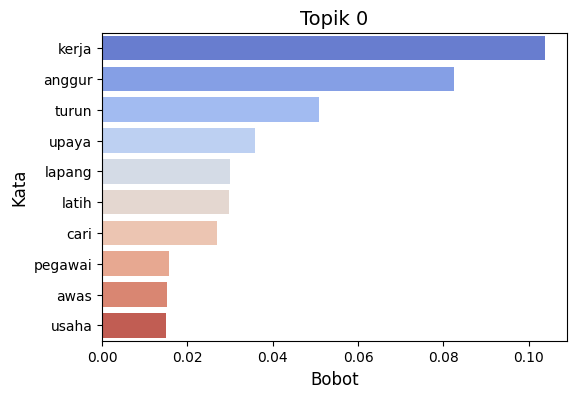

/tmp/ipython-input-665799730.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='word', data=topic_df, palette="coolwarm")


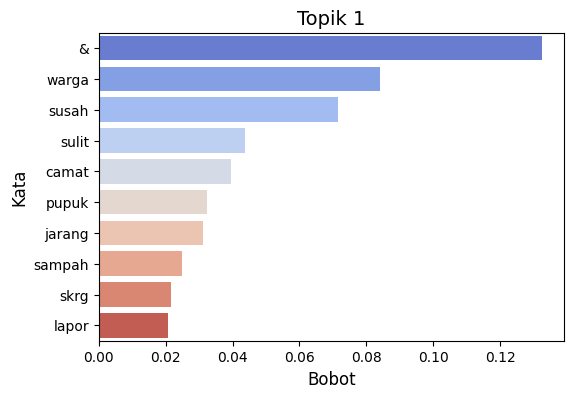

/tmp/ipython-input-665799730.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='word', data=topic_df, palette="coolwarm")


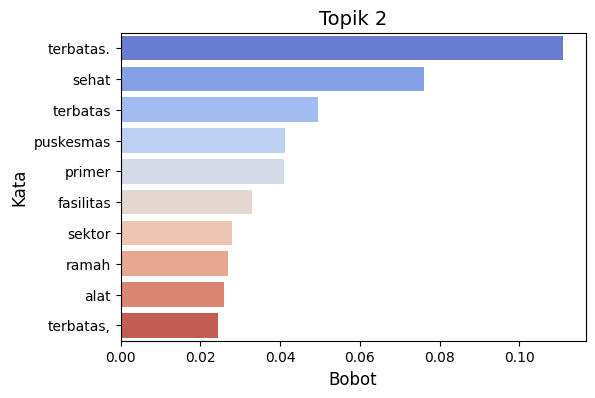

/tmp/ipython-input-665799730.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='word', data=topic_df, palette="coolwarm")


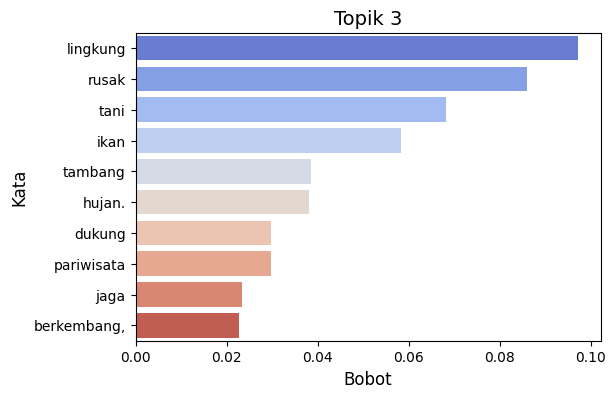

/tmp/ipython-input-665799730.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='word', data=topic_df, palette="coolwarm")


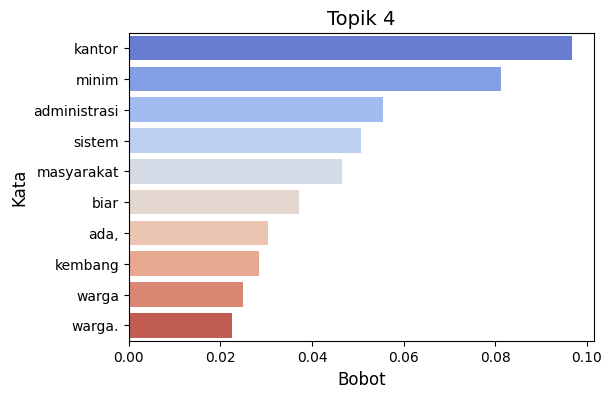

/tmp/ipython-input-665799730.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='word', data=topic_df, palette="coolwarm")


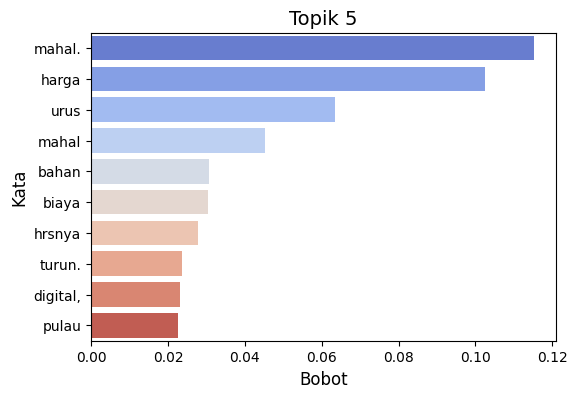

/tmp/ipython-input-665799730.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='word', data=topic_df, palette="coolwarm")


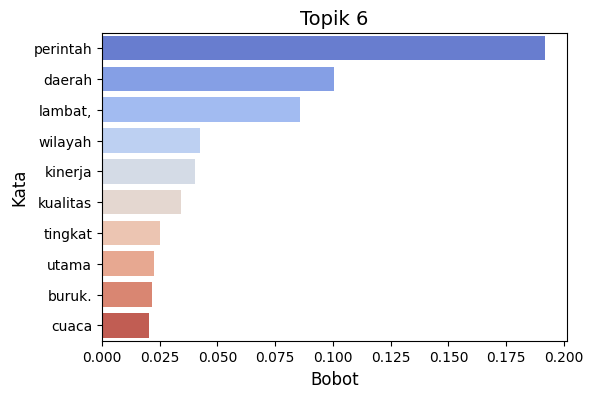

/tmp/ipython-input-665799730.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='word', data=topic_df, palette="coolwarm")


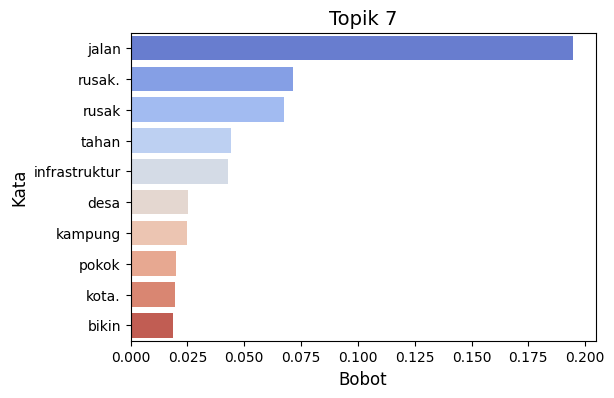

/tmp/ipython-input-665799730.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='word', data=topic_df, palette="coolwarm")


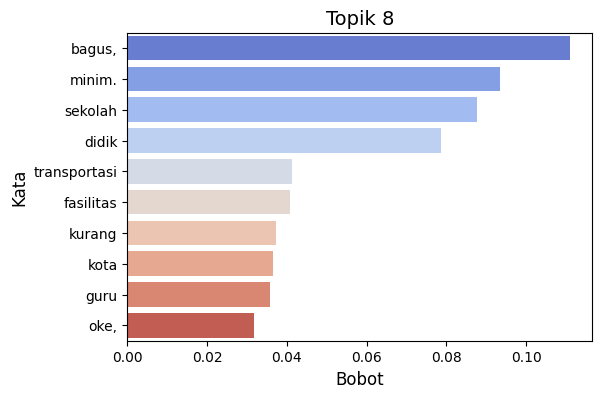

/tmp/ipython-input-665799730.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='word', data=topic_df, palette="coolwarm")


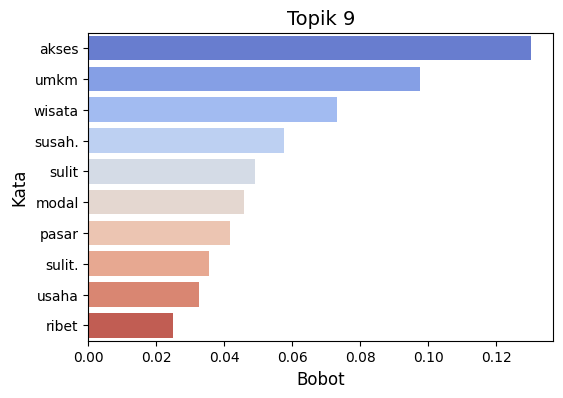

/tmp/ipython-input-665799730.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='word', data=topic_df, palette="coolwarm")


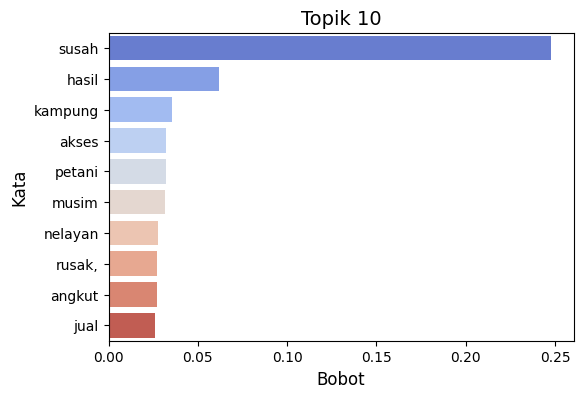

/tmp/ipython-input-665799730.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='word', data=topic_df, palette="coolwarm")


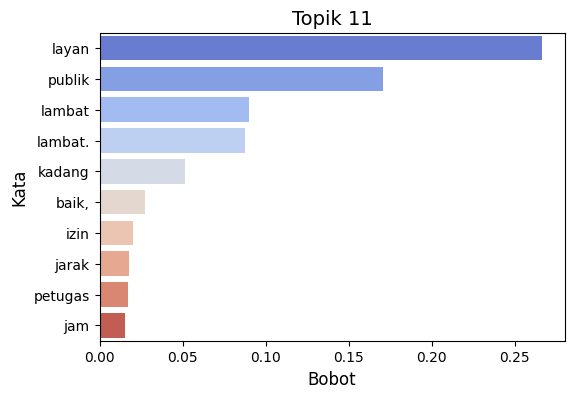

/tmp/ipython-input-665799730.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='word', data=topic_df, palette="coolwarm")


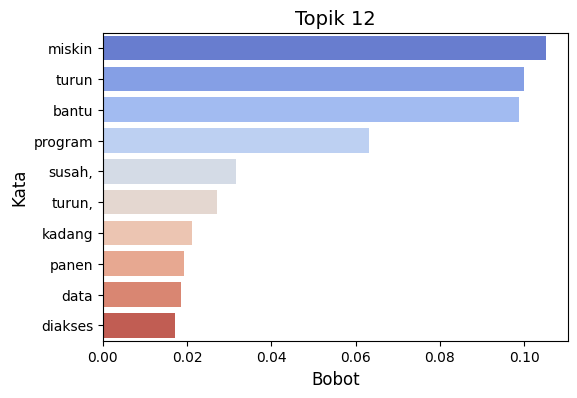

✅ Semua plot sudah disimpan di folder Google Drive: '/content/drive/My Drive/Data Tugas Akhir/LDA/Keseluruhan'


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
from google.colab import drive

# 1. Mount Google Drive
drive.mount('/content/drive')

# 2. Tentukan folder output di Drive
output_folder = "/content/drive/My Drive/Data Tugas Akhir/LDA/Keseluruhan"

# 3. Buat folder jika belum ada
os.makedirs(output_folder, exist_ok=True)

# Fungsi untuk membuat barplot dari df
def generate_barplot_from_df(df, topic_num):
    topic_df = df[df['topic_id'] == topic_num].sort_values(by='importance', ascending=False)

    plt.figure(figsize=(6, 4))
    sns.barplot(x='importance', y='word', data=topic_df, palette="coolwarm")
    plt.xlabel("Bobot", fontsize=12)
    plt.ylabel("Kata", fontsize=12)
    plt.title(f"Topik {topic_num}", fontsize=14)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    # Simpan gambar ke Google Drive
    filename = os.path.join(output_folder, f"topik_{topic_num}.png")
    plt.savefig(filename, bbox_inches='tight', dpi=300)
    plt.show()
    plt.close()

# Generate dan simpan semua topik
for topic_num in range(best_topics):
    generate_barplot_from_df(df, topic_num)

print(f"✅ Semua plot sudah disimpan di folder Google Drive: '{output_folder}'")

# **Implementasi LDA untuk Sentimen Negatif tiap isu**

#LDA Kinerja Pemerintah

In [ ]:
import pandas as pd

df = pd.read_csv('kinerja_negatif.csv')

In [ ]:
df = df.drop_duplicates(subset='pertanyaan1')

In [ ]:
import re
import pandas as pd
def clean_ig_data(textt):

    textt = re.sub(r'\.{2,}', ' ', textt)
    textt = re.sub(r'\,{2,}', ' ', textt)
    textt = re.sub(r'"', ' ', textt)
    textt = re.sub(r'[^A-Za-z0-9\s,]', '', textt)
    textt = re.sub(r'\s+', ' ', textt).strip()

    return textt

df['cleaning'] = df['pertanyaan1'].apply(clean_ig_data)

In [ ]:
df['case_folding'] = df['pertanyaan1'].str.lower()

In [ ]:
import pandas as pd

def load_kamus_normalisasi(file_path):
    kamus = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            if '=' in line:
                tidak_baku, baku = line.strip().split('=')
                kamus[tidak_baku.lower()] = baku.lower()
    return kamus

def normalisasi_teks(teks, kamus):
    if pd.isnull(teks):
        return ''
    kata_kata = teks.split()
    hasil = [kamus.get(k.lower(), k) for k in kata_kata]
    return ' '.join(hasil)

kamus = load_kamus_normalisasi('kamus_norm.txt')

df['normalize'] = df['case_folding'].apply(lambda x: normalisasi_teks(x, kamus))

In [ ]:
df['tokenize'] = df['normalize'].apply(lambda x: x.split())

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_word = stopwords.words('indonesian')

def remove_stopwords(text):
    return [word for word in text if word not in stop_word]

df['stopword_removal'] = df['tokenize'].apply(lambda x: remove_stopwords(x))
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,pertanyaan1,cleaning,case_folding,normalize,tokenize,stopword_removal
0,"Pemkab udah cukup aktif, tp komunikasi ke warg...","Pemkab udah cukup aktif, tp komunikasi ke warg...","pemkab udah cukup aktif, tp komunikasi ke warg...","pemerintah kabupaten sudah cukup aktif, tapi k...","[pemerintah, kabupaten, sudah, cukup, aktif,, ...","[pemerintah, kabupaten, aktif,, komunikasi, wa..."
1,"Kinerjanya udah mulai kelihatan, tp eksekusiny...","Kinerjanya udah mulai kelihatan, tp eksekusiny...","kinerjanya udah mulai kelihatan, tp eksekusiny...","kinerjanya sudah mulai kelihatan, tapi eksekus...","[kinerjanya, sudah, mulai, kelihatan,, tapi, e...","[kinerjanya, kelihatan,, eksekusinya, kadang, ..."
2,Kinerja Pemda kurang maksimal soal jalan rusak...,Kinerja Pemda kurang maksimal soal jalan rusak...,kinerja pemda kurang maksimal soal jalan rusak...,kinerja pemerintah daerah kurang maksimal soal...,"[kinerja, pemerintah, daerah, kurang, maksimal...","[kinerja, pemerintah, daerah, maksimal, jalan,..."
3,"Pemerintah cukup aktif, tp respons terhadap ma...","Pemerintah cukup aktif, tp respons terhadap ma...","pemerintah cukup aktif, tp respons terhadap ma...","pemerintah cukup aktif, tapi respons terhadap ...","[pemerintah, cukup, aktif,, tapi, respons, ter...","[pemerintah, aktif,, respons, warga, lambat.]"
4,"Pemerintah bantu pemasaran ternak, tapi harga ...","Pemerintah bantu pemasaran ternak, tapi harga ...","pemerintah bantu pemasaran ternak, tapi harga ...","pemerintah bantu pemasaran ternak, tapi harga ...","[pemerintah, bantu, pemasaran, ternak,, tapi, ...","[pemerintah, bantu, pemasaran, ternak,, harga,..."
...,...,...,...,...,...,...
299,"Kinerja oke, tp distribusi obat sering lambat.","Kinerja oke, tp distribusi obat sering lambat","kinerja oke, tp distribusi obat sering lambat.","kinerja oke, tapi distribusi obat sering lambat.","[kinerja, oke,, tapi, distribusi, obat, sering...","[kinerja, oke,, distribusi, obat, lambat.]"
300,"Kadang keliatan turun ke lapangan, kadang ilang.","Kadang keliatan turun ke lapangan, kadang ilang","kadang keliatan turun ke lapangan, kadang ilang.","kadang kelihatan turun ke lapangan, kadang ilang.","[kadang, kelihatan, turun, ke, lapangan,, kada...","[kadang, turun, lapangan,, kadang, ilang.]"
301,Pemerintah cukup aktif bikin kegiatan-kegiatan...,Pemerintah cukup aktif bikin kegiatankegiatan ...,pemerintah cukup aktif bikin kegiatan-kegiatan...,pemerintah cukup aktif bikin kegiatan-kegiatan...,"[pemerintah, cukup, aktif, bikin, kegiatan-keg...","[pemerintah, aktif, bikin, kegiatan-kegiatan, ..."
302,"Pemda udh lumayan respon keluhan warga, tp msh...","Pemda udh lumayan respon keluhan warga, tp msh...","pemda udh lumayan respon keluhan warga, tp msh...",pemerintah daerah sudah lumayan respon keluhan...,"[pemerintah, daerah, sudah, lumayan, respon, k...","[pemerintah, daerah, lumayan, respon, keluhan,..."


In [ ]:
!pip install simplemma

import pandas as pd
import simplemma

# Contoh DataFrame (asumsi sudah ada)
# df = pd.DataFrame({'stopword_removal': [...]})

def lemmatization(text_list):
    """
    Fungsi untuk melakukan lemmatisasi pada teks.
    Fungsi ini akan memproses kata-kata per individu.
    """
    if not isinstance(text_list, list):
        # Handle cases where input might not be a list (e.g., NaN after dropna earlier)
        return ''

    # Melakukan lemmatisasi pada setiap token dalam list
    # Menggunakan 'lang='id'' untuk bahasa Indonesia
    lemmatized_tokens = [simplemma.lemmatize(word, lang='id') for word in text_list]

    # Menggabungkan kembali token-token yang sudah dilemmatisasi menjadi string
    return ' '.join(lemmatized_tokens)

# Terapkan fungsi lemmatisasi ke kolom 'stopword_removal'
df['lemmatization'] = df['stopword_removal'].apply(lemmatization)
df

,pertanyaan1,cleaning,case_folding,normalize,tokenize,stopword_removal,lemmatization
0,"Pemkab udah cukup aktif, tp komunikasi ke warg...","Pemkab udah cukup aktif, tp komunikasi ke warg...","pemkab udah cukup aktif, tp komunikasi ke warg...","pemerintah kabupaten sudah cukup aktif, tapi k...","[pemerintah, kabupaten, sudah, cukup, aktif,, ...","[pemerintah, kabupaten, aktif,, komunikasi, wa...","perintah kabupaten aktif, komunikasi warga minim."
1,"Kinerjanya udah mulai kelihatan, tp eksekusiny...","Kinerjanya udah mulai kelihatan, tp eksekusiny...","kinerjanya udah mulai kelihatan, tp eksekusiny...","kinerjanya sudah mulai kelihatan, tapi eksekus...","[kinerjanya, sudah, mulai, kelihatan,, tapi, e...","[kinerjanya, kelihatan,, eksekusinya, kadang, ...","kinerja kelihatan, eksekusi kadang lambat."
2,Kinerja Pemda kurang maksimal soal jalan rusak...,Kinerja Pemda kurang maksimal soal jalan rusak...,kinerja pemda kurang maksimal soal jalan rusak...,kinerja pemerintah daerah kurang maksimal soal...,"[kinerja, pemerintah, daerah, kurang, maksimal...","[kinerja, pemerintah, daerah, maksimal, jalan,...",kinerja perintah daerah maksimal jalan rusak s...
3,"Pemerintah cukup aktif, tp respons terhadap ma...","Pemerintah cukup aktif, tp respons terhadap ma...","pemerintah cukup aktif, tp respons terhadap ma...","pemerintah cukup aktif, tapi respons terhadap ...","[pemerintah, cukup, aktif,, tapi, respons, ter...","[pemerintah, aktif,, respons, warga, lambat.]","perintah aktif, respons warga lambat."
4,"Pemerintah bantu pemasaran ternak, tapi harga ...","Pemerintah bantu pemasaran ternak, tapi harga ...","pemerintah bantu pemasaran ternak, tapi harga ...","pemerintah bantu pemasaran ternak, tapi harga ...","[pemerintah, bantu, pemasaran, ternak,, tapi, ...","[pemerintah, bantu, pemasaran, ternak,, harga,...","perintah bantu pasar ternak, harga turun terus."
...,...,...,...,...,...,...,...
299,"Kinerja oke, tp distribusi obat sering lambat.","Kinerja oke, tp distribusi obat sering lambat","kinerja oke, tp distribusi obat sering lambat.","kinerja oke, tapi distribusi obat sering lambat.","[kinerja, oke,, tapi, distribusi, obat, sering...","[kinerja, oke,, distribusi, obat, lambat.]","kinerja oke, distribusi obat lambat."
300,"Kadang keliatan turun ke lapangan, kadang ilang.","Kadang keliatan turun ke lapangan, kadang ilang","kadang keliatan turun ke lapangan, kadang ilang.","kadang kelihatan turun ke lapangan, kadang ilang.","[kadang, kelihatan, turun, ke, lapangan,, kada...","[kadang, turun, lapangan,, kadang, ilang.]","kadang turun lapangan, kadang ilang."
301,Pemerintah cukup aktif bikin kegiatan-kegiatan...,Pemerintah cukup aktif bikin kegiatankegiatan ...,pemerintah cukup aktif bikin kegiatan-kegiatan...,pemerintah cukup aktif bikin kegiatan-kegiatan...,"[pemerintah, cukup, aktif, bikin, kegiatan-keg...","[pemerintah, aktif, bikin, kegiatan-kegiatan, ...",perintah aktif bikin kegiatan-giat didik anak ...
302,"Pemda udh lumayan respon keluhan warga, tp msh...","Pemda udh lumayan respon keluhan warga, tp msh...","pemda udh lumayan respon keluhan warga, tp msh...",pemerintah daerah sudah lumayan respon keluhan...,"[pemerintah, daerah, sudah, lumayan, respon, k...","[pemerintah, daerah, lumayan, respon, keluhan,...","perintah daerah lumayan respon keluh warga, la..."


In [ ]:
df.to_csv('hasil akhir kinerja negatif.csv', index=False)
filtered_data = pd.read_csv("hasil akhir kinerja negatif.csv")

In [ ]:
if 'lemmatization' not in filtered_data.columns:
    raise ValueError("Kolom 'lemmatization' tidak ditemukan dalam filtered_data.")

data_tokenized = [text.split() for text in filtered_data['lemmatization'] if isinstance(text, str)]

if not data_tokenized:
    raise ValueError("Tidak ada data yang valid untuk diproses.")

dictionary = corpora.Dictionary(data_tokenized)
corpus = [dictionary.doc2bow(text) for text in data_tokenized]

num_words = 10

# Gunakan nilai alpha dan eta yang lebih eksplisit
alpha_value = 0.1  # Nilai alpha yang lebih stabil
beta_value = 0.01  # Nilai eta yang lebih stabil
topic_range = range(1, 5)  # Coba dengan jumlah topik lebih sedikit

best_score = -1
best_topics = None
best_model = None

for num_topics in topic_range:
    lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=50,
                         iterations=1000, alpha=alpha_value, eta=beta_value, random_state=42)

    coherence_model = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary,
                                     texts=data_tokenized, coherence='c_v')
    coherence_score = coherence_model.get_coherence()

    print(f"Jumlah Topik: {num_topics}, Coherence Score: {coherence_score:.4f}")

    if coherence_score > best_score:
        best_score = coherence_score
        best_topics = num_topics
        best_model = lda_model

print(f"\nJumlah Topik Optimal: {best_topics} dengan Coherence Score: {best_score:.4f}")

Jumlah Topik: 1, Coherence Score: 0.3391
Jumlah Topik: 2, Coherence Score: 0.3403
Jumlah Topik: 3, Coherence Score: 0.3586
Jumlah Topik: 4, Coherence Score: 0.3749

Jumlah Topik Optimal: 4 dengan Coherence Score: 0.3749


In [ ]:
topics = best_model.show_topics(num_topics=best_topics, num_words=num_words, formatted=False)
for topic in topics:
    print(f"Topik {topic[0]}:")
    for word, weight in topic[1]:
        print(f"  {word}: {weight:.4f}")
    print("\n")

out = []
for i in range(best_topics):
    topic_words = best_model.show_topic(i, topn=num_words)
    for word, weight in topic_words:
        out.append([word, i, weight])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance'])

print(df.head())

Topik 0:
  perintah: 0.1069
  kinerja: 0.0372
  jalan: 0.0220
  lambat.: 0.0196
  turun: 0.0181
  minim.: 0.0169
  usaha: 0.0154
  rusak: 0.0152
  kabupaten: 0.0119
  terasa,: 0.0102


Topik 1:
  perintah: 0.1029
  lambat.: 0.0596
  kinerja: 0.0576
  kadang: 0.0412
  turun: 0.0324
  kabupaten: 0.0177
  daerah: 0.0156
  program: 0.0127
  lambat: 0.0121
  realisasi: 0.0111


Topik 2:
  perintah: 0.1196
  kinerja: 0.1001
  lambat: 0.0900
  kadang: 0.0605
  baik,: 0.0539
  lambat.: 0.0468
  respon: 0.0339
  program: 0.0328
  keluh: 0.0303
  warga: 0.0203


Topik 3:
  perintah: 0.0972
  kinerja: 0.0652
  lambat: 0.0428
  lambat.: 0.0247
  bangun: 0.0202
  turun: 0.0195
  jarang: 0.0188
  daerah: 0.0175
  realisasi: 0.0175
  turun.: 0.0163


       word  topic_id  importance
0  perintah         0    0.106928
1   kinerja         0    0.037250
2     jalan         0    0.021972
3   lambat.         0    0.019580
4     turun         0    0.018061


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/tmp/ipython-input-1334406015.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='word', data=topic_df, palette="coolwarm")


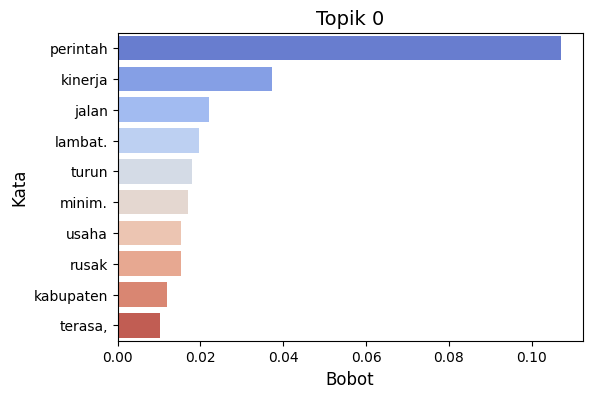

/tmp/ipython-input-1334406015.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='word', data=topic_df, palette="coolwarm")


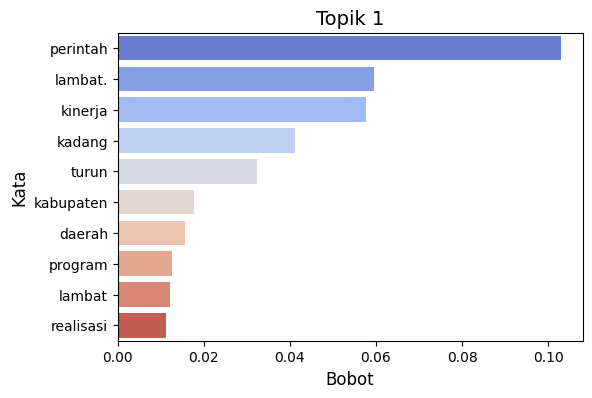

/tmp/ipython-input-1334406015.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='word', data=topic_df, palette="coolwarm")


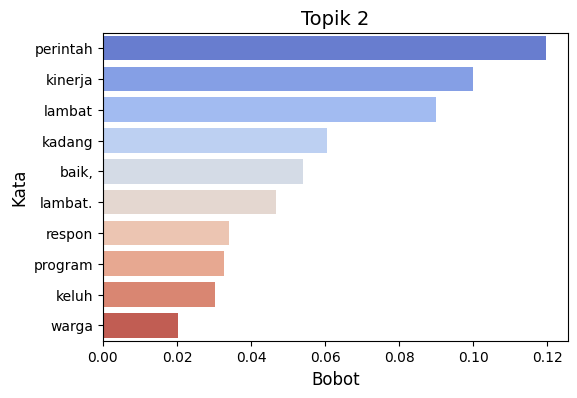

/tmp/ipython-input-1334406015.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='word', data=topic_df, palette="coolwarm")


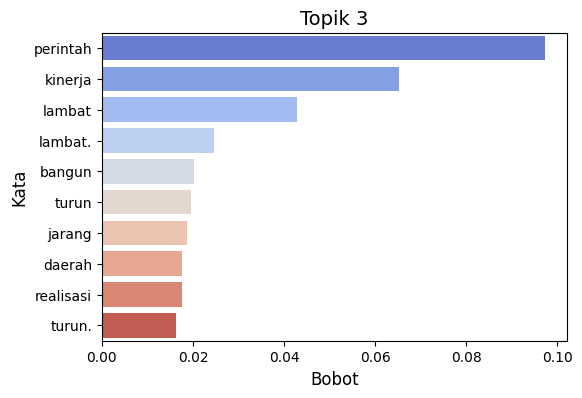

✅ Semua plot sudah disimpan di folder Google Drive: '/content/drive/My Drive/Data Tugas Akhir/LDA/Kinerja Pemerintah/Gambar'


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
from google.colab import drive

# 1. Mount Google Drive
drive.mount('/content/drive')

# 2. Tentukan folder output di Drive
output_folder = "/content/drive/My Drive/Data Tugas Akhir/LDA/Kinerja Pemerintah/Gambar"

# 3. Buat folder jika belum ada
os.makedirs(output_folder, exist_ok=True)

# Fungsi untuk membuat barplot dari df
def generate_barplot_from_df(df, topic_num):
    topic_df = df[df['topic_id'] == topic_num].sort_values(by='importance', ascending=False)

    plt.figure(figsize=(6, 4))
    sns.barplot(x='importance', y='word', data=topic_df, palette="coolwarm")
    plt.xlabel("Bobot", fontsize=12)
    plt.ylabel("Kata", fontsize=12)
    plt.title(f"Topik {topic_num}", fontsize=14)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    # Simpan gambar ke Google Drive
    filename = os.path.join(output_folder, f"topik_{topic_num}.png")
    plt.savefig(filename, bbox_inches='tight', dpi=300)
    plt.show()
    plt.close()

# Generate dan simpan semua topik
for topic_num in range(best_topics):
    generate_barplot_from_df(df, topic_num)

print(f"✅ Semua plot sudah disimpan di folder Google Drive: '{output_folder}'")

#LDA Pendidikan

In [ ]:
import pandas as pd

df = pd.read_csv('pendidikan_negatif.csv')

In [ ]:
df = df.drop_duplicates(subset='pertanyaan2')

In [ ]:
import re
import pandas as pd
def clean_ig_data(textt):

    textt = re.sub(r'\.{2,}', ' ', textt)
    textt = re.sub(r'\,{2,}', ' ', textt)
    textt = re.sub(r'"', ' ', textt)
    textt = re.sub(r'[^A-Za-z0-9\s,]', '', textt)
    textt = re.sub(r'\s+', ' ', textt).strip()

    return textt

df['cleaning'] = df['pertanyaan2'].apply(clean_ig_data)

In [ ]:
df['case_folding'] = df['pertanyaan2'].str.lower()

In [ ]:
import pandas as pd

def load_kamus_normalisasi(file_path):
    kamus = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            if '=' in line:
                tidak_baku, baku = line.strip().split('=')
                kamus[tidak_baku.lower()] = baku.lower()
    return kamus

def normalisasi_teks(teks, kamus):
    if pd.isnull(teks):
        return ''
    kata_kata = teks.split()
    hasil = [kamus.get(k.lower(), k) for k in kata_kata]
    return ' '.join(hasil)

kamus = load_kamus_normalisasi('kamus_norm.txt')

df['normalize'] = df['case_folding'].apply(lambda x: normalisasi_teks(x, kamus))

In [ ]:
df['tokenize'] = df['normalize'].apply(lambda x: x.split())

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_word = stopwords.words('indonesian')

def remove_stopwords(text):
    return [word for word in text if word not in stop_word]

df['stopword_removal'] = df['tokenize'].apply(lambda x: remove_stopwords(x))
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,pertanyaan2,cleaning,case_folding,normalize,tokenize,stopword_removal
0,"Pendidikan cukup baik, tapi sebagai guru honor...","Pendidikan cukup baik, tapi sebagai guru honor...","pendidikan cukup baik, tapi sebagai guru honor...","pendidikan cukup baik, tapi sebagai guru honor...","[pendidikan, cukup, baik,, tapi, sebagai, guru...","[pendidikan, baik,, guru, honorer,, kekurangan..."
1,Sekolah udah bagus tp kekurangan guru tetap.,Sekolah udah bagus tp kekurangan guru tetap,sekolah udah bagus tp kekurangan guru tetap.,sekolah sudah bagus tapi kekurangan guru tetap.,"[sekolah, sudah, bagus, tapi, kekurangan, guru...","[sekolah, bagus, kekurangan, guru, tetap.]"
2,"Sekolah anak dapat BOS, tapi uang pangkal mahal.","Sekolah anak dapat BOS, tapi uang pangkal mahal","sekolah anak dapat bos, tapi uang pangkal mahal.","sekolah anak dapat bos, tapi uang pangkal mahal.","[sekolah, anak, dapat, bos,, tapi, uang, pangk...","[sekolah, anak, bos,, uang, pangkal, mahal.]"
3,"Perpustakaan dapat bantuan buku pertanian, tap...","Perpustakaan dapat bantuan buku pertanian, tap...","perpustakaan dapat bantuan buku pertanian, tap...","perpustakaan dapat bantuan buku pertanian, tap...","[perpustakaan, dapat, bantuan, buku, pertanian...","[perpustakaan, bantuan, buku, pertanian,, baha..."
4,Pendidikan masih kekurangan guru di kampung.,Pendidikan masih kekurangan guru di kampung,pendidikan masih kekurangan guru di kampung.,pendidikan masih kekurangan guru di kampung.,"[pendidikan, masih, kekurangan, guru, di, kamp...","[pendidikan, kekurangan, guru, kampung.]"
...,...,...,...,...,...,...
446,"Pendidikan bagus, tp sekolah di desa msh kekur...","Pendidikan bagus, tp sekolah di desa msh kekur...","pendidikan bagus, tp sekolah di desa msh kekur...","pendidikan bagus, tapi sekolah di desa masih k...","[pendidikan, bagus,, tapi, sekolah, di, desa, ...","[pendidikan, bagus,, sekolah, desa, kekurangan.]"
447,"Pendidikan udah bagus, tp biaya seragam msh ma...","Pendidikan udah bagus, tp biaya seragam msh mahal","pendidikan udah bagus, tp biaya seragam msh ma...","pendidikan sudah bagus, tapi biaya seragam mas...","[pendidikan, sudah, bagus,, tapi, biaya, serag...","[pendidikan, bagus,, biaya, seragam, mahal.]"
448,Sekolah di Biatan kekurangan guru matematika. ...,Sekolah di Biatan kekurangan guru matematika A...,sekolah di biatan kekurangan guru matematika. ...,sekolah di biatan kekurangan guru matematika. ...,"[sekolah, di, biatan, kekurangan, guru, matema...","[sekolah, biatan, kekurangan, guru, matematika..."
449,Pendidikan desa msh kekurangan guru. Anak-anak...,Pendidikan desa msh kekurangan guru Anakanak k...,pendidikan desa msh kekurangan guru. anak-anak...,pendidikan desa masih kekurangan guru. anak-an...,"[pendidikan, desa, masih, kekurangan, guru., a...","[pendidikan, desa, kekurangan, guru., anak-ana..."


In [ ]:
!pip install simplemma

import pandas as pd
import simplemma

# Contoh DataFrame (asumsi sudah ada)
# df = pd.DataFrame({'stopword_removal': [...]})

def lemmatization(text_list):
    """
    Fungsi untuk melakukan lemmatisasi pada teks.
    Fungsi ini akan memproses kata-kata per individu.
    """
    if not isinstance(text_list, list):
        # Handle cases where input might not be a list (e.g., NaN after dropna earlier)
        return ''

    # Melakukan lemmatisasi pada setiap token dalam list
    # Menggunakan 'lang='id'' untuk bahasa Indonesia
    lemmatized_tokens = [simplemma.lemmatize(word, lang='id') for word in text_list]

    # Menggabungkan kembali token-token yang sudah dilemmatisasi menjadi string
    return ' '.join(lemmatized_tokens)

# Terapkan fungsi lemmatisasi ke kolom 'stopword_removal'
df['lemmatization'] = df['stopword_removal'].apply(lemmatization)
df

,pertanyaan2,cleaning,case_folding,normalize,tokenize,stopword_removal,lemmatization
0,"Pendidikan cukup baik, tapi sebagai guru honor...","Pendidikan cukup baik, tapi sebagai guru honor...","pendidikan cukup baik, tapi sebagai guru honor...","pendidikan cukup baik, tapi sebagai guru honor...","[pendidikan, cukup, baik,, tapi, sebagai, guru...","[pendidikan, baik,, guru, honorer,, kekurangan...","didik baik, guru honorer, kurang fasilitas bel..."
1,Sekolah udah bagus tp kekurangan guru tetap.,Sekolah udah bagus tp kekurangan guru tetap,sekolah udah bagus tp kekurangan guru tetap.,sekolah sudah bagus tapi kekurangan guru tetap.,"[sekolah, sudah, bagus, tapi, kekurangan, guru...","[sekolah, bagus, kekurangan, guru, tetap.]",sekolah bagus kurang guru tetap.
2,"Sekolah anak dapat BOS, tapi uang pangkal mahal.","Sekolah anak dapat BOS, tapi uang pangkal mahal","sekolah anak dapat bos, tapi uang pangkal mahal.","sekolah anak dapat bos, tapi uang pangkal mahal.","[sekolah, anak, dapat, bos,, tapi, uang, pangk...","[sekolah, anak, bos,, uang, pangkal, mahal.]","sekolah anak bos, uang pangkal mahal."
3,"Perpustakaan dapat bantuan buku pertanian, tap...","Perpustakaan dapat bantuan buku pertanian, tap...","perpustakaan dapat bantuan buku pertanian, tap...","perpustakaan dapat bantuan buku pertanian, tap...","[perpustakaan, dapat, bantuan, buku, pertanian...","[perpustakaan, bantuan, buku, pertanian,, baha...","perpustakaan bantu buku pertanian, bahasa sulit."
4,Pendidikan masih kekurangan guru di kampung.,Pendidikan masih kekurangan guru di kampung,pendidikan masih kekurangan guru di kampung.,pendidikan masih kekurangan guru di kampung.,"[pendidikan, masih, kekurangan, guru, di, kamp...","[pendidikan, kekurangan, guru, kampung.]",didik kurang guru kampung.
...,...,...,...,...,...,...,...
446,"Pendidikan bagus, tp sekolah di desa msh kekur...","Pendidikan bagus, tp sekolah di desa msh kekur...","pendidikan bagus, tp sekolah di desa msh kekur...","pendidikan bagus, tapi sekolah di desa masih k...","[pendidikan, bagus,, tapi, sekolah, di, desa, ...","[pendidikan, bagus,, sekolah, desa, kekurangan.]","didik bagus, sekolah desa kekurangan."
447,"Pendidikan udah bagus, tp biaya seragam msh ma...","Pendidikan udah bagus, tp biaya seragam msh mahal","pendidikan udah bagus, tp biaya seragam msh ma...","pendidikan sudah bagus, tapi biaya seragam mas...","[pendidikan, sudah, bagus,, tapi, biaya, serag...","[pendidikan, bagus,, biaya, seragam, mahal.]","didik bagus, biaya seragam mahal."
448,Sekolah di Biatan kekurangan guru matematika. ...,Sekolah di Biatan kekurangan guru matematika A...,sekolah di biatan kekurangan guru matematika. ...,sekolah di biatan kekurangan guru matematika. ...,"[sekolah, di, biatan, kekurangan, guru, matema...","[sekolah, biatan, kekurangan, guru, matematika...",sekolah biatan kurang guru matematika. anak ma...
449,Pendidikan desa msh kekurangan guru. Anak-anak...,Pendidikan desa msh kekurangan guru Anakanak k...,pendidikan desa msh kekurangan guru. anak-anak...,pendidikan desa masih kekurangan guru. anak-an...,"[pendidikan, desa, masih, kekurangan, guru., a...","[pendidikan, desa, kekurangan, guru., anak-ana...",didik desa kurang guru. anak-anak kadang camat...


In [ ]:
df.to_csv('hasil akhir pendidikan negatif.csv', index=False)
filtered_data = pd.read_csv("hasil akhir pendidikan negatif.csv")

In [ ]:
if 'lemmatization' not in filtered_data.columns:
    raise ValueError("Kolom 'lemmatization' tidak ditemukan dalam filtered_data.")

data_tokenized = [text.split() for text in filtered_data['lemmatization'] if isinstance(text, str)]

if not data_tokenized:
    raise ValueError("Tidak ada data yang valid untuk diproses.")

dictionary = corpora.Dictionary(data_tokenized)
corpus = [dictionary.doc2bow(text) for text in data_tokenized]

num_words = 10

# Gunakan nilai alpha dan eta yang lebih eksplisit
alpha_value = 0.1  # Nilai alpha yang lebih stabil
beta_value = 0.01  # Nilai eta yang lebih stabil
topic_range = range(1, 5)  # Coba dengan jumlah topik lebih sedikit

best_score = -1
best_topics = None
best_model = None

for num_topics in topic_range:
    lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=50,
                         iterations=1000, alpha=alpha_value, eta=beta_value, random_state=42)

    coherence_model = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary,
                                     texts=data_tokenized, coherence='c_v')
    coherence_score = coherence_model.get_coherence()

    print(f"Jumlah Topik: {num_topics}, Coherence Score: {coherence_score:.4f}")

    if coherence_score > best_score:
        best_score = coherence_score
        best_topics = num_topics
        best_model = lda_model

print(f"\nJumlah Topik Optimal: {best_topics} dengan Coherence Score: {best_score:.4f}")

Jumlah Topik: 1, Coherence Score: 0.3092
Jumlah Topik: 2, Coherence Score: 0.2493
Jumlah Topik: 3, Coherence Score: 0.2615
Jumlah Topik: 4, Coherence Score: 0.2608

Jumlah Topik Optimal: 1 dengan Coherence Score: 0.3092


In [ ]:
topics = best_model.show_topics(num_topics=best_topics, num_words=num_words, formatted=False)
for topic in topics:
    print(f"Topik {topic[0]}:")
    for word, weight in topic[1]:
        print(f"  {word}: {weight:.4f}")
    print("\n")

out = []
for i in range(best_topics):
    topic_words = best_model.show_topic(i, topn=num_words)
    for word, weight in topic_words:
        out.append([word, i, weight])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance'])

print(df.head())

Topik 0:
  sekolah: 0.0852
  didik: 0.0846
  fasilitas: 0.0328
  kurang: 0.0321
  guru: 0.0284
  anak: 0.0197
  minim.: 0.0172
  bagus,: 0.0162
  akses: 0.0156
  oke,: 0.0147


        word  topic_id  importance
0    sekolah         0    0.085175
1      didik         0    0.084551
2  fasilitas         0    0.032762
3     kurang         0    0.032138
4       guru         0    0.028394


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/tmp/ipython-input-3420609809.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='word', data=topic_df, palette="coolwarm")


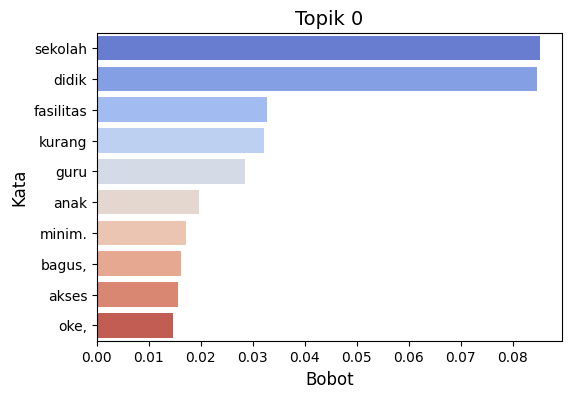

✅ Semua plot sudah disimpan di folder Google Drive: '/content/drive/My Drive/Data Tugas Akhir/LDA/Pendidikan/Gambar'


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
from google.colab import drive

# 1. Mount Google Drive
drive.mount('/content/drive')

# 2. Tentukan folder output di Drive
output_folder = "/content/drive/My Drive/Data Tugas Akhir/LDA/Pendidikan/Gambar"

# 3. Buat folder jika belum ada
os.makedirs(output_folder, exist_ok=True)

# Fungsi untuk membuat barplot dari df
def generate_barplot_from_df(df, topic_num):
    topic_df = df[df['topic_id'] == topic_num].sort_values(by='importance', ascending=False)

    plt.figure(figsize=(6, 4))
    sns.barplot(x='importance', y='word', data=topic_df, palette="coolwarm")
    plt.xlabel("Bobot", fontsize=12)
    plt.ylabel("Kata", fontsize=12)
    plt.title(f"Topik {topic_num}", fontsize=14)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    # Simpan gambar ke Google Drive
    filename = os.path.join(output_folder, f"topik_{topic_num}.png")
    plt.savefig(filename, bbox_inches='tight', dpi=300)
    plt.show()
    plt.close()

# Generate dan simpan semua topik
for topic_num in range(best_topics):
    generate_barplot_from_df(df, topic_num)

print(f"✅ Semua plot sudah disimpan di folder Google Drive: '{output_folder}'")

#LDA Kesehatan

In [ ]:
import pandas as pd

df = pd.read_csv('kesehatan_negatif.csv')

In [ ]:
df = df.drop_duplicates(subset='pertanyaan3')

In [ ]:
import re
import pandas as pd
def clean_ig_data(textt):

    textt = re.sub(r'\.{2,}', ' ', textt)
    textt = re.sub(r'\,{2,}', ' ', textt)
    textt = re.sub(r'"', ' ', textt)
    textt = re.sub(r'[^A-Za-z0-9\s,]', '', textt)
    textt = re.sub(r'\s+', ' ', textt).strip()

    return textt

df['cleaning'] = df['pertanyaan3'].apply(clean_ig_data)

In [ ]:
df['case_folding'] = df['pertanyaan3'].str.lower()

In [ ]:
import pandas as pd

def load_kamus_normalisasi(file_path):
    kamus = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            if '=' in line:
                tidak_baku, baku = line.strip().split('=')
                kamus[tidak_baku.lower()] = baku.lower()
    return kamus

def normalisasi_teks(teks, kamus):
    if pd.isnull(teks):
        return ''
    kata_kata = teks.split()
    hasil = [kamus.get(k.lower(), k) for k in kata_kata]
    return ' '.join(hasil)

kamus = load_kamus_normalisasi('kamus_norm.txt')

df['normalize'] = df['case_folding'].apply(lambda x: normalisasi_teks(x, kamus))

In [ ]:
df['tokenize'] = df['normalize'].apply(lambda x: x.split())

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_word = stopwords.words('indonesian')

def remove_stopwords(text):
    return [word for word in text if word not in stop_word]

df['stopword_removal'] = df['tokenize'].apply(lambda x: remove_stopwords(x))
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,pertanyaan3,cleaning,case_folding,normalize,tokenize,stopword_removal
0,"Puskesmas sering penuh, pelayanan jd lambat.","Puskesmas sering penuh, pelayanan jd lambat","puskesmas sering penuh, pelayanan jd lambat.","puskesmas sering penuh, pelayanan jadi lambat.","[puskesmas, sering, penuh,, pelayanan, jadi, l...","[puskesmas, penuh,, pelayanan, lambat.]"
1,"Puskesmas mulai berbenah, tp fasilitas masih t...","Puskesmas mulai berbenah, tp fasilitas masih t...","puskesmas mulai berbenah, tp fasilitas masih t...","puskesmas mulai berbenah, tapi fasilitas masih...","[puskesmas, mulai, berbenah,, tapi, fasilitas,...","[puskesmas, berbenah,, fasilitas, terbatas.]"
2,Kesehatan Puskesmas di Segah msh minim obat da...,Kesehatan Puskesmas di Segah msh minim obat da...,kesehatan puskesmas di segah msh minim obat da...,kesehatan puskesmas di segah masih minim obat ...,"[kesehatan, puskesmas, di, segah, masih, minim...","[kesehatan, puskesmas, segah, minim, obat, ten..."
3,"Kesehatan lumayan, tp rujukan ke RS susah.","Kesehatan lumayan, tp rujukan ke RS susah","kesehatan lumayan, tp rujukan ke rs susah.","kesehatan lumayan, tapi rujukan ke rs susah.","[kesehatan, lumayan,, tapi, rujukan, ke, rs, s...","[kesehatan, lumayan,, rujukan, rs, susah.]"
4,"Klinik kecil, alat terbatas.","Klinik kecil, alat terbatas","klinik kecil, alat terbatas.","klinik kecil, alat terbatas.","[klinik, kecil,, alat, terbatas.]","[klinik, kecil,, alat, terbatas.]"
...,...,...,...,...,...,...
366,Layanan kesehatan di puskesmas dan RSUD menuru...,Layanan kesehatan di puskesmas dan RSUD menuru...,layanan kesehatan di puskesmas dan rsud menuru...,layanan kesehatan di puskesmas dan rsud menuru...,"[layanan, kesehatan, di, puskesmas, dan, rsud,...","[layanan, kesehatan, puskesmas, rsud, sy, memb..."
367,"Puskesmas pulau cukup membantu, tp alat untuk ...","Puskesmas pulau cukup membantu, tp alat untuk ...","puskesmas pulau cukup membantu, tp alat untuk ...","puskesmas pulau cukup membantu, tapi alat untu...","[puskesmas, pulau, cukup, membantu,, tapi, ala...","[puskesmas, pulau, membantu,, alat, darurat, m..."
368,Layanan kesehatan semakin baik tapi biaya swab...,Layanan kesehatan semakin baik tapi biaya swab...,layanan kesehatan semakin baik tapi biaya swab...,layanan kesehatan semakin baik tapi biaya swab...,"[layanan, kesehatan, semakin, baik, tapi, biay...","[layanan, kesehatan, biaya, swab, kemahalan, s..."
369,"Kesehatan sdh berkembang, tp rujukan lambat.","Kesehatan sdh berkembang, tp rujukan lambat","kesehatan sdh berkembang, tp rujukan lambat.","kesehatan sudah berkembang, tapi rujukan lambat.","[kesehatan, sudah, berkembang,, tapi, rujukan,...","[kesehatan, berkembang,, rujukan, lambat.]"


In [ ]:
!pip install simplemma

import pandas as pd
import simplemma

# Contoh DataFrame (asumsi sudah ada)
# df = pd.DataFrame({'stopword_removal': [...]})

def lemmatization(text_list):
    """
    Fungsi untuk melakukan lemmatisasi pada teks.
    Fungsi ini akan memproses kata-kata per individu.
    """
    if not isinstance(text_list, list):
        # Handle cases where input might not be a list (e.g., NaN after dropna earlier)
        return ''

    # Melakukan lemmatisasi pada setiap token dalam list
    # Menggunakan 'lang='id'' untuk bahasa Indonesia
    lemmatized_tokens = [simplemma.lemmatize(word, lang='id') for word in text_list]

    # Menggabungkan kembali token-token yang sudah dilemmatisasi menjadi string
    return ' '.join(lemmatized_tokens)

# Terapkan fungsi lemmatisasi ke kolom 'stopword_removal'
df['lemmatization'] = df['stopword_removal'].apply(lemmatization)
df

,pertanyaan3,cleaning,case_folding,normalize,tokenize,stopword_removal,lemmatization
0,"Puskesmas sering penuh, pelayanan jd lambat.","Puskesmas sering penuh, pelayanan jd lambat","puskesmas sering penuh, pelayanan jd lambat.","puskesmas sering penuh, pelayanan jadi lambat.","[puskesmas, sering, penuh,, pelayanan, jadi, l...","[puskesmas, penuh,, pelayanan, lambat.]","puskesmas penuh, layan lambat."
1,"Puskesmas mulai berbenah, tp fasilitas masih t...","Puskesmas mulai berbenah, tp fasilitas masih t...","puskesmas mulai berbenah, tp fasilitas masih t...","puskesmas mulai berbenah, tapi fasilitas masih...","[puskesmas, mulai, berbenah,, tapi, fasilitas,...","[puskesmas, berbenah,, fasilitas, terbatas.]","puskesmas berbenah, fasilitas terbatas."
2,Kesehatan Puskesmas di Segah msh minim obat da...,Kesehatan Puskesmas di Segah msh minim obat da...,kesehatan puskesmas di segah msh minim obat da...,kesehatan puskesmas di segah masih minim obat ...,"[kesehatan, puskesmas, di, segah, masih, minim...","[kesehatan, puskesmas, segah, minim, obat, ten...",sehat puskesmas segah minim obat tenaga dokter...
3,"Kesehatan lumayan, tp rujukan ke RS susah.","Kesehatan lumayan, tp rujukan ke RS susah","kesehatan lumayan, tp rujukan ke rs susah.","kesehatan lumayan, tapi rujukan ke rs susah.","[kesehatan, lumayan,, tapi, rujukan, ke, rs, s...","[kesehatan, lumayan,, rujukan, rs, susah.]","sehat lumayan, rujuk rs susah."
4,"Klinik kecil, alat terbatas.","Klinik kecil, alat terbatas","klinik kecil, alat terbatas.","klinik kecil, alat terbatas.","[klinik, kecil,, alat, terbatas.]","[klinik, kecil,, alat, terbatas.]","klinik kecil, alat terbatas."
...,...,...,...,...,...,...,...
366,Layanan kesehatan di puskesmas dan RSUD menuru...,Layanan kesehatan di puskesmas dan RSUD menuru...,layanan kesehatan di puskesmas dan rsud menuru...,layanan kesehatan di puskesmas dan rsud menuru...,"[layanan, kesehatan, di, puskesmas, dan, rsud,...","[layanan, kesehatan, puskesmas, rsud, sy, memb...","layan sehat puskesmas rsud sy membaik, layan i..."
367,"Puskesmas pulau cukup membantu, tp alat untuk ...","Puskesmas pulau cukup membantu, tp alat untuk ...","puskesmas pulau cukup membantu, tp alat untuk ...","puskesmas pulau cukup membantu, tapi alat untu...","[puskesmas, pulau, cukup, membantu,, tapi, ala...","[puskesmas, pulau, membantu,, alat, darurat, m...","puskesmas pulau membantu, alat darurat minim."
368,Layanan kesehatan semakin baik tapi biaya swab...,Layanan kesehatan semakin baik tapi biaya swab...,layanan kesehatan semakin baik tapi biaya swab...,layanan kesehatan semakin baik tapi biaya swab...,"[layanan, kesehatan, semakin, baik, tapi, biay...","[layanan, kesehatan, biaya, swab, kemahalan, s...",layan sehat biaya swab mahal saya.
369,"Kesehatan sdh berkembang, tp rujukan lambat.","Kesehatan sdh berkembang, tp rujukan lambat","kesehatan sdh berkembang, tp rujukan lambat.","kesehatan sudah berkembang, tapi rujukan lambat.","[kesehatan, sudah, berkembang,, tapi, rujukan,...","[kesehatan, berkembang,, rujukan, lambat.]","sehat berkembang, rujuk lambat."


In [ ]:
df.to_csv('hasil akhir kesehatan negatif.csv', index=False)
filtered_data = pd.read_csv("hasil akhir kesehatan negatif.csv")

In [ ]:
if 'lemmatization' not in filtered_data.columns:
    raise ValueError("Kolom 'lemmatization' tidak ditemukan dalam filtered_data.")

data_tokenized = [text.split() for text in filtered_data['lemmatization'] if isinstance(text, str)]

if not data_tokenized:
    raise ValueError("Tidak ada data yang valid untuk diproses.")

dictionary = corpora.Dictionary(data_tokenized)
corpus = [dictionary.doc2bow(text) for text in data_tokenized]

num_words = 10

# Gunakan nilai alpha dan eta yang lebih eksplisit
alpha_value = 0.1  # Nilai alpha yang lebih stabil
beta_value = 0.01  # Nilai eta yang lebih stabil
topic_range = range(1, 5)  # Coba dengan jumlah topik lebih sedikit

best_score = -1
best_topics = None
best_model = None

for num_topics in topic_range:
    lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=50,
                         iterations=1000, alpha=alpha_value, eta=beta_value, random_state=42)

    coherence_model = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary,
                                     texts=data_tokenized, coherence='c_v')
    coherence_score = coherence_model.get_coherence()

    print(f"Jumlah Topik: {num_topics}, Coherence Score: {coherence_score:.4f}")

    if coherence_score > best_score:
        best_score = coherence_score
        best_topics = num_topics
        best_model = lda_model

print(f"\nJumlah Topik Optimal: {best_topics} dengan Coherence Score: {best_score:.4f}")

Jumlah Topik: 1, Coherence Score: 0.2986
Jumlah Topik: 2, Coherence Score: 0.2899
Jumlah Topik: 3, Coherence Score: 0.2954
Jumlah Topik: 4, Coherence Score: 0.3064

Jumlah Topik Optimal: 4 dengan Coherence Score: 0.3064


In [ ]:
topics = best_model.show_topics(num_topics=best_topics, num_words=num_words, formatted=False)
for topic in topics:
    print(f"Topik {topic[0]}:")
    for word, weight in topic[1]:
        print(f"  {word}: {weight:.4f}")
    print("\n")

out = []
for i in range(best_topics):
    topic_words = best_model.show_topic(i, topn=num_words)
    for word, weight in topic_words:
        out.append([word, i, weight])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance'])

print(df.head())

Topik 0:
  sehat: 0.1042
  layan: 0.0730
  sakit: 0.0382
  puskesmas: 0.0344
  kadang: 0.0307
  susah: 0.0302
  lambat.: 0.0251
  fasilitas: 0.0193
  obat: 0.0183
  akses: 0.0172


Topik 1:
  sehat: 0.0782
  layan: 0.0474
  tenaga: 0.0421
  medis: 0.0364
  alat: 0.0285
  puskesmas: 0.0284
  terbatas: 0.0257
  fasilitas: 0.0208
  sakit: 0.0205
  rsud: 0.0202


Topik 2:
  puskesmas: 0.0779
  layan: 0.0454
  terbatas.: 0.0377
  sehat: 0.0358
  medis: 0.0298
  alat: 0.0278
  kadang: 0.0234
  lengkap,: 0.0222
  susah: 0.0199
  buka: 0.0171


Topik 3:
  sehat: 0.0947
  puskesmas: 0.0538
  fasilitas: 0.0427
  layan: 0.0399
  susah: 0.0294
  terbatas.: 0.0195
  minim.: 0.0157
  tenaga: 0.0141
  daerah: 0.0121
  medis: 0.0111


        word  topic_id  importance
0      sehat         0    0.104168
1      layan         0    0.073019
2      sakit         0    0.038200
3  puskesmas         0    0.034371
4     kadang         0    0.030733


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/tmp/ipython-input-2898750205.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='word', data=topic_df, palette="coolwarm")


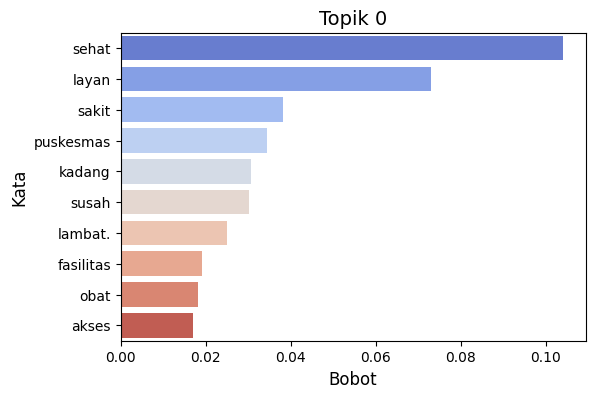

/tmp/ipython-input-2898750205.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='word', data=topic_df, palette="coolwarm")


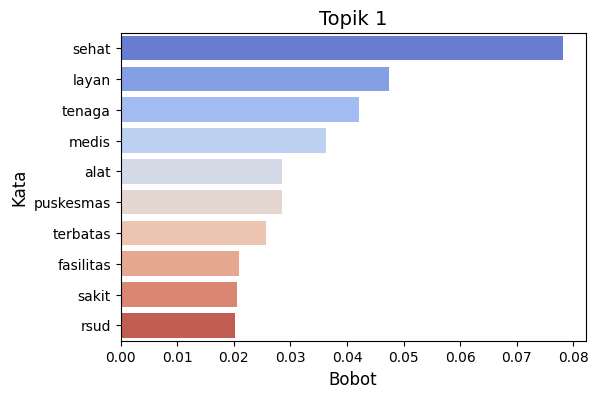

/tmp/ipython-input-2898750205.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='word', data=topic_df, palette="coolwarm")


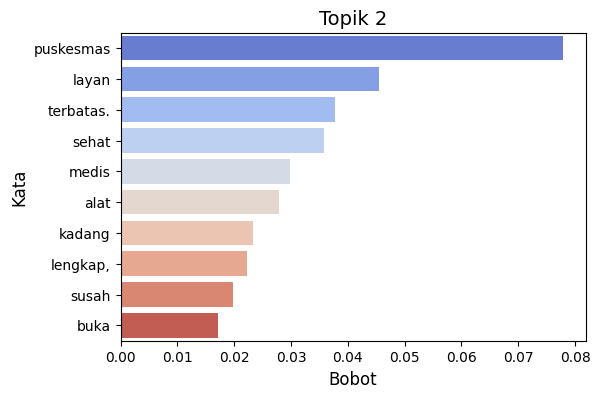

/tmp/ipython-input-2898750205.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='word', data=topic_df, palette="coolwarm")


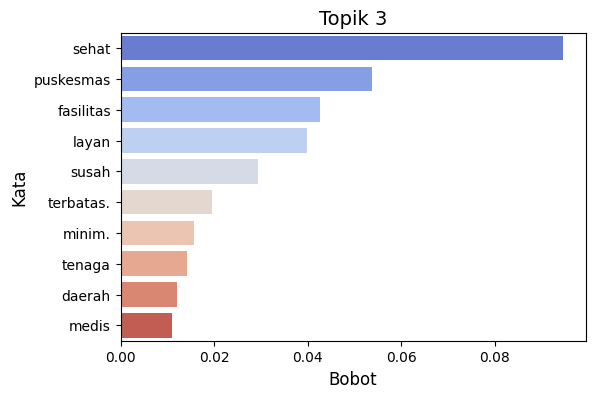

✅ Semua plot sudah disimpan di folder Google Drive: '/content/drive/My Drive/Data Tugas Akhir/LDA/Kesehatan/Gambar'


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
from google.colab import drive

# 1. Mount Google Drive
drive.mount('/content/drive')

# 2. Tentukan folder output di Drive
output_folder = "/content/drive/My Drive/Data Tugas Akhir/LDA/Kesehatan/Gambar"

# 3. Buat folder jika belum ada
os.makedirs(output_folder, exist_ok=True)

# Fungsi untuk membuat barplot dari df
def generate_barplot_from_df(df, topic_num):
    topic_df = df[df['topic_id'] == topic_num].sort_values(by='importance', ascending=False)

    plt.figure(figsize=(6, 4))
    sns.barplot(x='importance', y='word', data=topic_df, palette="coolwarm")
    plt.xlabel("Bobot", fontsize=12)
    plt.ylabel("Kata", fontsize=12)
    plt.title(f"Topik {topic_num}", fontsize=14)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    # Simpan gambar ke Google Drive
    filename = os.path.join(output_folder, f"topik_{topic_num}.png")
    plt.savefig(filename, bbox_inches='tight', dpi=300)
    plt.show()
    plt.close()

# Generate dan simpan semua topik
for topic_num in range(best_topics):
    generate_barplot_from_df(df, topic_num)

print(f"✅ Semua plot sudah disimpan di folder Google Drive: '{output_folder}'")

#LDA Pengangguran

In [ ]:
import pandas as pd

df = pd.read_csv('pengangguran_negatif.csv')

In [ ]:
df = df.drop_duplicates(subset='pertanyaan4')

In [ ]:
import re
import pandas as pd
def clean_ig_data(textt):

    textt = re.sub(r'\.{2,}', ' ', textt)
    textt = re.sub(r'\,{2,}', ' ', textt)
    textt = re.sub(r'"', ' ', textt)
    textt = re.sub(r'[^A-Za-z0-9\s,]', '', textt)
    textt = re.sub(r'\s+', ' ', textt).strip()

    return textt

df['cleaning'] = df['pertanyaan4'].apply(clean_ig_data)

In [ ]:
df['case_folding'] = df['pertanyaan4'].str.lower()

In [ ]:
import pandas as pd

def load_kamus_normalisasi(file_path):
    kamus = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            if '=' in line:
                tidak_baku, baku = line.strip().split('=')
                kamus[tidak_baku.lower()] = baku.lower()
    return kamus

def normalisasi_teks(teks, kamus):
    if pd.isnull(teks):
        return ''
    kata_kata = teks.split()
    hasil = [kamus.get(k.lower(), k) for k in kata_kata]
    return ' '.join(hasil)

kamus = load_kamus_normalisasi('kamus_norm.txt')

df['normalize'] = df['case_folding'].apply(lambda x: normalisasi_teks(x, kamus))

In [ ]:
df['tokenize'] = df['normalize'].apply(lambda x: x.split())

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_word = stopwords.words('indonesian')

def remove_stopwords(text):
    return [word for word in text if word not in stop_word]

df['stopword_removal'] = df['tokenize'].apply(lambda x: remove_stopwords(x))
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,pertanyaan4,cleaning,case_folding,normalize,tokenize,stopword_removal
0,"Kesempatan kerja masih minim, terutama buat ka...","Kesempatan kerja masih minim, terutama buat ka...","kesempatan kerja masih minim, terutama buat ka...","kesempatan kerja masih minim, terutama buat ka...","[kesempatan, kerja, masih, minim,, terutama, b...","[kesempatan, kerja, minim,, kerja, sektor, inf..."
1,Peluang kerja masih terbatas. Banyak warga han...,Peluang kerja masih terbatas Banyak warga hany...,peluang kerja masih terbatas. banyak warga han...,peluang kerja masih terbatas. banyak warga han...,"[peluang, kerja, masih, terbatas., banyak, war...","[peluang, kerja, terbatas., warga, bergantung,..."
2,Pendapatan menurun pasca pandemi.,Pendapatan menurun pasca pandemi,pendapatan menurun pasca pandemi.,pendapatan menurun pasca pandemi.,"[pendapatan, menurun, pasca, pandemi.]","[pendapatan, menurun, pasca, pandemi.]"
3,"Susah cari kerja tetap, byk yg serabutan.","Susah cari kerja tetap, byk yg serabutan","susah cari kerja tetap, byk yg serabutan.","susah cari kerja tetap, banyak yang serabutan.","[susah, cari, kerja, tetap,, banyak, yang, ser...","[susah, cari, kerja, tetap,, serabutan.]"
4,"Upaya turunkan pengangguran sdh ada, tp info l...","Upaya turunkan pengangguran sdh ada, tp info l...","upaya turunkan pengangguran sdh ada, tp info l...","upaya turunkan pengangguran sudah ada, tapi in...","[upaya, turunkan, pengangguran, sudah, ada,, t...","[upaya, turunkan, pengangguran, ada,, info, lo..."
...,...,...,...,...,...,...
742,Nelayan yg tdk melaut kesulitan cari kerja lain.,Nelayan yg tdk melaut kesulitan cari kerja lain,nelayan yg tdk melaut kesulitan cari kerja lain.,nelayan yang tidak melaut kesulitan cari kerja...,"[nelayan, yang, tidak, melaut, kesulitan, cari...","[nelayan, melaut, kesulitan, cari, kerja, lain.]"
743,Lapangan kerja msh minim utk usia dewasa.,Lapangan kerja msh minim utk usia dewasa,lapangan kerja msh minim utk usia dewasa.,lapangan kerja masih minim untuk usia dewasa.,"[lapangan, kerja, masih, minim, untuk, usia, d...","[lapangan, kerja, minim, usia, dewasa.]"
744,"Upaya turunkan pengangguran udah ada, tp penga...","Upaya turunkan pengangguran udah ada, tp penga...","upaya turunkan pengangguran udah ada, tp penga...","upaya turunkan pengangguran sudah ada, tapi pe...","[upaya, turunkan, pengangguran, sudah, ada,, t...","[upaya, turunkan, pengangguran, ada,, pengawas..."
745,Kerjaan buat ibu rumah tangga susah dapet.,Kerjaan buat ibu rumah tangga susah dapet,kerjaan buat ibu rumah tangga susah dapet.,kerjaan buat ibu rumah tangga susah dapet.,"[kerjaan, buat, ibu, rumah, tangga, susah, dap...","[kerjaan, rumah, tangga, susah, dapet.]"


In [ ]:
!pip install simplemma

import pandas as pd
import simplemma

# Contoh DataFrame (asumsi sudah ada)
# df = pd.DataFrame({'stopword_removal': [...]})

def lemmatization(text_list):
    """
    Fungsi untuk melakukan lemmatisasi pada teks.
    Fungsi ini akan memproses kata-kata per individu.
    """
    if not isinstance(text_list, list):
        # Handle cases where input might not be a list (e.g., NaN after dropna earlier)
        return ''

    # Melakukan lemmatisasi pada setiap token dalam list
    # Menggunakan 'lang='id'' untuk bahasa Indonesia
    lemmatized_tokens = [simplemma.lemmatize(word, lang='id') for word in text_list]

    # Menggabungkan kembali token-token yang sudah dilemmatisasi menjadi string
    return ' '.join(lemmatized_tokens)

# Terapkan fungsi lemmatisasi ke kolom 'stopword_removal'
df['lemmatization'] = df['stopword_removal'].apply(lemmatization)
df

,pertanyaan4,cleaning,case_folding,normalize,tokenize,stopword_removal,lemmatization
0,"Kesempatan kerja masih minim, terutama buat ka...","Kesempatan kerja masih minim, terutama buat ka...","kesempatan kerja masih minim, terutama buat ka...","kesempatan kerja masih minim, terutama buat ka...","[kesempatan, kerja, masih, minim,, terutama, b...","[kesempatan, kerja, minim,, kerja, sektor, inf...","kesempatan kerja minim, kerja sektor informal ..."
1,Peluang kerja masih terbatas. Banyak warga han...,Peluang kerja masih terbatas Banyak warga hany...,peluang kerja masih terbatas. banyak warga han...,peluang kerja masih terbatas. banyak warga han...,"[peluang, kerja, masih, terbatas., banyak, war...","[peluang, kerja, terbatas., warga, bergantung,...",peluang kerja terbatas. warga gantung sektor ikan
2,Pendapatan menurun pasca pandemi.,Pendapatan menurun pasca pandemi,pendapatan menurun pasca pandemi.,pendapatan menurun pasca pandemi.,"[pendapatan, menurun, pasca, pandemi.]","[pendapatan, menurun, pasca, pandemi.]",dapat turun pasca pandemi.
3,"Susah cari kerja tetap, byk yg serabutan.","Susah cari kerja tetap, byk yg serabutan","susah cari kerja tetap, byk yg serabutan.","susah cari kerja tetap, banyak yang serabutan.","[susah, cari, kerja, tetap,, banyak, yang, ser...","[susah, cari, kerja, tetap,, serabutan.]","susah cari kerja tetap, serabutan."
4,"Upaya turunkan pengangguran sdh ada, tp info l...","Upaya turunkan pengangguran sdh ada, tp info l...","upaya turunkan pengangguran sdh ada, tp info l...","upaya turunkan pengangguran sudah ada, tapi in...","[upaya, turunkan, pengangguran, sudah, ada,, t...","[upaya, turunkan, pengangguran, ada,, info, lo...","upaya turun anggur ada, info lowongan krg seba..."
...,...,...,...,...,...,...,...
742,Nelayan yg tdk melaut kesulitan cari kerja lain.,Nelayan yg tdk melaut kesulitan cari kerja lain,nelayan yg tdk melaut kesulitan cari kerja lain.,nelayan yang tidak melaut kesulitan cari kerja...,"[nelayan, yang, tidak, melaut, kesulitan, cari...","[nelayan, melaut, kesulitan, cari, kerja, lain.]",nelayan laut sulit cari kerja lain.
743,Lapangan kerja msh minim utk usia dewasa.,Lapangan kerja msh minim utk usia dewasa,lapangan kerja msh minim utk usia dewasa.,lapangan kerja masih minim untuk usia dewasa.,"[lapangan, kerja, masih, minim, untuk, usia, d...","[lapangan, kerja, minim, usia, dewasa.]",lapang kerja minim usia dewasa.
744,"Upaya turunkan pengangguran udah ada, tp penga...","Upaya turunkan pengangguran udah ada, tp penga...","upaya turunkan pengangguran udah ada, tp penga...","upaya turunkan pengangguran sudah ada, tapi pe...","[upaya, turunkan, pengangguran, sudah, ada,, t...","[upaya, turunkan, pengangguran, ada,, pengawas...","upaya turun anggur ada, awas lapang"
745,Kerjaan buat ibu rumah tangga susah dapet.,Kerjaan buat ibu rumah tangga susah dapet,kerjaan buat ibu rumah tangga susah dapet.,kerjaan buat ibu rumah tangga susah dapet.,"[kerjaan, buat, ibu, rumah, tangga, susah, dap...","[kerjaan, rumah, tangga, susah, dapet.]",kerja rumah tangga susah dapet.


In [ ]:
df.to_csv('hasil akhir pengangguran negatif.csv', index=False)
filtered_data = pd.read_csv("hasil akhir pengangguran negatif.csv")

In [ ]:
if 'lemmatization' not in filtered_data.columns:
    raise ValueError("Kolom 'lemmatization' tidak ditemukan dalam filtered_data.")

data_tokenized = [text.split() for text in filtered_data['lemmatization'] if isinstance(text, str)]

if not data_tokenized:
    raise ValueError("Tidak ada data yang valid untuk diproses.")

dictionary = corpora.Dictionary(data_tokenized)
corpus = [dictionary.doc2bow(text) for text in data_tokenized]

num_words = 10

# Gunakan nilai alpha dan eta yang lebih eksplisit
alpha_value = 0.1  # Nilai alpha yang lebih stabil
beta_value = 0.01  # Nilai eta yang lebih stabil
topic_range = range(1, 5)  # Coba dengan jumlah topik lebih sedikit

best_score = -1
best_topics = None
best_model = None

for num_topics in topic_range:
    lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=50,
                         iterations=1000, alpha=alpha_value, eta=beta_value, random_state=42)

    coherence_model = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary,
                                     texts=data_tokenized, coherence='c_v')
    coherence_score = coherence_model.get_coherence()

    print(f"Jumlah Topik: {num_topics}, Coherence Score: {coherence_score:.4f}")

    if coherence_score > best_score:
        best_score = coherence_score
        best_topics = num_topics
        best_model = lda_model

print(f"\nJumlah Topik Optimal: {best_topics} dengan Coherence Score: {best_score:.4f}")

Jumlah Topik: 1, Coherence Score: 0.2267
Jumlah Topik: 2, Coherence Score: 0.2100
Jumlah Topik: 3, Coherence Score: 0.2322
Jumlah Topik: 4, Coherence Score: 0.2405

Jumlah Topik Optimal: 4 dengan Coherence Score: 0.2405


In [ ]:
topics = best_model.show_topics(num_topics=best_topics, num_words=num_words, formatted=False)
for topic in topics:
    print(f"Topik {topic[0]}:")
    for word, weight in topic[1]:
        print(f"  {word}: {weight:.4f}")
    print("\n")

out = []
for i in range(best_topics):
    topic_words = best_model.show_topic(i, topn=num_words)
    for word, weight in topic_words:
        out.append([word, i, weight])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance'])

print(df.head())

Topik 0:
  anggur: 0.1264
  turun: 0.0848
  kerja: 0.0645
  lapang: 0.0322
  sedikit,: 0.0281
  latih: 0.0218
  upaya: 0.0203
  peluang: 0.0169
  sektor: 0.0159
  kurang: 0.0155


Topik 1:
  kerja: 0.1153
  anggur: 0.0535
  susah: 0.0387
  lapang: 0.0332
  latih: 0.0240
  cari: 0.0217
  lowongan: 0.0191
  lulus: 0.0170
  turun,: 0.0153
  muda: 0.0142


Topik 2:
  susah: 0.0909
  kerja: 0.0809
  cari: 0.0791
  usaha: 0.0227
  sulit: 0.0218
  kerja,: 0.0207
  kerja.: 0.0196
  perintah: 0.0187
  muda: 0.0179
  buka: 0.0155


Topik 3:
  anggur: 0.1115
  upaya: 0.0823
  turun: 0.0600
  ada,: 0.0483
  kerja: 0.0471
  latih: 0.0361
  program: 0.0304
  kurangi: 0.0276
  kurang: 0.0252
  lowongan: 0.0181


       word  topic_id  importance
0    anggur         0    0.126413
1     turun         0    0.084846
2     kerja         0    0.064505
3    lapang         0    0.032155
4  sedikit,         0    0.028105


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/tmp/ipython-input-2496510116.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='word', data=topic_df, palette="coolwarm")


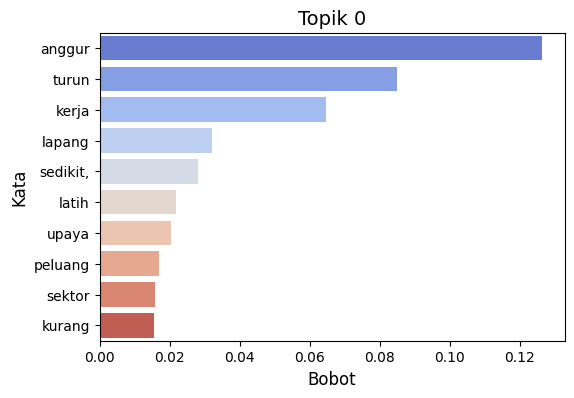

/tmp/ipython-input-2496510116.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='word', data=topic_df, palette="coolwarm")


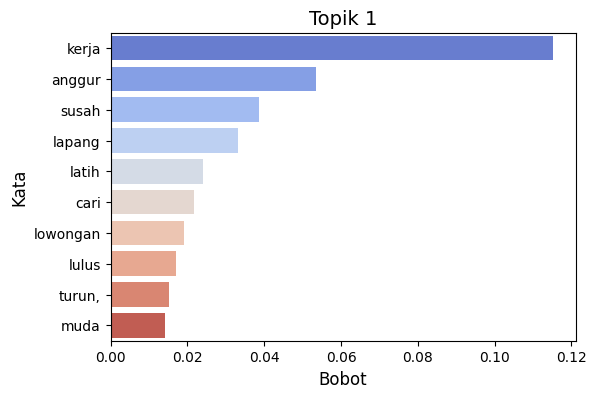

/tmp/ipython-input-2496510116.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='word', data=topic_df, palette="coolwarm")


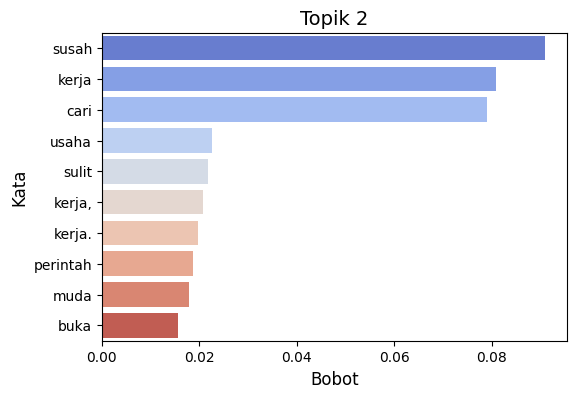

/tmp/ipython-input-2496510116.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='word', data=topic_df, palette="coolwarm")


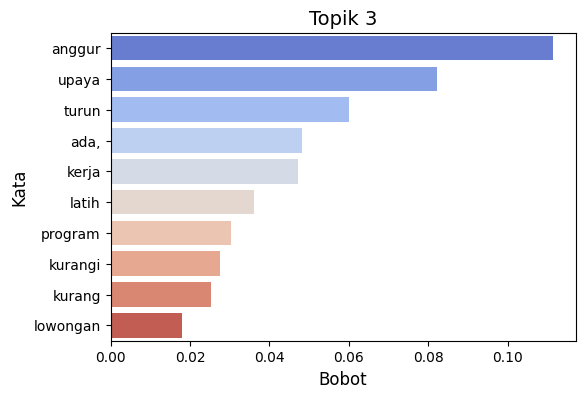

✅ Semua plot sudah disimpan di folder Google Drive: '/content/drive/My Drive/Data Tugas Akhir/LDA/Pengangguran/Gambar'


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
from google.colab import drive

# 1. Mount Google Drive
drive.mount('/content/drive')

# 2. Tentukan folder output di Drive
output_folder = "/content/drive/My Drive/Data Tugas Akhir/LDA/Pengangguran/Gambar"

# 3. Buat folder jika belum ada
os.makedirs(output_folder, exist_ok=True)

# Fungsi untuk membuat barplot dari df
def generate_barplot_from_df(df, topic_num):
    topic_df = df[df['topic_id'] == topic_num].sort_values(by='importance', ascending=False)

    plt.figure(figsize=(6, 4))
    sns.barplot(x='importance', y='word', data=topic_df, palette="coolwarm")
    plt.xlabel("Bobot", fontsize=12)
    plt.ylabel("Kata", fontsize=12)
    plt.title(f"Topik {topic_num}", fontsize=14)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    # Simpan gambar ke Google Drive
    filename = os.path.join(output_folder, f"topik_{topic_num}.png")
    plt.savefig(filename, bbox_inches='tight', dpi=300)
    plt.show()
    plt.close()

# Generate dan simpan semua topik
for topic_num in range(best_topics):
    generate_barplot_from_df(df, topic_num)

print(f"✅ Semua plot sudah disimpan di folder Google Drive: '{output_folder}'")

#LDA Kemiskinan

In [ ]:
import pandas as pd

df = pd.read_csv('kemiskinan_negatif.csv')

In [ ]:
df = df.drop_duplicates(subset='pertanyaan5')

In [ ]:
import re
import pandas as pd
def clean_ig_data(textt):

    textt = re.sub(r'\.{2,}', ' ', textt)
    textt = re.sub(r'\,{2,}', ' ', textt)
    textt = re.sub(r'"', ' ', textt)
    textt = re.sub(r'[^A-Za-z0-9\s,]', '', textt)
    textt = re.sub(r'\s+', ' ', textt).strip()

    return textt

df['cleaning'] = df['pertanyaan5'].apply(clean_ig_data)

In [ ]:
df['case_folding'] = df['pertanyaan5'].str.lower()

In [ ]:
import pandas as pd

def load_kamus_normalisasi(file_path):
    kamus = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            if '=' in line:
                tidak_baku, baku = line.strip().split('=')
                kamus[tidak_baku.lower()] = baku.lower()
    return kamus

def normalisasi_teks(teks, kamus):
    if pd.isnull(teks):
        return ''
    kata_kata = teks.split()
    hasil = [kamus.get(k.lower(), k) for k in kata_kata]
    return ' '.join(hasil)

kamus = load_kamus_normalisasi('kamus_norm.txt')

df['normalize'] = df['case_folding'].apply(lambda x: normalisasi_teks(x, kamus))

In [ ]:
df['tokenize'] = df['normalize'].apply(lambda x: x.split())

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_word = stopwords.words('indonesian')

def remove_stopwords(text):
    return [word for word in text if word not in stop_word]

df['stopword_removal'] = df['tokenize'].apply(lambda x: remove_stopwords(x))
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,pertanyaan5,cleaning,case_folding,normalize,tokenize,stopword_removal
0,Warga kecil msh kesulitan akses bantuan.,Warga kecil msh kesulitan akses bantuan,warga kecil msh kesulitan akses bantuan.,warga kecil masih kesulitan akses bantuan.,"[warga, kecil, masih, kesulitan, akses, bantuan.]","[warga, kesulitan, akses, bantuan.]"
1,Bantuan untuk keluarga tidak mampu kadang tela...,Bantuan untuk keluarga tidak mampu kadang tela...,bantuan untuk keluarga tidak mampu kadang tela...,bantuan untuk keluarga tidak mampu kadang tela...,"[bantuan, untuk, keluarga, tidak, mampu, kadan...","[bantuan, keluarga, kadang, telat, turun, pros..."
2,Kemiskinan menurun saat harga sawit tinggi. Ba...,Kemiskinan menurun saat harga sawit tinggi Ban...,kemiskinan menurun saat harga sawit tinggi. ba...,kemiskinan menurun saat harga sawit tinggi. ba...,"[kemiskinan, menurun, saat, harga, sawit, ting...","[kemiskinan, menurun, harga, sawit, tinggi., b..."
3,"Bantuan kandang modern dikasih, tapi biaya per...","Bantuan kandang modern dikasih, tapi biaya per...","bantuan kandang modern dikasih, tapi biaya per...","bantuan kandang modern dikasih, tapi biaya per...","[bantuan, kandang, modern, dikasih,, tapi, bia...","[bantuan, kandang, modern, dikasih,, biaya, pe..."
4,Program penurunan kemiskinan kayak bantuan sew...,Program penurunan kemiskinan kayak bantuan sew...,program penurunan kemiskinan kayak bantuan sew...,program penurunan kemiskinan seperti bantuan s...,"[program, penurunan, kemiskinan, seperti, bant...","[program, penurunan, kemiskinan, bantuan, sewa..."
...,...,...,...,...,...,...
497,"Kemiskinan turun sedikit, tapi dampaknya belum...","Kemiskinan turun sedikit, tapi dampaknya belum...","kemiskinan turun sedikit, tapi dampaknya belum...","kemiskinan turun sedikit, tapi dampaknya belum...","[kemiskinan, turun, sedikit,, tapi, dampaknya,...","[kemiskinan, turun, sedikit,, dampaknya, keras..."
498,Masih banyak yang kesulitan makan,Masih banyak yang kesulitan makan,masih banyak yang kesulitan makan,masih banyak yang kesulitan makan,"[masih, banyak, yang, kesulitan, makan]","[kesulitan, makan]"
499,Kemiskinan menurun krn semua warga ikut ambil ...,Kemiskinan menurun krn semua warga ikut ambil ...,kemiskinan menurun krn semua warga ikut ambil ...,kemiskinan menurun karena semua warga ikut amb...,"[kemiskinan, menurun, karena, semua, warga, ik...","[kemiskinan, menurun, warga, ambil, wisata., b..."
500,"Kemiskinan menurun sedikit, tapi harga BBM tin...","Kemiskinan menurun sedikit, tapi harga BBM tinggi","kemiskinan menurun sedikit, tapi harga bbm tin...","kemiskinan menurun sedikit, tapi harga bbm tin...","[kemiskinan, menurun, sedikit,, tapi, harga, b...","[kemiskinan, menurun, sedikit,, harga, bbm, ti..."


In [ ]:
!pip install simplemma

import pandas as pd
import simplemma

# Contoh DataFrame (asumsi sudah ada)
# df = pd.DataFrame({'stopword_removal': [...]})

def lemmatization(text_list):
    """
    Fungsi untuk melakukan lemmatisasi pada teks.
    Fungsi ini akan memproses kata-kata per individu.
    """
    if not isinstance(text_list, list):
        # Handle cases where input might not be a list (e.g., NaN after dropna earlier)
        return ''

    # Melakukan lemmatisasi pada setiap token dalam list
    # Menggunakan 'lang='id'' untuk bahasa Indonesia
    lemmatized_tokens = [simplemma.lemmatize(word, lang='id') for word in text_list]

    # Menggabungkan kembali token-token yang sudah dilemmatisasi menjadi string
    return ' '.join(lemmatized_tokens)

# Terapkan fungsi lemmatisasi ke kolom 'stopword_removal'
df['lemmatization'] = df['stopword_removal'].apply(lemmatization)
df

,pertanyaan5,cleaning,case_folding,normalize,tokenize,stopword_removal,lemmatization
0,Warga kecil msh kesulitan akses bantuan.,Warga kecil msh kesulitan akses bantuan,warga kecil msh kesulitan akses bantuan.,warga kecil masih kesulitan akses bantuan.,"[warga, kecil, masih, kesulitan, akses, bantuan.]","[warga, kesulitan, akses, bantuan.]",warga sulit akses bantuan.
1,Bantuan untuk keluarga tidak mampu kadang tela...,Bantuan untuk keluarga tidak mampu kadang tela...,bantuan untuk keluarga tidak mampu kadang tela...,bantuan untuk keluarga tidak mampu kadang tela...,"[bantuan, untuk, keluarga, tidak, mampu, kadan...","[bantuan, keluarga, kadang, telat, turun, pros...",bantu keluarga kadang telat turun proses ribet
2,Kemiskinan menurun saat harga sawit tinggi. Ba...,Kemiskinan menurun saat harga sawit tinggi Ban...,kemiskinan menurun saat harga sawit tinggi. ba...,kemiskinan menurun saat harga sawit tinggi. ba...,"[kemiskinan, menurun, saat, harga, sawit, ting...","[kemiskinan, menurun, harga, sawit, tinggi., b...",miskin turun harga sawit tinggi. bantu petani ...
3,"Bantuan kandang modern dikasih, tapi biaya per...","Bantuan kandang modern dikasih, tapi biaya per...","bantuan kandang modern dikasih, tapi biaya per...","bantuan kandang modern dikasih, tapi biaya per...","[bantuan, kandang, modern, dikasih,, tapi, bia...","[bantuan, kandang, modern, dikasih,, biaya, pe...","bantu kandang modern dikasih, biaya rawat mahal."
4,Program penurunan kemiskinan kayak bantuan sew...,Program penurunan kemiskinan kayak bantuan sew...,program penurunan kemiskinan kayak bantuan sew...,program penurunan kemiskinan seperti bantuan s...,"[program, penurunan, kemiskinan, seperti, bant...","[program, penurunan, kemiskinan, bantuan, sewa...",program turun miskin bantu sewa rumah sembako ...
...,...,...,...,...,...,...,...
497,"Kemiskinan turun sedikit, tapi dampaknya belum...","Kemiskinan turun sedikit, tapi dampaknya belum...","kemiskinan turun sedikit, tapi dampaknya belum...","kemiskinan turun sedikit, tapi dampaknya belum...","[kemiskinan, turun, sedikit,, tapi, dampaknya,...","[kemiskinan, turun, sedikit,, dampaknya, keras...","miskin turun sedikit, dampak kerasa kampung"
498,Masih banyak yang kesulitan makan,Masih banyak yang kesulitan makan,masih banyak yang kesulitan makan,masih banyak yang kesulitan makan,"[masih, banyak, yang, kesulitan, makan]","[kesulitan, makan]",sulit makan
499,Kemiskinan menurun krn semua warga ikut ambil ...,Kemiskinan menurun krn semua warga ikut ambil ...,kemiskinan menurun krn semua warga ikut ambil ...,kemiskinan menurun karena semua warga ikut amb...,"[kemiskinan, menurun, karena, semua, warga, ik...","[kemiskinan, menurun, warga, ambil, wisata., b...",miskin turun warga ambil wisata. bantu kuat mo...
500,"Kemiskinan menurun sedikit, tapi harga BBM tin...","Kemiskinan menurun sedikit, tapi harga BBM tinggi","kemiskinan menurun sedikit, tapi harga bbm tin...","kemiskinan menurun sedikit, tapi harga bbm tin...","[kemiskinan, menurun, sedikit,, tapi, harga, b...","[kemiskinan, menurun, sedikit,, harga, bbm, ti...","miskin turun sedikit, harga bbm tinggi."


In [ ]:
df.to_csv('hasil akhir kemiskinan negatif.csv', index=False)
filtered_data = pd.read_csv("hasil akhir kemiskinan negatif.csv")

In [ ]:
if 'lemmatization' not in filtered_data.columns:
    raise ValueError("Kolom 'lemmatization' tidak ditemukan dalam filtered_data.")

data_tokenized = [text.split() for text in filtered_data['lemmatization'] if isinstance(text, str)]

if not data_tokenized:
    raise ValueError("Tidak ada data yang valid untuk diproses.")

dictionary = corpora.Dictionary(data_tokenized)
corpus = [dictionary.doc2bow(text) for text in data_tokenized]

num_words = 10

# Gunakan nilai alpha dan eta yang lebih eksplisit
alpha_value = 0.1  # Nilai alpha yang lebih stabil
beta_value = 0.01  # Nilai eta yang lebih stabil
topic_range = range(1, 5)  # Coba dengan jumlah topik lebih sedikit

best_score = -1
best_topics = None
best_model = None

for num_topics in topic_range:
    lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=50,
                         iterations=1000, alpha=alpha_value, eta=beta_value, random_state=42)

    coherence_model = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary,
                                     texts=data_tokenized, coherence='c_v')
    coherence_score = coherence_model.get_coherence()

    print(f"Jumlah Topik: {num_topics}, Coherence Score: {coherence_score:.4f}")

    if coherence_score > best_score:
        best_score = coherence_score
        best_topics = num_topics
        best_model = lda_model

print(f"\nJumlah Topik Optimal: {best_topics} dengan Coherence Score: {best_score:.4f}")

Jumlah Topik: 1, Coherence Score: 0.2537
Jumlah Topik: 2, Coherence Score: 0.3387
Jumlah Topik: 3, Coherence Score: 0.3063
Jumlah Topik: 4, Coherence Score: 0.3261

Jumlah Topik Optimal: 2 dengan Coherence Score: 0.3387


In [ ]:
topics = best_model.show_topics(num_topics=best_topics, num_words=num_words, formatted=False)
for topic in topics:
    print(f"Topik {topic[0]}:")
    for word, weight in topic[1]:
        print(f"  {word}: {weight:.4f}")
    print("\n")

out = []
for i in range(best_topics):
    topic_words = best_model.show_topic(i, topn=num_words)
    for word, weight in topic_words:
        out.append([word, i, weight])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance'])

print(df.head())

Topik 0:
  miskin: 0.0781
  bantu: 0.0594
  turun: 0.0330
  program: 0.0240
  harga: 0.0237
  butuh: 0.0176
  turun,: 0.0174
  susah: 0.0113
  perintah: 0.0107
  kurang: 0.0098


Topik 1:
  miskin: 0.1103
  turun: 0.0841
  bantu: 0.0497
  harga: 0.0206
  program: 0.0189
  kadang: 0.0189
  warga: 0.0176
  data: 0.0164
  sedikit,: 0.0158
  ada,: 0.0125


      word  topic_id  importance
0   miskin         0    0.078094
1    bantu         0    0.059360
2    turun         0    0.033042
3  program         0    0.024002
4    harga         0    0.023689


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/tmp/ipython-input-3795009435.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='word', data=topic_df, palette="coolwarm")


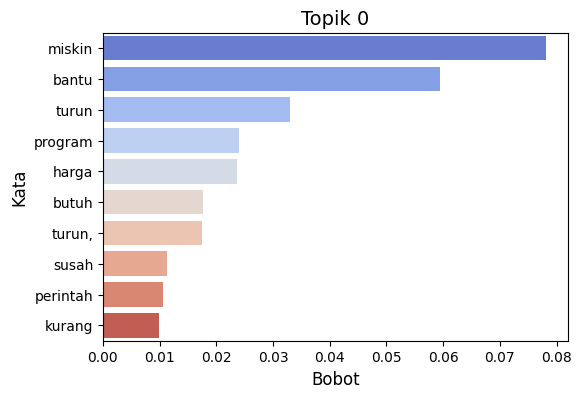

/tmp/ipython-input-3795009435.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='word', data=topic_df, palette="coolwarm")


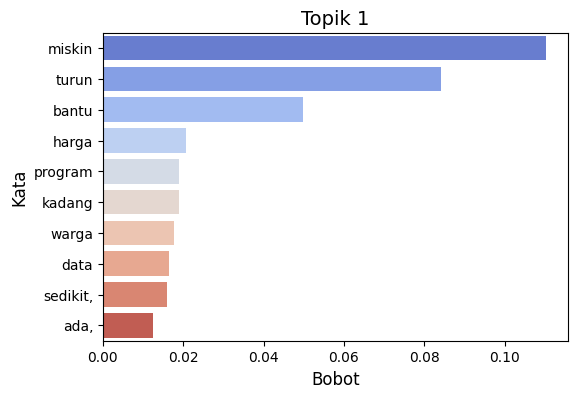

✅ Semua plot sudah disimpan di folder Google Drive: '/content/drive/My Drive/Data Tugas Akhir/LDA/Kemiskinan/Gambar'


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
from google.colab import drive

# 1. Mount Google Drive
drive.mount('/content/drive')

# 2. Tentukan folder output di Drive
output_folder = "/content/drive/My Drive/Data Tugas Akhir/LDA/Kemiskinan/Gambar"

# 3. Buat folder jika belum ada
os.makedirs(output_folder, exist_ok=True)

# Fungsi untuk membuat barplot dari df
def generate_barplot_from_df(df, topic_num):
    topic_df = df[df['topic_id'] == topic_num].sort_values(by='importance', ascending=False)

    plt.figure(figsize=(6, 4))
    sns.barplot(x='importance', y='word', data=topic_df, palette="coolwarm")
    plt.xlabel("Bobot", fontsize=12)
    plt.ylabel("Kata", fontsize=12)
    plt.title(f"Topik {topic_num}", fontsize=14)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    # Simpan gambar ke Google Drive
    filename = os.path.join(output_folder, f"topik_{topic_num}.png")
    plt.savefig(filename, bbox_inches='tight', dpi=300)
    plt.show()
    plt.close()

# Generate dan simpan semua topik
for topic_num in range(best_topics):
    generate_barplot_from_df(df, topic_num)

print(f"✅ Semua plot sudah disimpan di folder Google Drive: '{output_folder}'")

#LDA IKM

In [ ]:
import pandas as pd

df = pd.read_csv('ikm_negatif.csv')

In [ ]:
df = df.drop_duplicates(subset='pertanyaan6')

In [ ]:
import re
import pandas as pd
def clean_ig_data(textt):

    textt = re.sub(r'\.{2,}', ' ', textt)
    textt = re.sub(r'\,{2,}', ' ', textt)
    textt = re.sub(r'"', ' ', textt)
    textt = re.sub(r'[^A-Za-z0-9\s,]', '', textt)
    textt = re.sub(r'\s+', ' ', textt).strip()

    return textt

df['cleaning'] = df['pertanyaan6'].apply(clean_ig_data)

In [ ]:
df['case_folding'] = df['pertanyaan6'].str.lower()

In [ ]:
import pandas as pd

def load_kamus_normalisasi(file_path):
    kamus = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            if '=' in line:
                tidak_baku, baku = line.strip().split('=')
                kamus[tidak_baku.lower()] = baku.lower()
    return kamus

def normalisasi_teks(teks, kamus):
    if pd.isnull(teks):
        return ''
    kata_kata = teks.split()
    hasil = [kamus.get(k.lower(), k) for k in kata_kata]
    return ' '.join(hasil)

kamus = load_kamus_normalisasi('kamus_norm.txt')

df['normalize'] = df['case_folding'].apply(lambda x: normalisasi_teks(x, kamus))

In [ ]:
df['tokenize'] = df['normalize'].apply(lambda x: x.split())

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_word = stopwords.words('indonesian')

def remove_stopwords(text):
    return [word for word in text if word not in stop_word]

df['stopword_removal'] = df['tokenize'].apply(lambda x: remove_stopwords(x))
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,pertanyaan6,cleaning,case_folding,normalize,tokenize,stopword_removal
0,"UMKM mulai dapet perhatian, tp akses modal msh...","UMKM mulai dapet perhatian, tp akses modal msh...","umkm mulai dapet perhatian, tp akses modal msh...","umkm mulai dapat perhatian, tapi akses modal m...","[umkm, mulai, dapat, perhatian,, tapi, akses, ...","[umkm, perhatian,, akses, modal, sulit.]"
1,Usaha kecil minim dukungan dari pemerintah.,Usaha kecil minim dukungan dari pemerintah,usaha kecil minim dukungan dari pemerintah.,usaha kecil minim dukungan dari pemerintah.,"[usaha, kecil, minim, dukungan, dari, pemerint...","[usaha, minim, dukungan, pemerintah.]"
2,"UMKM batu bata dibantu, tapi pasir susah dapet.","UMKM batu bata dibantu, tapi pasir susah dapet","umkm batu bata dibantu, tapi pasir susah dapet.","umkm batu bata dibantu, tapi pasir susah dapet.","[umkm, batu, bata, dibantu,, tapi, pasir, susa...","[umkm, batu, bata, dibantu,, pasir, susah, dap..."
3,Usaha kecil sulit berkembang tanpa akses modal.,Usaha kecil sulit berkembang tanpa akses modal,usaha kecil sulit berkembang tanpa akses modal.,usaha kecil sulit berkembang tanpa akses modal.,"[usaha, kecil, sulit, berkembang, tanpa, akses...","[usaha, sulit, berkembang, akses, modal.]"
4,"UMKM dipromosiin, tp susah akses modal buat us...","UMKM dipromosiin, tp susah akses modal buat us...","umkm dipromosiin, tp susah akses modal buat us...","umkm dipromosiin, tapi susah akses modal buat ...","[umkm, dipromosiin,, tapi, susah, akses, modal...","[umkm, dipromosiin,, susah, akses, modal, usah..."
...,...,...,...,...,...,...
453,"UMKM belum berkembang, modal terbatas. Pemerin...","UMKM belum berkembang, modal terbatas Pemerint...","umkm belum berkembang, modal terbatas. pemerin...","umkm belum berkembang, modal terbatas. pemerin...","[umkm, belum, berkembang,, modal, terbatas., p...","[umkm, berkembang,, modal, terbatas., pemerint..."
454,"UMKM mulai naik, tp akses modal susah. Bank da...","UMKM mulai naik, tp akses modal susah Bank dae...","umkm mulai naik, tp akses modal susah. bank da...","umkm mulai naik, tapi akses modal susah. bank ...","[umkm, mulai, naik,, tapi, akses, modal, susah...","[umkm, naik,, akses, modal, susah., bank, daer..."
455,"UMKM difasilitasi, tp persaingan dgn pelaku be...","UMKM difasilitasi, tp persaingan dgn pelaku be...","umkm difasilitasi, tp persaingan dgn pelaku be...","umkm difasilitasi, tapi persaingan dengan pela...","[umkm, difasilitasi,, tapi, persaingan, dengan...","[umkm, difasilitasi,, persaingan, pelaku, biki..."
456,"UMKM dapat bantu promosi, tapi modal minim.","UMKM dapat bantu promosi, tapi modal minim","umkm dapat bantu promosi, tapi modal minim.","umkm dapat bantu promosi, tapi modal minim.","[umkm, dapat, bantu, promosi,, tapi, modal, mi...","[umkm, bantu, promosi,, modal, minim.]"


In [ ]:
!pip install simplemma

import pandas as pd
import simplemma

# Contoh DataFrame (asumsi sudah ada)
# df = pd.DataFrame({'stopword_removal': [...]})

def lemmatization(text_list):
    """
    Fungsi untuk melakukan lemmatisasi pada teks.
    Fungsi ini akan memproses kata-kata per individu.
    """
    if not isinstance(text_list, list):
        # Handle cases where input might not be a list (e.g., NaN after dropna earlier)
        return ''

    # Melakukan lemmatisasi pada setiap token dalam list
    # Menggunakan 'lang='id'' untuk bahasa Indonesia
    lemmatized_tokens = [simplemma.lemmatize(word, lang='id') for word in text_list]

    # Menggabungkan kembali token-token yang sudah dilemmatisasi menjadi string
    return ' '.join(lemmatized_tokens)

# Terapkan fungsi lemmatisasi ke kolom 'stopword_removal'
df['lemmatization'] = df['stopword_removal'].apply(lemmatization)
df

,pertanyaan6,cleaning,case_folding,normalize,tokenize,stopword_removal,lemmatization
0,"UMKM mulai dapet perhatian, tp akses modal msh...","UMKM mulai dapet perhatian, tp akses modal msh...","umkm mulai dapet perhatian, tp akses modal msh...","umkm mulai dapat perhatian, tapi akses modal m...","[umkm, mulai, dapat, perhatian,, tapi, akses, ...","[umkm, perhatian,, akses, modal, sulit.]","umkm perhatian, akses modal sulit."
1,Usaha kecil minim dukungan dari pemerintah.,Usaha kecil minim dukungan dari pemerintah,usaha kecil minim dukungan dari pemerintah.,usaha kecil minim dukungan dari pemerintah.,"[usaha, kecil, minim, dukungan, dari, pemerint...","[usaha, minim, dukungan, pemerintah.]",usaha minim dukung pemerintah.
2,"UMKM batu bata dibantu, tapi pasir susah dapet.","UMKM batu bata dibantu, tapi pasir susah dapet","umkm batu bata dibantu, tapi pasir susah dapet.","umkm batu bata dibantu, tapi pasir susah dapet.","[umkm, batu, bata, dibantu,, tapi, pasir, susa...","[umkm, batu, bata, dibantu,, pasir, susah, dap...","umkm batu bata dibantu, pasir susah dapet."
3,Usaha kecil sulit berkembang tanpa akses modal.,Usaha kecil sulit berkembang tanpa akses modal,usaha kecil sulit berkembang tanpa akses modal.,usaha kecil sulit berkembang tanpa akses modal.,"[usaha, kecil, sulit, berkembang, tanpa, akses...","[usaha, sulit, berkembang, akses, modal.]",usaha sulit kembang akses modal.
4,"UMKM dipromosiin, tp susah akses modal buat us...","UMKM dipromosiin, tp susah akses modal buat us...","umkm dipromosiin, tp susah akses modal buat us...","umkm dipromosiin, tapi susah akses modal buat ...","[umkm, dipromosiin,, tapi, susah, akses, modal...","[umkm, dipromosiin,, susah, akses, modal, usah...","umkm dipromosiin, susah akses modal usaha kecil."
...,...,...,...,...,...,...,...
453,"UMKM belum berkembang, modal terbatas. Pemerin...","UMKM belum berkembang, modal terbatas Pemerint...","umkm belum berkembang, modal terbatas. pemerin...","umkm belum berkembang, modal terbatas. pemerin...","[umkm, belum, berkembang,, modal, terbatas., p...","[umkm, berkembang,, modal, terbatas., pemerint...","umkm berkembang, modal terbatas. perintah turu..."
454,"UMKM mulai naik, tp akses modal susah. Bank da...","UMKM mulai naik, tp akses modal susah Bank dae...","umkm mulai naik, tp akses modal susah. bank da...","umkm mulai naik, tapi akses modal susah. bank ...","[umkm, mulai, naik,, tapi, akses, modal, susah...","[umkm, naik,, akses, modal, susah., bank, daer...","umkm naik, akses modal susah. bank daerah flek..."
455,"UMKM difasilitasi, tp persaingan dgn pelaku be...","UMKM difasilitasi, tp persaingan dgn pelaku be...","umkm difasilitasi, tp persaingan dgn pelaku be...","umkm difasilitasi, tapi persaingan dengan pela...","[umkm, difasilitasi,, tapi, persaingan, dengan...","[umkm, difasilitasi,, persaingan, pelaku, biki...","umkm difasilitasi, saing laku bikin susah kembang"
456,"UMKM dapat bantu promosi, tapi modal minim.","UMKM dapat bantu promosi, tapi modal minim","umkm dapat bantu promosi, tapi modal minim.","umkm dapat bantu promosi, tapi modal minim.","[umkm, dapat, bantu, promosi,, tapi, modal, mi...","[umkm, bantu, promosi,, modal, minim.]","umkm bantu promosi, modal minim."


In [ ]:
df.to_csv('hasil akhir ikm negatif.csv', index=False)
filtered_data = pd.read_csv("hasil akhir ikm negatif.csv")

In [ ]:
if 'lemmatization' not in filtered_data.columns:
    raise ValueError("Kolom 'lemmatization' tidak ditemukan dalam filtered_data.")

data_tokenized = [text.split() for text in filtered_data['lemmatization'] if isinstance(text, str)]

if not data_tokenized:
    raise ValueError("Tidak ada data yang valid untuk diproses.")

dictionary = corpora.Dictionary(data_tokenized)
corpus = [dictionary.doc2bow(text) for text in data_tokenized]

num_words = 10

# Gunakan nilai alpha dan eta yang lebih eksplisit
alpha_value = 0.1  # Nilai alpha yang lebih stabil
beta_value = 0.01  # Nilai eta yang lebih stabil
topic_range = range(1, 5)  # Coba dengan jumlah topik lebih sedikit

best_score = -1
best_topics = None
best_model = None

for num_topics in topic_range:
    lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=50,
                         iterations=1000, alpha=alpha_value, eta=beta_value, random_state=42)

    coherence_model = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary,
                                     texts=data_tokenized, coherence='c_v')
    coherence_score = coherence_model.get_coherence()

    print(f"Jumlah Topik: {num_topics}, Coherence Score: {coherence_score:.4f}")

    if coherence_score > best_score:
        best_score = coherence_score
        best_topics = num_topics
        best_model = lda_model

print(f"\nJumlah Topik Optimal: {best_topics} dengan Coherence Score: {best_score:.4f}")

Jumlah Topik: 1, Coherence Score: 0.2819
Jumlah Topik: 2, Coherence Score: 0.2766
Jumlah Topik: 3, Coherence Score: 0.2905
Jumlah Topik: 4, Coherence Score: 0.3285

Jumlah Topik Optimal: 4 dengan Coherence Score: 0.3285


In [ ]:
topics = best_model.show_topics(num_topics=best_topics, num_words=num_words, formatted=False)
for topic in topics:
    print(f"Topik {topic[0]}:")
    for word, weight in topic[1]:
        print(f"  {word}: {weight:.4f}")
    print("\n")

out = []
for i in range(best_topics):
    topic_words = best_model.show_topic(i, topn=num_words)
    for word, weight in topic_words:
        out.append([word, i, weight])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance'])

print(df.head())

Topik 0:
  umkm: 0.1235
  mahal.: 0.0389
  bahan: 0.0306
  baku: 0.0233
  ikan: 0.0188
  berkembang,: 0.0184
  susah: 0.0184
  hasil: 0.0184
  minim.: 0.0180
  pasar: 0.0171


Topik 1:
  modal: 0.1449
  umkm: 0.1361
  akses: 0.0769
  usaha: 0.0650
  susah: 0.0516
  pelatihan,: 0.0460
  susah.: 0.0358
  bantu: 0.0233
  sulit: 0.0199
  dukung: 0.0198


Topik 2:
  umkm: 0.0813
  pasar: 0.0427
  susah: 0.0421
  bantu: 0.0313
  perintah: 0.0311
  dpt: 0.0251
  daerah: 0.0250
  akses: 0.0217
  minim.: 0.0183
  hrsnya: 0.0180


Topik 3:
  umkm: 0.1163
  kembang: 0.0739
  susah: 0.0583
  sulit: 0.0496
  bantu: 0.0393
  modal.: 0.0361
  akses: 0.0296
  alat: 0.0276
  mahal.: 0.0239
  latih: 0.0200


     word  topic_id  importance
0    umkm         0    0.123506
1  mahal.         0    0.038917
2   bahan         0    0.030574
3    baku         0    0.023298
4    ikan         0    0.018814


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/tmp/ipython-input-3566169377.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='word', data=topic_df, palette="coolwarm")


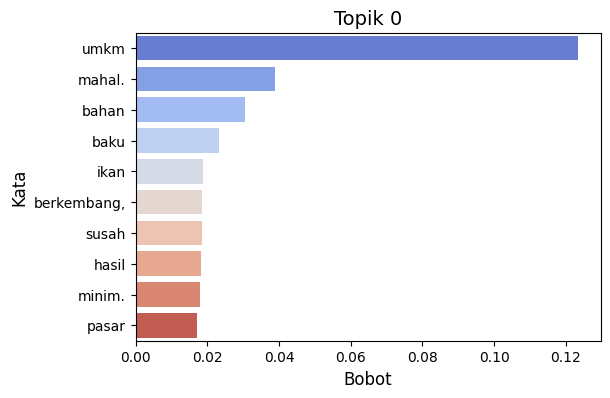

/tmp/ipython-input-3566169377.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='word', data=topic_df, palette="coolwarm")


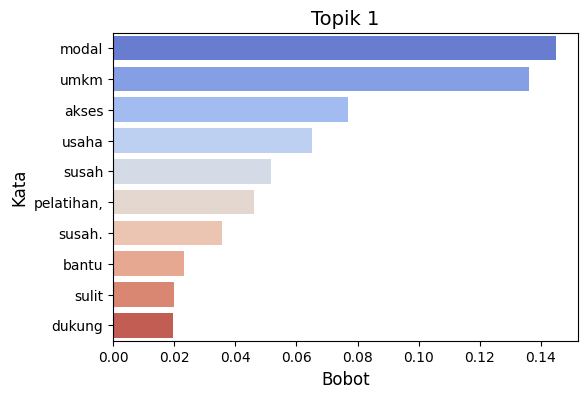

/tmp/ipython-input-3566169377.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='word', data=topic_df, palette="coolwarm")


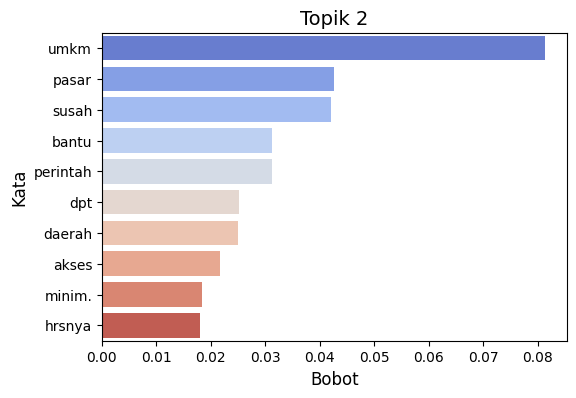

/tmp/ipython-input-3566169377.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='word', data=topic_df, palette="coolwarm")


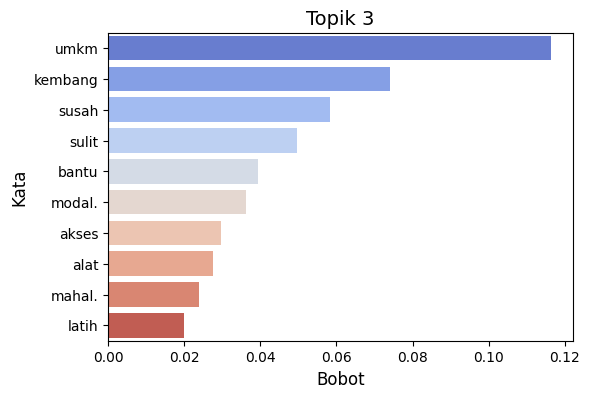

✅ Semua plot sudah disimpan di folder Google Drive: '/content/drive/My Drive/Data Tugas Akhir/LDA/IKM/Gambar'


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
from google.colab import drive

# 1. Mount Google Drive
drive.mount('/content/drive')

# 2. Tentukan folder output di Drive
output_folder = "/content/drive/My Drive/Data Tugas Akhir/LDA/IKM/Gambar"

# 3. Buat folder jika belum ada
os.makedirs(output_folder, exist_ok=True)

# Fungsi untuk membuat barplot dari df
def generate_barplot_from_df(df, topic_num):
    topic_df = df[df['topic_id'] == topic_num].sort_values(by='importance', ascending=False)

    plt.figure(figsize=(6, 4))
    sns.barplot(x='importance', y='word', data=topic_df, palette="coolwarm")
    plt.xlabel("Bobot", fontsize=12)
    plt.ylabel("Kata", fontsize=12)
    plt.title(f"Topik {topic_num}", fontsize=14)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    # Simpan gambar ke Google Drive
    filename = os.path.join(output_folder, f"topik_{topic_num}.png")
    plt.savefig(filename, bbox_inches='tight', dpi=300)
    plt.show()
    plt.close()

# Generate dan simpan semua topik
for topic_num in range(best_topics):
    generate_barplot_from_df(df, topic_num)

print(f"✅ Semua plot sudah disimpan di folder Google Drive: '{output_folder}'")

#LDA Pariwisata

In [ ]:
import pandas as pd

df = pd.read_csv('wisata_negatif.csv')

In [ ]:
df = df.drop_duplicates(subset='pertanyaan7')

In [ ]:
import re
import pandas as pd
def clean_ig_data(textt):

    textt = re.sub(r'\.{2,}', ' ', textt)
    textt = re.sub(r'\,{2,}', ' ', textt)
    textt = re.sub(r'"', ' ', textt)
    textt = re.sub(r'[^A-Za-z0-9\s,]', '', textt)
    textt = re.sub(r'\s+', ' ', textt).strip()

    return textt

df['cleaning'] = df['pertanyaan7'].apply(clean_ig_data)

In [ ]:
df['case_folding'] = df['pertanyaan7'].str.lower()

In [ ]:
import pandas as pd

def load_kamus_normalisasi(file_path):
    kamus = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            if '=' in line:
                tidak_baku, baku = line.strip().split('=')
                kamus[tidak_baku.lower()] = baku.lower()
    return kamus

def normalisasi_teks(teks, kamus):
    if pd.isnull(teks):
        return ''
    kata_kata = teks.split()
    hasil = [kamus.get(k.lower(), k) for k in kata_kata]
    return ' '.join(hasil)

kamus = load_kamus_normalisasi('kamus_norm.txt')

df['normalize'] = df['case_folding'].apply(lambda x: normalisasi_teks(x, kamus))

In [ ]:
df['tokenize'] = df['normalize'].apply(lambda x: x.split())

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_word = stopwords.words('indonesian')

def remove_stopwords(text):
    return [word for word in text if word not in stop_word]

df['stopword_removal'] = df['tokenize'].apply(lambda x: remove_stopwords(x))
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,pertanyaan7,cleaning,case_folding,normalize,tokenize,stopword_removal
0,"Wisata makin rame, tp kesadaran lingkungan msh...","Wisata makin rame, tp kesadaran lingkungan msh...","wisata makin rame, tp kesadaran lingkungan msh...","wisata makin rame, tapi kesadaran lingkungan m...","[wisata, makin, rame,, tapi, kesadaran, lingku...","[wisata, rame,, kesadaran, lingkungan, rendah.]"
1,Akses wisata sulit ditempuh.,Akses wisata sulit ditempuh,akses wisata sulit ditempuh.,akses wisata sulit ditempuh.,"[akses, wisata, sulit, ditempuh.]","[akses, wisata, sulit, ditempuh.]"
2,Wisata bagus tp jalan menuju lokasi rusak.,Wisata bagus tp jalan menuju lokasi rusak,wisata bagus tp jalan menuju lokasi rusak.,wisata bagus tapi jalan menuju lokasi rusak.,"[wisata, bagus, tapi, jalan, menuju, lokasi, r...","[wisata, bagus, jalan, lokasi, rusak.]"
3,"Tempat wisata alam uda dibuka, tapi fasilitas ...","Tempat wisata alam uda dibuka, tapi fasilitas ...","tempat wisata alam uda dibuka, tapi fasilitas ...","tempat wisata alam uda dibuka, tapi fasilitas ...","[tempat, wisata, alam, uda, dibuka,, tapi, fas...","[wisata, alam, uda, dibuka,, fasilitas, minim.]"
4,"Wisata edukasi peternakan uda ada, tapi jalann...","Wisata edukasi peternakan uda ada, tapi jalann...","wisata edukasi peternakan uda ada, tapi jalann...","wisata edukasi peternakan uda ada, tapi jalann...","[wisata, edukasi, peternakan, uda, ada,, tapi,...","[wisata, edukasi, peternakan, uda, ada,, jalan..."
...,...,...,...,...,...,...
394,"Pariwisata pesisir bagus, tp promosi minim","Pariwisata pesisir bagus, tp promosi minim","pariwisata pesisir bagus, tp promosi minim","pariwisata pesisir bagus, tapi promosi minim","[pariwisata, pesisir, bagus,, tapi, promosi, m...","[pariwisata, pesisir, bagus,, promosi, minim]"
395,"Wisata di Berau makin menarik, tp edukasi ke p...","Wisata di Berau makin menarik, tp edukasi ke p...","wisata di berau makin menarik, tp edukasi ke p...","wisata di berau makin menarik, tapi edukasi ke...","[wisata, di, berau, makin, menarik,, tapi, edu...","[wisata, berau, menarik,, edukasi, pengunjung,..."
396,"Pariwisata bagus, tapi akses pesisir rusak.","Pariwisata bagus, tapi akses pesisir rusak","pariwisata bagus, tapi akses pesisir rusak.","pariwisata bagus, tapi akses pesisir rusak.","[pariwisata, bagus,, tapi, akses, pesisir, rus...","[pariwisata, bagus,, akses, pesisir, rusak.]"
397,"Sawah bisa jadi agrowisata, tp akses jalan jel...","Sawah bisa jadi agrowisata, tp akses jalan jel...","sawah bisa jadi agrowisata, tp akses jalan jel...","sawah bisa jadi agrowisata, tapi akses jalan j...","[sawah, bisa, jadi, agrowisata,, tapi, akses, ...","[sawah, agrowisata,, akses, jalan, jelek., dib..."


In [ ]:
!pip install simplemma

import pandas as pd
import simplemma

# Contoh DataFrame (asumsi sudah ada)
# df = pd.DataFrame({'stopword_removal': [...]})

def lemmatization(text_list):
    """
    Fungsi untuk melakukan lemmatisasi pada teks.
    Fungsi ini akan memproses kata-kata per individu.
    """
    if not isinstance(text_list, list):
        # Handle cases where input might not be a list (e.g., NaN after dropna earlier)
        return ''

    # Melakukan lemmatisasi pada setiap token dalam list
    # Menggunakan 'lang='id'' untuk bahasa Indonesia
    lemmatized_tokens = [simplemma.lemmatize(word, lang='id') for word in text_list]

    # Menggabungkan kembali token-token yang sudah dilemmatisasi menjadi string
    return ' '.join(lemmatized_tokens)

# Terapkan fungsi lemmatisasi ke kolom 'stopword_removal'
df['lemmatization'] = df['stopword_removal'].apply(lemmatization)
df

,pertanyaan7,cleaning,case_folding,normalize,tokenize,stopword_removal,lemmatization
0,"Wisata makin rame, tp kesadaran lingkungan msh...","Wisata makin rame, tp kesadaran lingkungan msh...","wisata makin rame, tp kesadaran lingkungan msh...","wisata makin rame, tapi kesadaran lingkungan m...","[wisata, makin, rame,, tapi, kesadaran, lingku...","[wisata, rame,, kesadaran, lingkungan, rendah.]","wisata rame, sadar lingkung rendah."
1,Akses wisata sulit ditempuh.,Akses wisata sulit ditempuh,akses wisata sulit ditempuh.,akses wisata sulit ditempuh.,"[akses, wisata, sulit, ditempuh.]","[akses, wisata, sulit, ditempuh.]",akses wisata sulit ditempuh.
2,Wisata bagus tp jalan menuju lokasi rusak.,Wisata bagus tp jalan menuju lokasi rusak,wisata bagus tp jalan menuju lokasi rusak.,wisata bagus tapi jalan menuju lokasi rusak.,"[wisata, bagus, tapi, jalan, menuju, lokasi, r...","[wisata, bagus, jalan, lokasi, rusak.]",wisata bagus jalan lokasi rusak.
3,"Tempat wisata alam uda dibuka, tapi fasilitas ...","Tempat wisata alam uda dibuka, tapi fasilitas ...","tempat wisata alam uda dibuka, tapi fasilitas ...","tempat wisata alam uda dibuka, tapi fasilitas ...","[tempat, wisata, alam, uda, dibuka,, tapi, fas...","[wisata, alam, uda, dibuka,, fasilitas, minim.]","wisata alam uda dibuka, fasilitas minim."
4,"Wisata edukasi peternakan uda ada, tapi jalann...","Wisata edukasi peternakan uda ada, tapi jalann...","wisata edukasi peternakan uda ada, tapi jalann...","wisata edukasi peternakan uda ada, tapi jalann...","[wisata, edukasi, peternakan, uda, ada,, tapi,...","[wisata, edukasi, peternakan, uda, ada,, jalan...","wisata edukasi peternakan uda ada, jalan rusak."
...,...,...,...,...,...,...,...
394,"Pariwisata pesisir bagus, tp promosi minim","Pariwisata pesisir bagus, tp promosi minim","pariwisata pesisir bagus, tp promosi minim","pariwisata pesisir bagus, tapi promosi minim","[pariwisata, pesisir, bagus,, tapi, promosi, m...","[pariwisata, pesisir, bagus,, promosi, minim]","pariwisata pesisir bagus, promosi minim"
395,"Wisata di Berau makin menarik, tp edukasi ke p...","Wisata di Berau makin menarik, tp edukasi ke p...","wisata di berau makin menarik, tp edukasi ke p...","wisata di berau makin menarik, tapi edukasi ke...","[wisata, di, berau, makin, menarik,, tapi, edu...","[wisata, berau, menarik,, edukasi, pengunjung,...","wisata berau menarik, edukasi kunjung sampah m..."
396,"Pariwisata bagus, tapi akses pesisir rusak.","Pariwisata bagus, tapi akses pesisir rusak","pariwisata bagus, tapi akses pesisir rusak.","pariwisata bagus, tapi akses pesisir rusak.","[pariwisata, bagus,, tapi, akses, pesisir, rus...","[pariwisata, bagus,, akses, pesisir, rusak.]","pariwisata bagus, akses pesisir rusak."
397,"Sawah bisa jadi agrowisata, tp akses jalan jel...","Sawah bisa jadi agrowisata, tp akses jalan jel...","sawah bisa jadi agrowisata, tp akses jalan jel...","sawah bisa jadi agrowisata, tapi akses jalan j...","[sawah, bisa, jadi, agrowisata,, tapi, akses, ...","[sawah, agrowisata,, akses, jalan, jelek., dib...","sawah agrowisata, akses jalan jelek. dibenahi."


In [ ]:
df.to_csv('hasil akhir wisata negatif.csv', index=False)
filtered_data = pd.read_csv("hasil akhir wisata negatif.csv")

In [ ]:
if 'lemmatization' not in filtered_data.columns:
    raise ValueError("Kolom 'lemmatization' tidak ditemukan dalam filtered_data.")

data_tokenized = [text.split() for text in filtered_data['lemmatization'] if isinstance(text, str)]

if not data_tokenized:
    raise ValueError("Tidak ada data yang valid untuk diproses.")

dictionary = corpora.Dictionary(data_tokenized)
corpus = [dictionary.doc2bow(text) for text in data_tokenized]

num_words = 10

# Gunakan nilai alpha dan eta yang lebih eksplisit
alpha_value = 0.1  # Nilai alpha yang lebih stabil
beta_value = 0.01  # Nilai eta yang lebih stabil
topic_range = range(1, 5)  # Coba dengan jumlah topik lebih sedikit

best_score = -1
best_topics = None
best_model = None

for num_topics in topic_range:
    lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=50,
                         iterations=1000, alpha=alpha_value, eta=beta_value, random_state=42)

    coherence_model = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary,
                                     texts=data_tokenized, coherence='c_v')
    coherence_score = coherence_model.get_coherence()

    print(f"Jumlah Topik: {num_topics}, Coherence Score: {coherence_score:.4f}")

    if coherence_score > best_score:
        best_score = coherence_score
        best_topics = num_topics
        best_model = lda_model

print(f"\nJumlah Topik Optimal: {best_topics} dengan Coherence Score: {best_score:.4f}")

Jumlah Topik: 1, Coherence Score: 0.2518
Jumlah Topik: 2, Coherence Score: 0.3063
Jumlah Topik: 3, Coherence Score: 0.3165
Jumlah Topik: 4, Coherence Score: 0.3381

Jumlah Topik Optimal: 4 dengan Coherence Score: 0.3381


In [ ]:
topics = best_model.show_topics(num_topics=best_topics, num_words=num_words, formatted=False)
for topic in topics:
    print(f"Topik {topic[0]}:")
    for word, weight in topic[1]:
        print(f"  {word}: {weight:.4f}")
    print("\n")

out = []
for i in range(best_topics):
    topic_words = best_model.show_topic(i, topn=num_words)
    for word, weight in topic_words:
        out.append([word, i, weight])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance'])

print(df.head())

Topik 0:
  wisata: 0.1187
  pariwisata: 0.0476
  akses: 0.0405
  bagus,: 0.0371
  minim.: 0.0359
  alam: 0.0280
  promosi: 0.0254
  fasilitas: 0.0220
  rusak: 0.0201
  minim: 0.0196


Topik 1:
  wisata: 0.0999
  rusak.: 0.0665
  pariwisata: 0.0656
  rusak: 0.0362
  jalan: 0.0357
  lokasi: 0.0334
  lingkung: 0.0321
  biar: 0.0276
  akses: 0.0274
  dikenal,: 0.0240


Topik 2:
  wisata: 0.0865
  &: 0.0398
  susah: 0.0330
  harga: 0.0266
  mahal: 0.0262
  warga: 0.0238
  bagus,: 0.0229
  labu: 0.0209
  cermin: 0.0192
  akses: 0.0189


Topik 3:
  jalan: 0.0658
  wisata: 0.0494
  pariwisata: 0.0421
  akses: 0.0383
  rusak: 0.0381
  jelek.: 0.0163
  dera: 0.0140
  bikin: 0.0134
  perintah: 0.0115
  lingkung: 0.0107


         word  topic_id  importance
0      wisata         0    0.118667
1  pariwisata         0    0.047569
2       akses         0    0.040476
3      bagus,         0    0.037083
4      minim.         0    0.035935


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/tmp/ipython-input-3920466399.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='word', data=topic_df, palette="coolwarm")


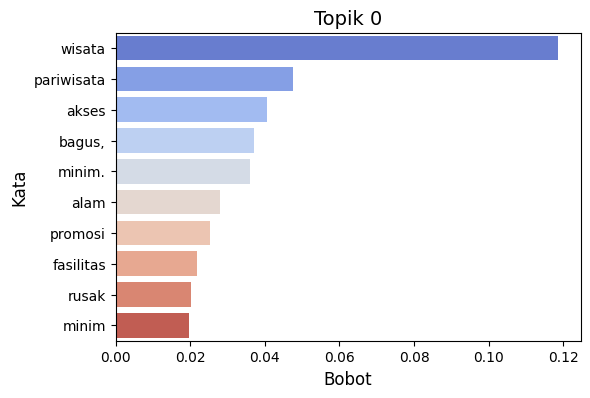

/tmp/ipython-input-3920466399.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='word', data=topic_df, palette="coolwarm")


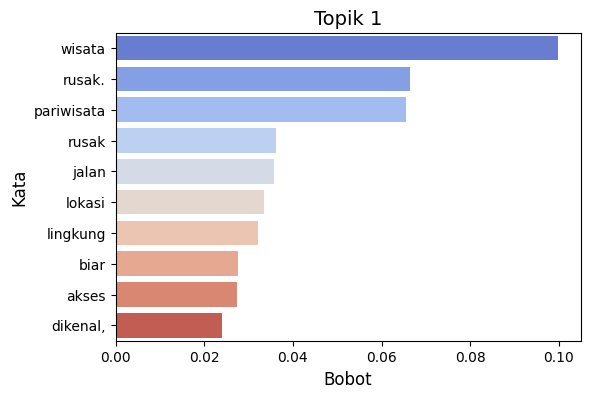

/tmp/ipython-input-3920466399.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='word', data=topic_df, palette="coolwarm")


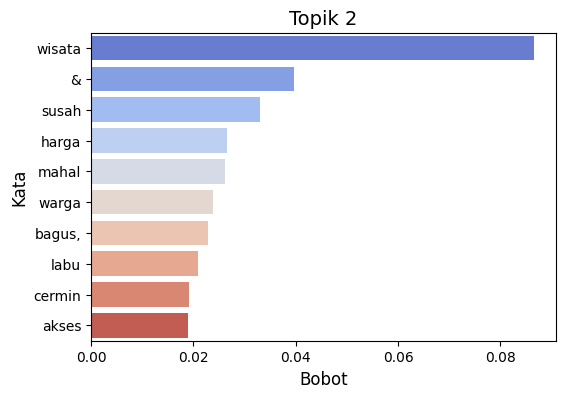

/tmp/ipython-input-3920466399.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='word', data=topic_df, palette="coolwarm")


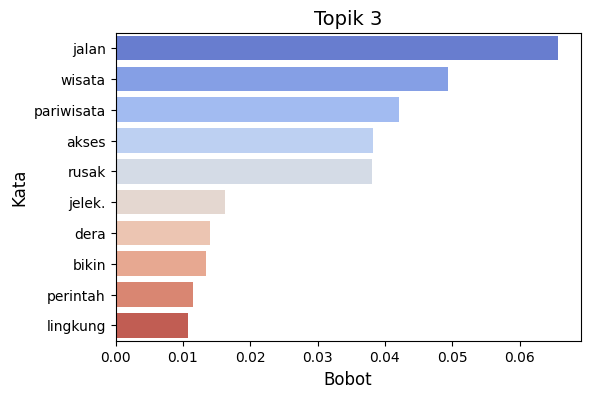

✅ Semua plot sudah disimpan di folder Google Drive: '/content/drive/My Drive/Data Tugas Akhir/LDA/Pariwisata/Gambar'


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
from google.colab import drive

# 1. Mount Google Drive
drive.mount('/content/drive')

# 2. Tentukan folder output di Drive
output_folder = "/content/drive/My Drive/Data Tugas Akhir/LDA/Pariwisata/Gambar"

# 3. Buat folder jika belum ada
os.makedirs(output_folder, exist_ok=True)

# Fungsi untuk membuat barplot dari df
def generate_barplot_from_df(df, topic_num):
    topic_df = df[df['topic_id'] == topic_num].sort_values(by='importance', ascending=False)

    plt.figure(figsize=(6, 4))
    sns.barplot(x='importance', y='word', data=topic_df, palette="coolwarm")
    plt.xlabel("Bobot", fontsize=12)
    plt.ylabel("Kata", fontsize=12)
    plt.title(f"Topik {topic_num}", fontsize=14)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    # Simpan gambar ke Google Drive
    filename = os.path.join(output_folder, f"topik_{topic_num}.png")
    plt.savefig(filename, bbox_inches='tight', dpi=300)
    plt.show()
    plt.close()

# Generate dan simpan semua topik
for topic_num in range(best_topics):
    generate_barplot_from_df(df, topic_num)

print(f"✅ Semua plot sudah disimpan di folder Google Drive: '{output_folder}'")

#LDA Pertanian Perikanan

In [ ]:
import pandas as pd

df = pd.read_csv('pertanian_negatif.csv')

In [ ]:
df = df.drop_duplicates(subset='pertanyaan8')

In [ ]:
import re
import pandas as pd
def clean_ig_data(textt):

    textt = re.sub(r'\.{2,}', ' ', textt)
    textt = re.sub(r'\,{2,}', ' ', textt)
    textt = re.sub(r'"', ' ', textt)
    textt = re.sub(r'[^A-Za-z0-9\s,]', '', textt)
    textt = re.sub(r'\s+', ' ', textt).strip()

    return textt

df['cleaning'] = df['pertanyaan8'].apply(clean_ig_data)

In [ ]:
df['case_folding'] = df['pertanyaan8'].str.lower()

In [ ]:
import pandas as pd

def load_kamus_normalisasi(file_path):
    kamus = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            if '=' in line:
                tidak_baku, baku = line.strip().split('=')
                kamus[tidak_baku.lower()] = baku.lower()
    return kamus

def normalisasi_teks(teks, kamus):
    if pd.isnull(teks):
        return ''
    kata_kata = teks.split()
    hasil = [kamus.get(k.lower(), k) for k in kata_kata]
    return ' '.join(hasil)

kamus = load_kamus_normalisasi('kamus_norm.txt')

df['normalize'] = df['case_folding'].apply(lambda x: normalisasi_teks(x, kamus))

In [ ]:
df['tokenize'] = df['normalize'].apply(lambda x: x.split())

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_word = stopwords.words('indonesian')

def remove_stopwords(text):
    return [word for word in text if word not in stop_word]

df['stopword_removal'] = df['tokenize'].apply(lambda x: remove_stopwords(x))
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,pertanyaan8,cleaning,case_folding,normalize,tokenize,stopword_removal
0,Harga bahan baku kadang mahal.,Harga bahan baku kadang mahal,harga bahan baku kadang mahal.,harga bahan baku kadang mahal.,"[harga, bahan, baku, kadang, mahal.]","[harga, bahan, baku, kadang, mahal.]"
1,Petani msh ngeluh soal bibit & pupuk mahal.,Petani msh ngeluh soal bibit pupuk mahal,petani msh ngeluh soal bibit & pupuk mahal.,petani masih ngeluh soal bibit & pupuk mahal.,"[petani, masih, ngeluh, soal, bibit, &, pupuk,...","[petani, ngeluh, bibit, &, pupuk, mahal.]"
2,"Produksi tani udh ada, tp pemasaran msh susah.","Produksi tani udh ada, tp pemasaran msh susah","produksi tani udh ada, tp pemasaran msh susah.","produksi tani sudah ada, tapi pemasaran masih ...","[produksi, tani, sudah, ada,, tapi, pemasaran,...","[produksi, tani, ada,, pemasaran, susah.]"
3,"Program ternak lele uda diajarin, tapi bibitny...","Program ternak lele uda diajarin, tapi bibitny...","program ternak lele uda diajarin, tapi bibitny...","program ternak lele uda diajarin, tapi bibitny...","[program, ternak, lele, uda, diajarin,, tapi, ...","[program, ternak, lele, uda, diajarin,, bibitn..."
4,"Sektor primer mungkin jauh dr kerjaan sy, tp k...","Sektor primer mungkin jauh dr kerjaan sy, tp k...","sektor primer mungkin jauh dr kerjaan sy, tp k...","sektor primer mungkin jauh dr kerjaan sy, tapi...","[sektor, primer, mungkin, jauh, dr, kerjaan, s...","[sektor, primer, dr, kerjaan, sy,, harga, sayu..."
...,...,...,...,...,...,...
582,"Pertanian bagus, tp sawah sering kekurangan air.","Pertanian bagus, tp sawah sering kekurangan air","pertanian bagus, tp sawah sering kekurangan air.","pertanian bagus, tapi sawah sering kekurangan ...","[pertanian, bagus,, tapi, sawah, sering, kekur...","[pertanian, bagus,, sawah, kekurangan, air.]"
583,"Sektor primer naik, tapi alat panen mahal.","Sektor primer naik, tapi alat panen mahal","sektor primer naik, tapi alat panen mahal.","sektor primer naik, tapi alat panen mahal.","[sektor, primer, naik,, tapi, alat, panen, mah...","[sektor, primer, naik,, alat, panen, mahal.]"
584,"Hasil laut cukup, tp akses pasar msh susah.","Hasil laut cukup, tp akses pasar msh susah","hasil laut cukup, tp akses pasar msh susah.","hasil laut cukup, tapi akses pasar masih susah.","[hasil, laut, cukup,, tapi, akses, pasar, masi...","[hasil, laut, cukup,, akses, pasar, susah.]"
585,"Perikanan sdh dibantu alat tangkap, tp harga j...","Perikanan sdh dibantu alat tangkap, tp harga j...","perikanan sdh dibantu alat tangkap, tp harga j...","perikanan sudah dibantu alat tangkap, tapi har...","[perikanan, sudah, dibantu, alat, tangkap,, ta...","[perikanan, dibantu, alat, tangkap,, harga, ju..."


In [ ]:
!pip install simplemma

import pandas as pd
import simplemma

# Contoh DataFrame (asumsi sudah ada)
# df = pd.DataFrame({'stopword_removal': [...]})

def lemmatization(text_list):
    """
    Fungsi untuk melakukan lemmatisasi pada teks.
    Fungsi ini akan memproses kata-kata per individu.
    """
    if not isinstance(text_list, list):
        # Handle cases where input might not be a list (e.g., NaN after dropna earlier)
        return ''

    # Melakukan lemmatisasi pada setiap token dalam list
    # Menggunakan 'lang='id'' untuk bahasa Indonesia
    lemmatized_tokens = [simplemma.lemmatize(word, lang='id') for word in text_list]

    # Menggabungkan kembali token-token yang sudah dilemmatisasi menjadi string
    return ' '.join(lemmatized_tokens)

# Terapkan fungsi lemmatisasi ke kolom 'stopword_removal'
df['lemmatization'] = df['stopword_removal'].apply(lemmatization)
df

,pertanyaan8,cleaning,case_folding,normalize,tokenize,stopword_removal,lemmatization
0,Harga bahan baku kadang mahal.,Harga bahan baku kadang mahal,harga bahan baku kadang mahal.,harga bahan baku kadang mahal.,"[harga, bahan, baku, kadang, mahal.]","[harga, bahan, baku, kadang, mahal.]",harga bahan baku kadang mahal.
1,Petani msh ngeluh soal bibit & pupuk mahal.,Petani msh ngeluh soal bibit pupuk mahal,petani msh ngeluh soal bibit & pupuk mahal.,petani masih ngeluh soal bibit & pupuk mahal.,"[petani, masih, ngeluh, soal, bibit, &, pupuk,...","[petani, ngeluh, bibit, &, pupuk, mahal.]",petani ngeluh bibit & pupuk mahal.
2,"Produksi tani udh ada, tp pemasaran msh susah.","Produksi tani udh ada, tp pemasaran msh susah","produksi tani udh ada, tp pemasaran msh susah.","produksi tani sudah ada, tapi pemasaran masih ...","[produksi, tani, sudah, ada,, tapi, pemasaran,...","[produksi, tani, ada,, pemasaran, susah.]","produksi tani ada, pasar susah."
3,"Program ternak lele uda diajarin, tapi bibitny...","Program ternak lele uda diajarin, tapi bibitny...","program ternak lele uda diajarin, tapi bibitny...","program ternak lele uda diajarin, tapi bibitny...","[program, ternak, lele, uda, diajarin,, tapi, ...","[program, ternak, lele, uda, diajarin,, bibitn...","program ternak lele uda diajarin, bibit mahal."
4,"Sektor primer mungkin jauh dr kerjaan sy, tp k...","Sektor primer mungkin jauh dr kerjaan sy, tp k...","sektor primer mungkin jauh dr kerjaan sy, tp k...","sektor primer mungkin jauh dr kerjaan sy, tapi...","[sektor, primer, mungkin, jauh, dr, kerjaan, s...","[sektor, primer, dr, kerjaan, sy,, harga, sayu...","sektor primer dr kerja sy, harga sayur ikan pr..."
...,...,...,...,...,...,...,...
582,"Pertanian bagus, tp sawah sering kekurangan air.","Pertanian bagus, tp sawah sering kekurangan air","pertanian bagus, tp sawah sering kekurangan air.","pertanian bagus, tapi sawah sering kekurangan ...","[pertanian, bagus,, tapi, sawah, sering, kekur...","[pertanian, bagus,, sawah, kekurangan, air.]","tani bagus, sawah kurang air."
583,"Sektor primer naik, tapi alat panen mahal.","Sektor primer naik, tapi alat panen mahal","sektor primer naik, tapi alat panen mahal.","sektor primer naik, tapi alat panen mahal.","[sektor, primer, naik,, tapi, alat, panen, mah...","[sektor, primer, naik,, alat, panen, mahal.]","sektor primer naik, alat panen mahal."
584,"Hasil laut cukup, tp akses pasar msh susah.","Hasil laut cukup, tp akses pasar msh susah","hasil laut cukup, tp akses pasar msh susah.","hasil laut cukup, tapi akses pasar masih susah.","[hasil, laut, cukup,, tapi, akses, pasar, masi...","[hasil, laut, cukup,, akses, pasar, susah.]","hasil laut cukup, akses pasar susah."
585,"Perikanan sdh dibantu alat tangkap, tp harga j...","Perikanan sdh dibantu alat tangkap, tp harga j...","perikanan sdh dibantu alat tangkap, tp harga j...","perikanan sudah dibantu alat tangkap, tapi har...","[perikanan, sudah, dibantu, alat, tangkap,, ta...","[perikanan, dibantu, alat, tangkap,, harga, ju...","ikan bantu alat tangkap, harga jual turun."


In [ ]:
df.to_csv('hasil akhir pertanian negatif.csv', index=False)
filtered_data = pd.read_csv("hasil akhir pertanian negatif.csv")

In [ ]:
if 'lemmatization' not in filtered_data.columns:
    raise ValueError("Kolom 'lemmatization' tidak ditemukan dalam filtered_data.")

data_tokenized = [text.split() for text in filtered_data['lemmatization'] if isinstance(text, str)]

if not data_tokenized:
    raise ValueError("Tidak ada data yang valid untuk diproses.")

dictionary = corpora.Dictionary(data_tokenized)
corpus = [dictionary.doc2bow(text) for text in data_tokenized]

num_words = 10

# Gunakan nilai alpha dan eta yang lebih eksplisit
alpha_value = 0.1  # Nilai alpha yang lebih stabil
beta_value = 0.01  # Nilai eta yang lebih stabil
topic_range = range(1, 5)  # Coba dengan jumlah topik lebih sedikit

best_score = -1
best_topics = None
best_model = None

for num_topics in topic_range:
    lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=50,
                         iterations=1000, alpha=alpha_value, eta=beta_value, random_state=42)

    coherence_model = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary,
                                     texts=data_tokenized, coherence='c_v')
    coherence_score = coherence_model.get_coherence()

    print(f"Jumlah Topik: {num_topics}, Coherence Score: {coherence_score:.4f}")

    if coherence_score > best_score:
        best_score = coherence_score
        best_topics = num_topics
        best_model = lda_model

print(f"\nJumlah Topik Optimal: {best_topics} dengan Coherence Score: {best_score:.4f}")

Jumlah Topik: 1, Coherence Score: 0.1816
Jumlah Topik: 2, Coherence Score: 0.2121
Jumlah Topik: 3, Coherence Score: 0.2153
Jumlah Topik: 4, Coherence Score: 0.2377

Jumlah Topik Optimal: 4 dengan Coherence Score: 0.2377


In [ ]:
topics = best_model.show_topics(num_topics=best_topics, num_words=num_words, formatted=False)
for topic in topics:
    print(f"Topik {topic[0]}:")
    for word, weight in topic[1]:
        print(f"  {word}: {weight:.4f}")
    print("\n")

out = []
for i in range(best_topics):
    topic_words = best_model.show_topic(i, topn=num_words)
    for word, weight in topic_words:
        out.append([word, i, weight])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance'])

print(df.head())

Topik 0:
  hasil: 0.0474
  produksi: 0.0436
  harga: 0.0420
  ikan: 0.0357
  primer: 0.0355
  jual: 0.0294
  rendah.: 0.0278
  nelayan: 0.0274
  susah: 0.0263
  tani: 0.0237


Topik 1:
  tani: 0.0636
  produksi: 0.0541
  susah: 0.0431
  pupuk: 0.0413
  ikan: 0.0349
  alat: 0.0328
  bantu: 0.0293
  nelayan: 0.0248
  mahal.: 0.0243
  subsidi: 0.0240


Topik 2:
  tani: 0.0742
  hasil: 0.0573
  petani: 0.0403
  susah: 0.0372
  &: 0.0303
  pupuk: 0.0266
  perintah: 0.0232
  bantu: 0.0207
  distribusi: 0.0206
  ikan: 0.0183


Topik 3:
  produksi: 0.0848
  primer: 0.0837
  sektor: 0.0494
  harga: 0.0433
  tani: 0.0266
  petani: 0.0216
  pupuk: 0.0199
  ikan: 0.0176
  naik,: 0.0173
  pasar: 0.0173


       word  topic_id  importance
0     hasil         0    0.047366
1  produksi         0    0.043588
2     harga         0    0.041994
3      ikan         0    0.035690
4    primer         0    0.035516


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/tmp/ipython-input-1494185965.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='word', data=topic_df, palette="coolwarm")


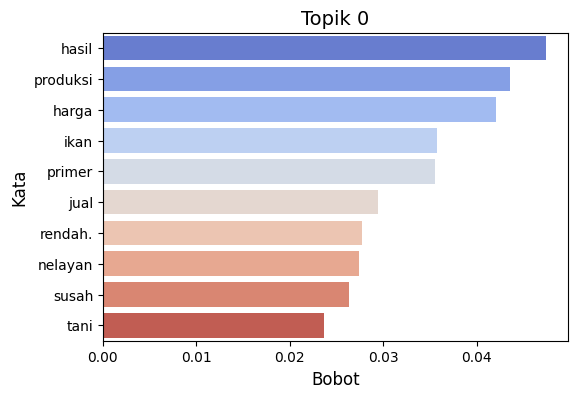

/tmp/ipython-input-1494185965.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='word', data=topic_df, palette="coolwarm")


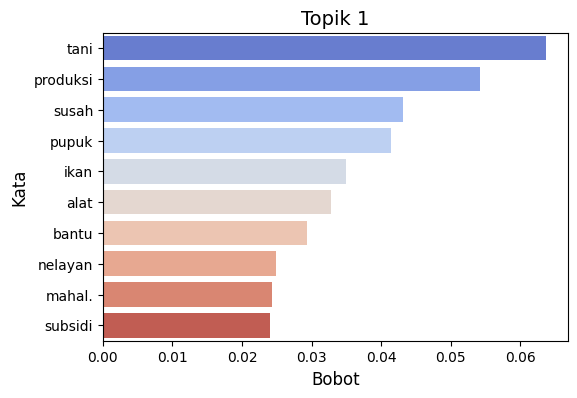

/tmp/ipython-input-1494185965.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='word', data=topic_df, palette="coolwarm")


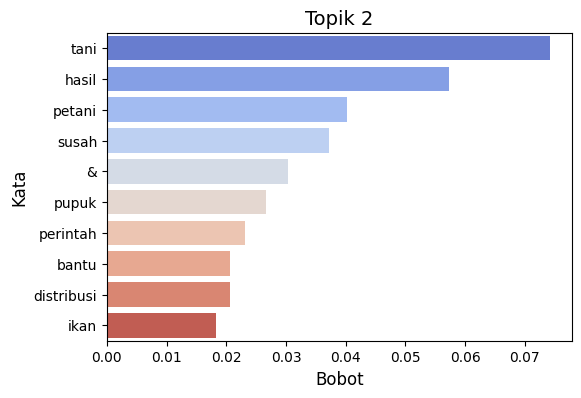

/tmp/ipython-input-1494185965.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='word', data=topic_df, palette="coolwarm")


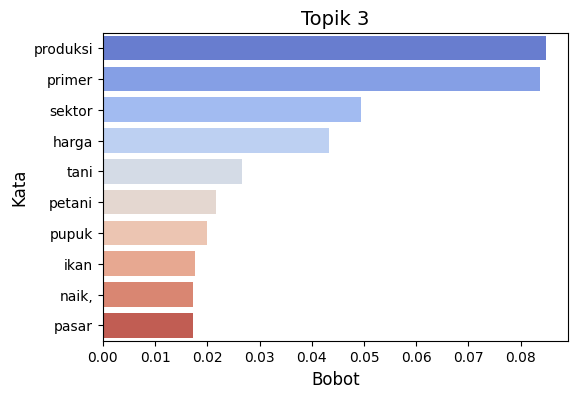

✅ Semua plot sudah disimpan di folder Google Drive: '/content/drive/My Drive/Data Tugas Akhir/LDA/Pertanian dan Perikanan/Gambar'


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
from google.colab import drive

# 1. Mount Google Drive
drive.mount('/content/drive')

# 2. Tentukan folder output di Drive
output_folder = "/content/drive/My Drive/Data Tugas Akhir/LDA/Pertanian dan Perikanan/Gambar"

# 3. Buat folder jika belum ada
os.makedirs(output_folder, exist_ok=True)

# Fungsi untuk membuat barplot dari df
def generate_barplot_from_df(df, topic_num):
    topic_df = df[df['topic_id'] == topic_num].sort_values(by='importance', ascending=False)

    plt.figure(figsize=(6, 4))
    sns.barplot(x='importance', y='word', data=topic_df, palette="coolwarm")
    plt.xlabel("Bobot", fontsize=12)
    plt.ylabel("Kata", fontsize=12)
    plt.title(f"Topik {topic_num}", fontsize=14)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    # Simpan gambar ke Google Drive
    filename = os.path.join(output_folder, f"topik_{topic_num}.png")
    plt.savefig(filename, bbox_inches='tight', dpi=300)
    plt.show()
    plt.close()

# Generate dan simpan semua topik
for topic_num in range(best_topics):
    generate_barplot_from_df(df, topic_num)

print(f"✅ Semua plot sudah disimpan di folder Google Drive: '{output_folder}'")

#LDA Ketananan Pangan

In [ ]:
import pandas as pd

df = pd.read_csv('pangan_negatif.csv')

In [ ]:
df = df.drop_duplicates(subset='pertanyaan9')

In [ ]:
import re
import pandas as pd
def clean_ig_data(textt):

    textt = re.sub(r'\.{2,}', ' ', textt)
    textt = re.sub(r'\,{2,}', ' ', textt)
    textt = re.sub(r'"', ' ', textt)
    textt = re.sub(r'[^A-Za-z0-9\s,]', '', textt)
    textt = re.sub(r'\s+', ' ', textt).strip()

    return textt

df['cleaning'] = df['pertanyaan9'].apply(clean_ig_data)

In [ ]:
df['case_folding'] = df['pertanyaan9'].str.lower()

In [ ]:
import pandas as pd

def load_kamus_normalisasi(file_path):
    kamus = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            if '=' in line:
                tidak_baku, baku = line.strip().split('=')
                kamus[tidak_baku.lower()] = baku.lower()
    return kamus

def normalisasi_teks(teks, kamus):
    if pd.isnull(teks):
        return ''
    kata_kata = teks.split()
    hasil = [kamus.get(k.lower(), k) for k in kata_kata]
    return ' '.join(hasil)

kamus = load_kamus_normalisasi('kamus_norm.txt')

df['normalize'] = df['case_folding'].apply(lambda x: normalisasi_teks(x, kamus))

In [ ]:
df['tokenize'] = df['normalize'].apply(lambda x: x.split())

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_word = stopwords.words('indonesian')

def remove_stopwords(text):
    return [word for word in text if word not in stop_word]

df['stopword_removal'] = df['tokenize'].apply(lambda x: remove_stopwords(x))
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,pertanyaan9,cleaning,case_folding,normalize,tokenize,stopword_removal
0,"Pangan udah stabil skrg, tp masih mahal di tok...","Pangan udah stabil skrg, tp masih mahal di tok...","pangan udah stabil skrg, tp masih mahal di tok...","pangan sudah stabil skrg, tapi masih mahal di ...","[pangan, sudah, stabil, skrg,, tapi, masih, ma...","[pangan, stabil, skrg,, mahal, toko2, kecil.]"
1,"Harga kebutuhan pokok tinggi, apalagi kalau cu...","Harga kebutuhan pokok tinggi, apalagi kalau cu...","harga kebutuhan pokok tinggi, apalagi kalau cu...","harga kebutuhan pokok tinggi, apalagi kalau cu...","[harga, kebutuhan, pokok, tinggi,, apalagi, ka...","[harga, kebutuhan, pokok, tinggi,, cuaca, buru..."
2,Pangan aman tp harga sayur mahal.,Pangan aman tp harga sayur mahal,pangan aman tp harga sayur mahal.,pangan aman tapi harga sayur mahal.,"[pangan, aman, tapi, harga, sayur, mahal.]","[pangan, aman, harga, sayur, mahal.]"
3,"Harga sembako naik turun, susah diprediksi.","Harga sembako naik turun, susah diprediksi","harga sembako naik turun, susah diprediksi.","harga sembako naik turun, susah diprediksi.","[harga, sembako, naik, turun,, susah, dipredik...","[harga, sembako, turun,, susah, diprediksi.]"
4,Pangan sering langka klo cuaca buruk.\n\n,Pangan sering langka klo cuaca buruk,pangan sering langka klo cuaca buruk.\n\n,pangan sering langka kalau cuaca buruk.,"[pangan, sering, langka, kalau, cuaca, buruk.]","[pangan, langka, cuaca, buruk.]"
...,...,...,...,...,...,...
452,Harga bahan pokok di pulau mahal banget. Perlu...,Harga bahan pokok di pulau mahal banget Perlu ...,harga bahan pokok di pulau mahal banget. perlu...,harga bahan pokok di pulau mahal banget. perlu...,"[harga, bahan, pokok, di, pulau, mahal, banget...","[harga, bahan, pokok, pulau, mahal, banget., s..."
453,Bahan pokok mahal saat cuaca buruk.,Bahan pokok mahal saat cuaca buruk,bahan pokok mahal saat cuaca buruk.,bahan pokok mahal saat cuaca buruk.,"[bahan, pokok, mahal, saat, cuaca, buruk.]","[bahan, pokok, mahal, cuaca, buruk.]"
454,"Stok aman, tapi distribusi lambat","Stok aman, tapi distribusi lambat","stok aman, tapi distribusi lambat","stok aman, tapi distribusi lambat","[stok, aman,, tapi, distribusi, lambat]","[stok, aman,, distribusi, lambat]"
455,Ketahanan pangan di pulau msh tergantung dari ...,Ketahanan pangan di pulau msh tergantung dari ...,ketahanan pangan di pulau msh tergantung dari ...,ketahanan pangan di pulau masih tergantung dar...,"[ketahanan, pangan, di, pulau, masih, tergantu...","[ketahanan, pangan, pulau, tergantung, kota., ..."


In [ ]:
!pip install simplemma

import pandas as pd
import simplemma

# Contoh DataFrame (asumsi sudah ada)
# df = pd.DataFrame({'stopword_removal': [...]})

def lemmatization(text_list):
    """
    Fungsi untuk melakukan lemmatisasi pada teks.
    Fungsi ini akan memproses kata-kata per individu.
    """
    if not isinstance(text_list, list):
        # Handle cases where input might not be a list (e.g., NaN after dropna earlier)
        return ''

    # Melakukan lemmatisasi pada setiap token dalam list
    # Menggunakan 'lang='id'' untuk bahasa Indonesia
    lemmatized_tokens = [simplemma.lemmatize(word, lang='id') for word in text_list]

    # Menggabungkan kembali token-token yang sudah dilemmatisasi menjadi string
    return ' '.join(lemmatized_tokens)

# Terapkan fungsi lemmatisasi ke kolom 'stopword_removal'
df['lemmatization'] = df['stopword_removal'].apply(lemmatization)
df

,pertanyaan9,cleaning,case_folding,normalize,tokenize,stopword_removal,lemmatization
0,"Pangan udah stabil skrg, tp masih mahal di tok...","Pangan udah stabil skrg, tp masih mahal di tok...","pangan udah stabil skrg, tp masih mahal di tok...","pangan sudah stabil skrg, tapi masih mahal di ...","[pangan, sudah, stabil, skrg,, tapi, masih, ma...","[pangan, stabil, skrg,, mahal, toko2, kecil.]","pangan stabil skrg, mahal toko2 kecil."
1,"Harga kebutuhan pokok tinggi, apalagi kalau cu...","Harga kebutuhan pokok tinggi, apalagi kalau cu...","harga kebutuhan pokok tinggi, apalagi kalau cu...","harga kebutuhan pokok tinggi, apalagi kalau cu...","[harga, kebutuhan, pokok, tinggi,, apalagi, ka...","[harga, kebutuhan, pokok, tinggi,, cuaca, buru...","harga butuh pokok tinggi, cuaca buruk distribu..."
2,Pangan aman tp harga sayur mahal.,Pangan aman tp harga sayur mahal,pangan aman tp harga sayur mahal.,pangan aman tapi harga sayur mahal.,"[pangan, aman, tapi, harga, sayur, mahal.]","[pangan, aman, harga, sayur, mahal.]",pangan aman harga sayur mahal.
3,"Harga sembako naik turun, susah diprediksi.","Harga sembako naik turun, susah diprediksi","harga sembako naik turun, susah diprediksi.","harga sembako naik turun, susah diprediksi.","[harga, sembako, naik, turun,, susah, dipredik...","[harga, sembako, turun,, susah, diprediksi.]","harga sembako turun, susah diprediksi."
4,Pangan sering langka klo cuaca buruk.\n\n,Pangan sering langka klo cuaca buruk,pangan sering langka klo cuaca buruk.\n\n,pangan sering langka kalau cuaca buruk.,"[pangan, sering, langka, kalau, cuaca, buruk.]","[pangan, langka, cuaca, buruk.]",pangan langka cuaca buruk.
...,...,...,...,...,...,...,...
452,Harga bahan pokok di pulau mahal banget. Perlu...,Harga bahan pokok di pulau mahal banget Perlu ...,harga bahan pokok di pulau mahal banget. perlu...,harga bahan pokok di pulau mahal banget. perlu...,"[harga, bahan, pokok, di, pulau, mahal, banget...","[harga, bahan, pokok, pulau, mahal, banget., s...",harga bahan pokok pulau mahal banget. subsidi ...
453,Bahan pokok mahal saat cuaca buruk.,Bahan pokok mahal saat cuaca buruk,bahan pokok mahal saat cuaca buruk.,bahan pokok mahal saat cuaca buruk.,"[bahan, pokok, mahal, saat, cuaca, buruk.]","[bahan, pokok, mahal, cuaca, buruk.]",bahan pokok mahal cuaca buruk.
454,"Stok aman, tapi distribusi lambat","Stok aman, tapi distribusi lambat","stok aman, tapi distribusi lambat","stok aman, tapi distribusi lambat","[stok, aman,, tapi, distribusi, lambat]","[stok, aman,, distribusi, lambat]","stok aman, distribusi lambat"
455,Ketahanan pangan di pulau msh tergantung dari ...,Ketahanan pangan di pulau msh tergantung dari ...,ketahanan pangan di pulau msh tergantung dari ...,ketahanan pangan di pulau masih tergantung dar...,"[ketahanan, pangan, di, pulau, masih, tergantu...","[ketahanan, pangan, pulau, tergantung, kota., ...",tahan pangan pulau gantung kota. harga butuh p...


In [ ]:
df.to_csv('hasil akhir pangan negatif.csv', index=False)
filtered_data = pd.read_csv("hasil akhir pangan negatif.csv")

In [ ]:
if 'lemmatization' not in filtered_data.columns:
    raise ValueError("Kolom 'lemmatization' tidak ditemukan dalam filtered_data.")

data_tokenized = [text.split() for text in filtered_data['lemmatization'] if isinstance(text, str)]

if not data_tokenized:
    raise ValueError("Tidak ada data yang valid untuk diproses.")

dictionary = corpora.Dictionary(data_tokenized)
corpus = [dictionary.doc2bow(text) for text in data_tokenized]

num_words = 10

# Gunakan nilai alpha dan eta yang lebih eksplisit
alpha_value = 0.1  # Nilai alpha yang lebih stabil
beta_value = 0.01  # Nilai eta yang lebih stabil
topic_range = range(1, 5)  # Coba dengan jumlah topik lebih sedikit

best_score = -1
best_topics = None
best_model = None

for num_topics in topic_range:
    lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=50,
                         iterations=1000, alpha=alpha_value, eta=beta_value, random_state=42)

    coherence_model = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary,
                                     texts=data_tokenized, coherence='c_v')
    coherence_score = coherence_model.get_coherence()

    print(f"Jumlah Topik: {num_topics}, Coherence Score: {coherence_score:.4f}")

    if coherence_score > best_score:
        best_score = coherence_score
        best_topics = num_topics
        best_model = lda_model

print(f"\nJumlah Topik Optimal: {best_topics} dengan Coherence Score: {best_score:.4f}")

Jumlah Topik: 1, Coherence Score: 0.2019
Jumlah Topik: 2, Coherence Score: 0.2548
Jumlah Topik: 3, Coherence Score: 0.2657
Jumlah Topik: 4, Coherence Score: 0.3068

Jumlah Topik Optimal: 4 dengan Coherence Score: 0.3068


In [ ]:
topics = best_model.show_topics(num_topics=best_topics, num_words=num_words, formatted=False)
for topic in topics:
    print(f"Topik {topic[0]}:")
    for word, weight in topic[1]:
        print(f"  {word}: {weight:.4f}")
    print("\n")

out = []
for i in range(best_topics):
    topic_words = best_model.show_topic(i, topn=num_words)
    for word, weight in topic_words:
        out.append([word, i, weight])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance'])

print(df.head())

Topik 0:
  pangan: 0.0807
  harga: 0.0771
  pokok: 0.0649
  bahan: 0.0535
  tahan: 0.0369
  susah: 0.0362
  aman,: 0.0224
  mahal: 0.0223
  mahal.: 0.0214
  sembako: 0.0209


Topik 1:
  pangan: 0.1172
  tahan: 0.0519
  makan: 0.0335
  minim.: 0.0308
  sehat: 0.0293
  lokal: 0.0289
  aman,: 0.0260
  mahal: 0.0230
  sayur: 0.0202
  program: 0.0197


Topik 2:
  harga: 0.0521
  hrsnya: 0.0388
  perintah: 0.0307
  daerah: 0.0269
  subsidi: 0.0260
  mahal.: 0.0207
  mahal: 0.0207
  makan: 0.0178
  susah: 0.0168
  tll: 0.0164


Topik 3:
  pangan: 0.1368
  tahan: 0.0779
  harga: 0.0619
  mahal.: 0.0295
  sayur: 0.0266
  cukup,: 0.0245
  distribusi: 0.0236
  mahal: 0.0233
  turun.: 0.0160
  beras: 0.0160


     word  topic_id  importance
0  pangan         0    0.080701
1   harga         0    0.077058
2   pokok         0    0.064943
3   bahan         0    0.053520
4   tahan         0    0.036860


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/tmp/ipython-input-4203899182.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='word', data=topic_df, palette="coolwarm")


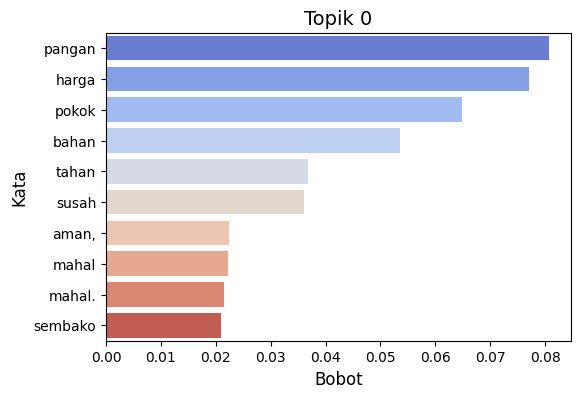

/tmp/ipython-input-4203899182.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='word', data=topic_df, palette="coolwarm")


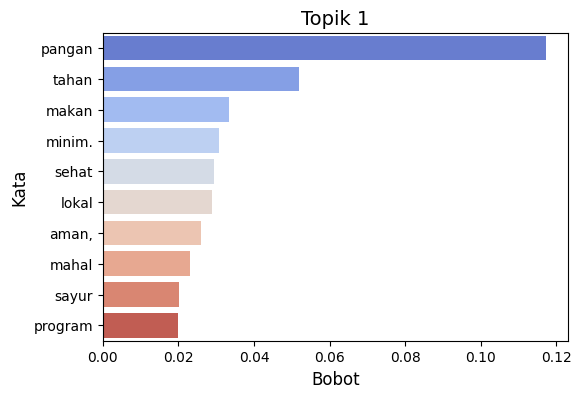

/tmp/ipython-input-4203899182.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='word', data=topic_df, palette="coolwarm")


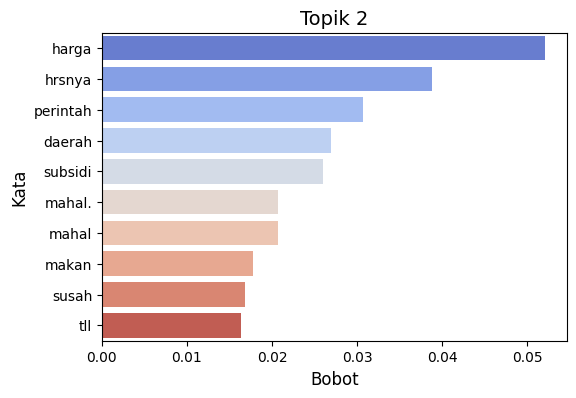

/tmp/ipython-input-4203899182.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='word', data=topic_df, palette="coolwarm")


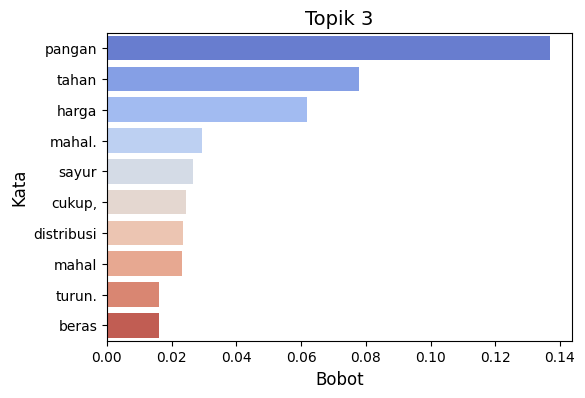

✅ Semua plot sudah disimpan di folder Google Drive: '/content/drive/My Drive/Data Tugas Akhir/LDA/Ketahanan Pangan/Gambar'


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
from google.colab import drive

# 1. Mount Google Drive
drive.mount('/content/drive')

# 2. Tentukan folder output di Drive
output_folder = "/content/drive/My Drive/Data Tugas Akhir/LDA/Ketahanan Pangan/Gambar"

# 3. Buat folder jika belum ada
os.makedirs(output_folder, exist_ok=True)

# Fungsi untuk membuat barplot dari df
def generate_barplot_from_df(df, topic_num):
    topic_df = df[df['topic_id'] == topic_num].sort_values(by='importance', ascending=False)

    plt.figure(figsize=(6, 4))
    sns.barplot(x='importance', y='word', data=topic_df, palette="coolwarm")
    plt.xlabel("Bobot", fontsize=12)
    plt.ylabel("Kata", fontsize=12)
    plt.title(f"Topik {topic_num}", fontsize=14)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    # Simpan gambar ke Google Drive
    filename = os.path.join(output_folder, f"topik_{topic_num}.png")
    plt.savefig(filename, bbox_inches='tight', dpi=300)
    plt.show()
    plt.close()

# Generate dan simpan semua topik
for topic_num in range(best_topics):
    generate_barplot_from_df(df, topic_num)

print(f"✅ Semua plot sudah disimpan di folder Google Drive: '{output_folder}'")

#LDA Infrastruktur

In [ ]:
import pandas as pd

df = pd.read_csv('infra_negatif.csv')

In [ ]:
df = df.drop_duplicates(subset='pertanyaan10')

In [ ]:
import re
import pandas as pd
def clean_ig_data(textt):

    textt = re.sub(r'\.{2,}', ' ', textt)
    textt = re.sub(r'\,{2,}', ' ', textt)
    textt = re.sub(r'"', ' ', textt)
    textt = re.sub(r'[^A-Za-z0-9\s,]', '', textt)
    textt = re.sub(r'\s+', ' ', textt).strip()

    return textt

df['cleaning'] = df['pertanyaan10'].apply(clean_ig_data)

In [ ]:
df['case_folding'] = df['pertanyaan10'].str.lower()

In [ ]:
import pandas as pd

def load_kamus_normalisasi(file_path):
    kamus = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            if '=' in line:
                tidak_baku, baku = line.strip().split('=')
                kamus[tidak_baku.lower()] = baku.lower()
    return kamus

def normalisasi_teks(teks, kamus):
    if pd.isnull(teks):
        return ''
    kata_kata = teks.split()
    hasil = [kamus.get(k.lower(), k) for k in kata_kata]
    return ' '.join(hasil)

kamus = load_kamus_normalisasi('kamus_norm.txt')

df['normalize'] = df['case_folding'].apply(lambda x: normalisasi_teks(x, kamus))

In [ ]:
df['tokenize'] = df['normalize'].apply(lambda x: x.split())

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_word = stopwords.words('indonesian')

def remove_stopwords(text):
    return [word for word in text if word not in stop_word]

df['stopword_removal'] = df['tokenize'].apply(lambda x: remove_stopwords(x))
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,pertanyaan10,cleaning,case_folding,normalize,tokenize,stopword_removal
0,Jalan rusak sering terjadi.,Jalan rusak sering terjadi,jalan rusak sering terjadi.,jalan rusak sering terjadi.,"[jalan, rusak, sering, terjadi.]","[jalan, rusak, terjadi.]"
1,"Infrastruktur udh jalan, tp jln kecil msh bany...","Infrastruktur udh jalan, tp jln kecil msh bany...","infrastruktur udh jalan, tp jln kecil msh bany...","infrastruktur sudah jalan, tapi jln kecil masi...","[infrastruktur, sudah, jalan,, tapi, jln, keci...","[infrastruktur, jalan,, jln, rusak.]"
2,"Jalan kota rapi, tp jalan lingkungan msh rusak.","Jalan kota rapi, tp jalan lingkungan msh rusak","jalan kota rapi, tp jalan lingkungan msh rusak.","jalan kota rapi, tapi jalan lingkungan masih r...","[jalan, kota, rapi,, tapi, jalan, lingkungan, ...","[jalan, kota, rapi,, jalan, lingkungan, rusak.]"
3,"Jalan desa rusak, susah cari kerja ke kota.","Jalan desa rusak, susah cari kerja ke kota","jalan desa rusak, susah cari kerja ke kota.","jalan desa rusak, susah cari kerja ke kota.","[jalan, desa, rusak,, susah, cari, kerja, ke, ...","[jalan, desa, rusak,, susah, cari, kerja, kota.]"
4,"Jalan tanah becek, anak sekolah susah lewat.","Jalan tanah becek, anak sekolah susah lewat","jalan tanah becek, anak sekolah susah lewat.","jalan tanah becek, anak sekolah susah lewat.","[jalan, tanah, becek,, anak, sekolah, susah, l...","[jalan, tanah, becek,, anak, sekolah, susah, l..."
...,...,...,...,...,...,...
560,"Infrastruktur dasar lumayan, tapi jalan kebun ...","Infrastruktur dasar lumayan, tapi jalan kebun ...","infrastruktur dasar lumayan, tapi jalan kebun ...","infrastruktur dasar lumayan, tapi jalan kebun ...","[infrastruktur, dasar, lumayan,, tapi, jalan, ...","[infrastruktur, dasar, lumayan,, jalan, kebun,..."
561,"Infrastruktur jalan banyak rusak, terutama men...","Infrastruktur jalan banyak rusak, terutama men...","infrastruktur jalan banyak rusak, terutama men...","infrastruktur jalan banyak rusak, terutama men...","[infrastruktur, jalan, banyak, rusak,, terutam...","[infrastruktur, jalan, rusak,, kawasan, tamban..."
562,"Dermaga msh seadanya, sulit buat bongkar hasil...","Dermaga msh seadanya, sulit buat bongkar hasil...","dermaga msh seadanya, sulit buat bongkar hasil...","dermaga masih seadanya, sulit buat bongkar has...","[dermaga, masih, seadanya,, sulit, buat, bongk...","[dermaga, seadanya,, sulit, bongkar, hasil, la..."
563,Jalan desa ke pesisir rusak bgt.,Jalan desa ke pesisir rusak bgt,jalan desa ke pesisir rusak bgt.,jalan desa ke pesisir rusak bgt.,"[jalan, desa, ke, pesisir, rusak, bgt.]","[jalan, desa, pesisir, rusak, bgt.]"


In [ ]:
!pip install simplemma

import pandas as pd
import simplemma

# Contoh DataFrame (asumsi sudah ada)
# df = pd.DataFrame({'stopword_removal': [...]})

def lemmatization(text_list):
    """
    Fungsi untuk melakukan lemmatisasi pada teks.
    Fungsi ini akan memproses kata-kata per individu.
    """
    if not isinstance(text_list, list):
        # Handle cases where input might not be a list (e.g., NaN after dropna earlier)
        return ''

    # Melakukan lemmatisasi pada setiap token dalam list
    # Menggunakan 'lang='id'' untuk bahasa Indonesia
    lemmatized_tokens = [simplemma.lemmatize(word, lang='id') for word in text_list]

    # Menggabungkan kembali token-token yang sudah dilemmatisasi menjadi string
    return ' '.join(lemmatized_tokens)

# Terapkan fungsi lemmatisasi ke kolom 'stopword_removal'
df['lemmatization'] = df['stopword_removal'].apply(lemmatization)
df

,pertanyaan10,cleaning,case_folding,normalize,tokenize,stopword_removal,lemmatization
0,Jalan rusak sering terjadi.,Jalan rusak sering terjadi,jalan rusak sering terjadi.,jalan rusak sering terjadi.,"[jalan, rusak, sering, terjadi.]","[jalan, rusak, terjadi.]",jalan rusak terjadi.
1,"Infrastruktur udh jalan, tp jln kecil msh bany...","Infrastruktur udh jalan, tp jln kecil msh bany...","infrastruktur udh jalan, tp jln kecil msh bany...","infrastruktur sudah jalan, tapi jln kecil masi...","[infrastruktur, sudah, jalan,, tapi, jln, keci...","[infrastruktur, jalan,, jln, rusak.]","infrastruktur jalan, jln rusak."
2,"Jalan kota rapi, tp jalan lingkungan msh rusak.","Jalan kota rapi, tp jalan lingkungan msh rusak","jalan kota rapi, tp jalan lingkungan msh rusak.","jalan kota rapi, tapi jalan lingkungan masih r...","[jalan, kota, rapi,, tapi, jalan, lingkungan, ...","[jalan, kota, rapi,, jalan, lingkungan, rusak.]","jalan kota rapi, jalan lingkung rusak."
3,"Jalan desa rusak, susah cari kerja ke kota.","Jalan desa rusak, susah cari kerja ke kota","jalan desa rusak, susah cari kerja ke kota.","jalan desa rusak, susah cari kerja ke kota.","[jalan, desa, rusak,, susah, cari, kerja, ke, ...","[jalan, desa, rusak,, susah, cari, kerja, kota.]","jalan desa rusak, susah cari kerja kota."
4,"Jalan tanah becek, anak sekolah susah lewat.","Jalan tanah becek, anak sekolah susah lewat","jalan tanah becek, anak sekolah susah lewat.","jalan tanah becek, anak sekolah susah lewat.","[jalan, tanah, becek,, anak, sekolah, susah, l...","[jalan, tanah, becek,, anak, sekolah, susah, l...","jalan tanah becek, anak sekolah susah lewat."
...,...,...,...,...,...,...,...
560,"Infrastruktur dasar lumayan, tapi jalan kebun ...","Infrastruktur dasar lumayan, tapi jalan kebun ...","infrastruktur dasar lumayan, tapi jalan kebun ...","infrastruktur dasar lumayan, tapi jalan kebun ...","[infrastruktur, dasar, lumayan,, tapi, jalan, ...","[infrastruktur, dasar, lumayan,, jalan, kebun,...","infrastruktur dasar lumayan, jalan kebun rusak."
561,"Infrastruktur jalan banyak rusak, terutama men...","Infrastruktur jalan banyak rusak, terutama men...","infrastruktur jalan banyak rusak, terutama men...","infrastruktur jalan banyak rusak, terutama men...","[infrastruktur, jalan, banyak, rusak,, terutam...","[infrastruktur, jalan, rusak,, kawasan, tamban...","infrastruktur jalan rusak, kawasan tambang rak..."
562,"Dermaga msh seadanya, sulit buat bongkar hasil...","Dermaga msh seadanya, sulit buat bongkar hasil...","dermaga msh seadanya, sulit buat bongkar hasil...","dermaga masih seadanya, sulit buat bongkar has...","[dermaga, masih, seadanya,, sulit, buat, bongk...","[dermaga, seadanya,, sulit, bongkar, hasil, la...","dermaga seadanya, sulit bongkar hasil laut."
563,Jalan desa ke pesisir rusak bgt.,Jalan desa ke pesisir rusak bgt,jalan desa ke pesisir rusak bgt.,jalan desa ke pesisir rusak bgt.,"[jalan, desa, ke, pesisir, rusak, bgt.]","[jalan, desa, pesisir, rusak, bgt.]",jalan desa pesisir rusak bgt.


In [ ]:
df.to_csv('hasil akhir infra negatif.csv', index=False)
filtered_data = pd.read_csv("hasil akhir infra negatif.csv")

In [ ]:
if 'lemmatization' not in filtered_data.columns:
    raise ValueError("Kolom 'lemmatization' tidak ditemukan dalam filtered_data.")

data_tokenized = [text.split() for text in filtered_data['lemmatization'] if isinstance(text, str)]

if not data_tokenized:
    raise ValueError("Tidak ada data yang valid untuk diproses.")

dictionary = corpora.Dictionary(data_tokenized)
corpus = [dictionary.doc2bow(text) for text in data_tokenized]

num_words = 10

# Gunakan nilai alpha dan eta yang lebih eksplisit
alpha_value = 0.1  # Nilai alpha yang lebih stabil
beta_value = 0.01  # Nilai eta yang lebih stabil
topic_range = range(1, 5)  # Coba dengan jumlah topik lebih sedikit

best_score = -1
best_topics = None
best_model = None

for num_topics in topic_range:
    lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=50,
                         iterations=1000, alpha=alpha_value, eta=beta_value, random_state=42)

    coherence_model = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary,
                                     texts=data_tokenized, coherence='c_v')
    coherence_score = coherence_model.get_coherence()

    print(f"Jumlah Topik: {num_topics}, Coherence Score: {coherence_score:.4f}")

    if coherence_score > best_score:
        best_score = coherence_score
        best_topics = num_topics
        best_model = lda_model

print(f"\nJumlah Topik Optimal: {best_topics} dengan Coherence Score: {best_score:.4f}")

Jumlah Topik: 1, Coherence Score: 0.2088
Jumlah Topik: 2, Coherence Score: 0.3258
Jumlah Topik: 3, Coherence Score: 0.3198
Jumlah Topik: 4, Coherence Score: 0.3101

Jumlah Topik Optimal: 2 dengan Coherence Score: 0.3258


In [ ]:
topics = best_model.show_topics(num_topics=best_topics, num_words=num_words, formatted=False)
for topic in topics:
    print(f"Topik {topic[0]}:")
    for word, weight in topic[1]:
        print(f"  {word}: {weight:.4f}")
    print("\n")

out = []
for i in range(best_topics):
    topic_words = best_model.show_topic(i, topn=num_words)
    for word, weight in topic_words:
        out.append([word, i, weight])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance'])

print(df.head())

Topik 0:
  jalan: 0.1286
  rusak.: 0.0884
  infrastruktur: 0.0479
  bagus,: 0.0417
  utama: 0.0284
  kota: 0.0278
  dasar: 0.0221
  rusak: 0.0187
  air: 0.0179
  kampung: 0.0167


Topik 1:
  jalan: 0.1119
  rusak: 0.0677
  infrastruktur: 0.0351
  susah: 0.0299
  rusak,: 0.0237
  desa: 0.0179
  hujan.: 0.0175
  air: 0.0158
  kampung: 0.0152
  listrik: 0.0143


            word  topic_id  importance
0          jalan         0    0.128590
1         rusak.         0    0.088419
2  infrastruktur         0    0.047939
3         bagus,         0    0.041697
4          utama         0    0.028401


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/tmp/ipython-input-1792652299.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='word', data=topic_df, palette="coolwarm")


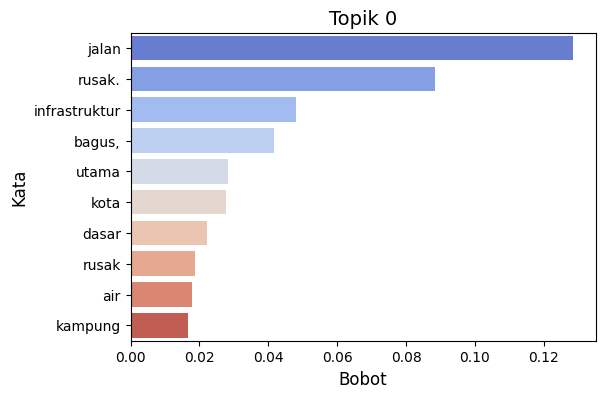

/tmp/ipython-input-1792652299.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='word', data=topic_df, palette="coolwarm")


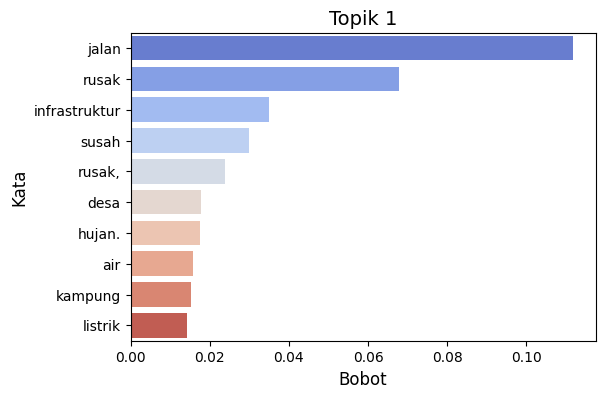

✅ Semua plot sudah disimpan di folder Google Drive: '/content/drive/My Drive/Data Tugas Akhir/LDA/Infrastruktur/Gambar'


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
from google.colab import drive

# 1. Mount Google Drive
drive.mount('/content/drive')

# 2. Tentukan folder output di Drive
output_folder = "/content/drive/My Drive/Data Tugas Akhir/LDA/Infrastruktur/Gambar"

# 3. Buat folder jika belum ada
os.makedirs(output_folder, exist_ok=True)

# Fungsi untuk membuat barplot dari df
def generate_barplot_from_df(df, topic_num):
    topic_df = df[df['topic_id'] == topic_num].sort_values(by='importance', ascending=False)

    plt.figure(figsize=(6, 4))
    sns.barplot(x='importance', y='word', data=topic_df, palette="coolwarm")
    plt.xlabel("Bobot", fontsize=12)
    plt.ylabel("Kata", fontsize=12)
    plt.title(f"Topik {topic_num}", fontsize=14)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    # Simpan gambar ke Google Drive
    filename = os.path.join(output_folder, f"topik_{topic_num}.png")
    plt.savefig(filename, bbox_inches='tight', dpi=300)
    plt.show()
    plt.close()

# Generate dan simpan semua topik
for topic_num in range(best_topics):
    generate_barplot_from_df(df, topic_num)

print(f"✅ Semua plot sudah disimpan di folder Google Drive: '{output_folder}'")

#LDA Konektivitas

In [ ]:
import pandas as pd

df = pd.read_csv('konektivitas_negatif.csv')

In [ ]:
df = df.drop_duplicates(subset='pertanyaan11')

In [ ]:
import re
import pandas as pd
def clean_ig_data(textt):

    textt = re.sub(r'\.{2,}', ' ', textt)
    textt = re.sub(r'\,{2,}', ' ', textt)
    textt = re.sub(r'"', ' ', textt)
    textt = re.sub(r'[^A-Za-z0-9\s,]', '', textt)
    textt = re.sub(r'\s+', ' ', textt).strip()

    return textt

df['cleaning'] = df['pertanyaan11'].apply(clean_ig_data)

In [ ]:
df['case_folding'] = df['pertanyaan11'].str.lower()

In [ ]:
import pandas as pd

def load_kamus_normalisasi(file_path):
    kamus = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            if '=' in line:
                tidak_baku, baku = line.strip().split('=')
                kamus[tidak_baku.lower()] = baku.lower()
    return kamus

def normalisasi_teks(teks, kamus):
    if pd.isnull(teks):
        return ''
    kata_kata = teks.split()
    hasil = [kamus.get(k.lower(), k) for k in kata_kata]
    return ' '.join(hasil)

kamus = load_kamus_normalisasi('kamus_norm.txt')

df['normalize'] = df['case_folding'].apply(lambda x: normalisasi_teks(x, kamus))

In [ ]:
df['tokenize'] = df['normalize'].apply(lambda x: x.split())

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_word = stopwords.words('indonesian')

def remove_stopwords(text):
    return [word for word in text if word not in stop_word]

df['stopword_removal'] = df['tokenize'].apply(lambda x: remove_stopwords(x))
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,pertanyaan11,cleaning,case_folding,normalize,tokenize,stopword_removal
0,"Mobilitas makin gampang, tp transportasi msh m...","Mobilitas makin gampang, tp transportasi msh m...","mobilitas makin gampang, tp transportasi msh m...","mobilitas makin gampang, tapi transportasi mas...","[mobilitas, makin, gampang,, tapi, transportas...","[mobilitas, gampang,, transportasi, mahal.]"
1,Akses antar sekolah dan pemukiman msh minim.,Akses antar sekolah dan pemukiman msh minim,akses antar sekolah dan pemukiman msh minim.,akses antar sekolah dan pemukiman masih minim.,"[akses, antar, sekolah, dan, pemukiman, masih,...","[akses, sekolah, pemukiman, minim.]"
2,Transportasi antarkecamatan gak terjadwal deng...,Transportasi antarkecamatan gak terjadwal deng...,transportasi antarkecamatan gak terjadwal deng...,transportasi antarkecamatan tidak terjadwal de...,"[transportasi, antarkecamatan, tidak, terjadwa...","[transportasi, antarkecamatan, terjadwal, past..."
3,Jalur antar wilayah msh sulit dilewati saat hu...,Jalur antar wilayah msh sulit dilewati saat hujan,jalur antar wilayah msh sulit dilewati saat hu...,jalur antar wilayah masih sulit dilewati saat ...,"[jalur, antar, wilayah, masih, sulit, dilewati...","[jalur, wilayah, sulit, dilewati, hujan.]"
4,Koneksi ke pulau utama sulit kalau cuaca ekstrem,Koneksi ke pulau utama sulit kalau cuaca ekstrem,koneksi ke pulau utama sulit kalau cuaca ekstrem,koneksi ke pulau utama sulit kalau cuaca ekstrem,"[koneksi, ke, pulau, utama, sulit, kalau, cuac...","[koneksi, pulau, utama, sulit, cuaca, ekstrem]"
...,...,...,...,...,...,...
743,"Antar wilayah udah terkoneksi, tp transportasi...","Antar wilayah udah terkoneksi, tp transportasi...","antar wilayah udah terkoneksi, tp transportasi...","antar wilayah sudah terkoneksi, tapi transport...","[antar, wilayah, sudah, terkoneksi,, tapi, tra...","[wilayah, terkoneksi,, transportasi, minim]"
744,Transportasi ke kota jauh & mahal.,Transportasi ke kota jauh mahal,transportasi ke kota jauh & mahal.,transportasi ke kota jauh & mahal.,"[transportasi, ke, kota, jauh, &, mahal.]","[transportasi, kota, &, mahal.]"
745,"Jaringan antar desa lancar, tp kendaraan umum ...","Jaringan antar desa lancar, tp kendaraan umum ...","jaringan antar desa lancar, tp kendaraan umum ...","jaringan antar desa lancar, tapi kendaraan umu...","[jaringan, antar, desa, lancar,, tapi, kendara...","[jaringan, desa, lancar,, kendaraan, susah, di..."
746,Truk pengangkut padi sering mogok di jalan rus...,Truk pengangkut padi sering mogok di jalan rus...,truk pengangkut padi sering mogok di jalan rus...,truk pengangkut padi sering mogok di jalan rus...,"[truk, pengangkut, padi, sering, mogok, di, ja...","[truk, pengangkut, padi, mogok, jalan, rusak.,..."


In [ ]:
!pip install simplemma

import pandas as pd
import simplemma

# Contoh DataFrame (asumsi sudah ada)
# df = pd.DataFrame({'stopword_removal': [...]})

def lemmatization(text_list):
    """
    Fungsi untuk melakukan lemmatisasi pada teks.
    Fungsi ini akan memproses kata-kata per individu.
    """
    if not isinstance(text_list, list):
        # Handle cases where input might not be a list (e.g., NaN after dropna earlier)
        return ''

    # Melakukan lemmatisasi pada setiap token dalam list
    # Menggunakan 'lang='id'' untuk bahasa Indonesia
    lemmatized_tokens = [simplemma.lemmatize(word, lang='id') for word in text_list]

    # Menggabungkan kembali token-token yang sudah dilemmatisasi menjadi string
    return ' '.join(lemmatized_tokens)

# Terapkan fungsi lemmatisasi ke kolom 'stopword_removal'
df['lemmatization'] = df['stopword_removal'].apply(lemmatization)
df

,pertanyaan11,cleaning,case_folding,normalize,tokenize,stopword_removal,lemmatization
0,"Mobilitas makin gampang, tp transportasi msh m...","Mobilitas makin gampang, tp transportasi msh m...","mobilitas makin gampang, tp transportasi msh m...","mobilitas makin gampang, tapi transportasi mas...","[mobilitas, makin, gampang,, tapi, transportas...","[mobilitas, gampang,, transportasi, mahal.]","mobilitas gampang, transportasi mahal."
1,Akses antar sekolah dan pemukiman msh minim.,Akses antar sekolah dan pemukiman msh minim,akses antar sekolah dan pemukiman msh minim.,akses antar sekolah dan pemukiman masih minim.,"[akses, antar, sekolah, dan, pemukiman, masih,...","[akses, sekolah, pemukiman, minim.]",akses sekolah mukim minim.
2,Transportasi antarkecamatan gak terjadwal deng...,Transportasi antarkecamatan gak terjadwal deng...,transportasi antarkecamatan gak terjadwal deng...,transportasi antarkecamatan tidak terjadwal de...,"[transportasi, antarkecamatan, tidak, terjadwa...","[transportasi, antarkecamatan, terjadwal, past...","transportasi antarkecamatan jadwal pasti, susa..."
3,Jalur antar wilayah msh sulit dilewati saat hu...,Jalur antar wilayah msh sulit dilewati saat hujan,jalur antar wilayah msh sulit dilewati saat hu...,jalur antar wilayah masih sulit dilewati saat ...,"[jalur, antar, wilayah, masih, sulit, dilewati...","[jalur, wilayah, sulit, dilewati, hujan.]",jalur wilayah sulit dilewati hujan.
4,Koneksi ke pulau utama sulit kalau cuaca ekstrem,Koneksi ke pulau utama sulit kalau cuaca ekstrem,koneksi ke pulau utama sulit kalau cuaca ekstrem,koneksi ke pulau utama sulit kalau cuaca ekstrem,"[koneksi, ke, pulau, utama, sulit, kalau, cuac...","[koneksi, pulau, utama, sulit, cuaca, ekstrem]",koneksi pulau utama sulit cuaca ekstrem
...,...,...,...,...,...,...,...
743,"Antar wilayah udah terkoneksi, tp transportasi...","Antar wilayah udah terkoneksi, tp transportasi...","antar wilayah udah terkoneksi, tp transportasi...","antar wilayah sudah terkoneksi, tapi transport...","[antar, wilayah, sudah, terkoneksi,, tapi, tra...","[wilayah, terkoneksi,, transportasi, minim]","wilayah terkoneksi, transportasi minim"
744,Transportasi ke kota jauh & mahal.,Transportasi ke kota jauh mahal,transportasi ke kota jauh & mahal.,transportasi ke kota jauh & mahal.,"[transportasi, ke, kota, jauh, &, mahal.]","[transportasi, kota, &, mahal.]",transportasi kota & mahal.
745,"Jaringan antar desa lancar, tp kendaraan umum ...","Jaringan antar desa lancar, tp kendaraan umum ...","jaringan antar desa lancar, tp kendaraan umum ...","jaringan antar desa lancar, tapi kendaraan umu...","[jaringan, antar, desa, lancar,, tapi, kendara...","[jaringan, desa, lancar,, kendaraan, susah, di...","jaring desa lancar, kendara susah ditemuin."
746,Truk pengangkut padi sering mogok di jalan rus...,Truk pengangkut padi sering mogok di jalan rus...,truk pengangkut padi sering mogok di jalan rus...,truk pengangkut padi sering mogok di jalan rus...,"[truk, pengangkut, padi, sering, mogok, di, ja...","[truk, pengangkut, padi, mogok, jalan, rusak.,...",truk angkut padi mogok jalan rusak. jalan hotm...


In [ ]:
df.to_csv('hasil akhir konektivitas negatif.csv', index=False)
filtered_data = pd.read_csv("hasil akhir konektivitas negatif.csv")

In [ ]:
if 'lemmatization' not in filtered_data.columns:
    raise ValueError("Kolom 'lemmatization' tidak ditemukan dalam filtered_data.")

data_tokenized = [text.split() for text in filtered_data['lemmatization'] if isinstance(text, str)]

if not data_tokenized:
    raise ValueError("Tidak ada data yang valid untuk diproses.")

dictionary = corpora.Dictionary(data_tokenized)
corpus = [dictionary.doc2bow(text) for text in data_tokenized]

num_words = 10

# Gunakan nilai alpha dan eta yang lebih eksplisit
alpha_value = 0.1  # Nilai alpha yang lebih stabil
beta_value = 0.01  # Nilai eta yang lebih stabil
topic_range = range(1, 5)  # Coba dengan jumlah topik lebih sedikit

best_score = -1
best_topics = None
best_model = None

for num_topics in topic_range:
    lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=50,
                         iterations=1000, alpha=alpha_value, eta=beta_value, random_state=42)

    coherence_model = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary,
                                     texts=data_tokenized, coherence='c_v')
    coherence_score = coherence_model.get_coherence()

    print(f"Jumlah Topik: {num_topics}, Coherence Score: {coherence_score:.4f}")

    if coherence_score > best_score:
        best_score = coherence_score
        best_topics = num_topics
        best_model = lda_model

print(f"\nJumlah Topik Optimal: {best_topics} dengan Coherence Score: {best_score:.4f}")

Jumlah Topik: 1, Coherence Score: 0.2848
Jumlah Topik: 2, Coherence Score: 0.2892
Jumlah Topik: 3, Coherence Score: 0.2073
Jumlah Topik: 4, Coherence Score: 0.2610

Jumlah Topik Optimal: 2 dengan Coherence Score: 0.2892


In [ ]:
topics = best_model.show_topics(num_topics=best_topics, num_words=num_words, formatted=False)
for topic in topics:
    print(f"Topik {topic[0]}:")
    for word, weight in topic[1]:
        print(f"  {word}: {weight:.4f}")
    print("\n")

out = []
for i in range(best_topics):
    topic_words = best_model.show_topic(i, topn=num_words)
    for word, weight in topic_words:
        out.append([word, i, weight])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance'])

print(df.head())

Topik 0:
  konektivitas: 0.0658
  akses: 0.0563
  transportasi: 0.0491
  wilayah: 0.0294
  susah: 0.0288
  kampung: 0.0243
  minim.: 0.0226
  mahal.: 0.0224
  jalan: 0.0190
  angkut: 0.0190


Topik 1:
  jalan: 0.0633
  susah: 0.0386
  konektivitas: 0.0329
  rusak: 0.0253
  kampung: 0.0238
  transportasi: 0.0207
  &: 0.0192
  hujan.: 0.0168
  camat: 0.0152
  susah,: 0.0143


           word  topic_id  importance
0  konektivitas         0    0.065775
1         akses         0    0.056259
2  transportasi         0    0.049115
3       wilayah         0    0.029428
4         susah         0    0.028784


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/tmp/ipython-input-1022744799.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='word', data=topic_df, palette="coolwarm")


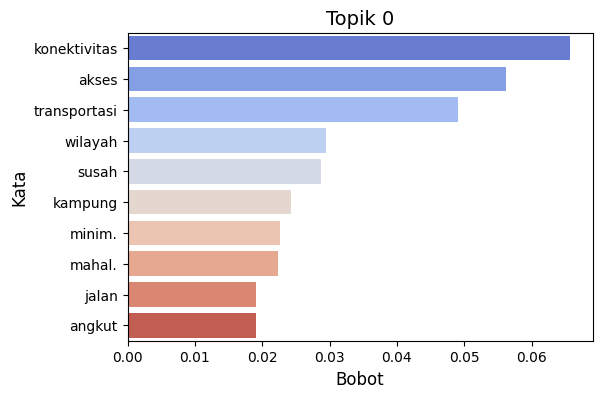

/tmp/ipython-input-1022744799.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='word', data=topic_df, palette="coolwarm")


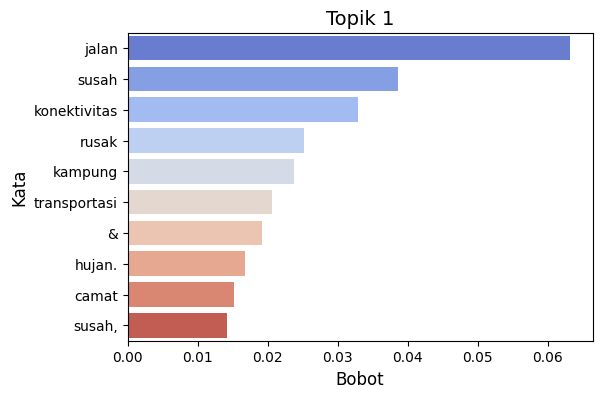

✅ Semua plot sudah disimpan di folder Google Drive: '/content/drive/My Drive/Data Tugas Akhir/LDA/Konektivitas/Gambar'


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
from google.colab import drive

# 1. Mount Google Drive
drive.mount('/content/drive')

# 2. Tentukan folder output di Drive
output_folder = "/content/drive/My Drive/Data Tugas Akhir/LDA/Konektivitas/Gambar"

# 3. Buat folder jika belum ada
os.makedirs(output_folder, exist_ok=True)

# Fungsi untuk membuat barplot dari df
def generate_barplot_from_df(df, topic_num):
    topic_df = df[df['topic_id'] == topic_num].sort_values(by='importance', ascending=False)

    plt.figure(figsize=(6, 4))
    sns.barplot(x='importance', y='word', data=topic_df, palette="coolwarm")
    plt.xlabel("Bobot", fontsize=12)
    plt.ylabel("Kata", fontsize=12)
    plt.title(f"Topik {topic_num}", fontsize=14)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    # Simpan gambar ke Google Drive
    filename = os.path.join(output_folder, f"topik_{topic_num}.png")
    plt.savefig(filename, bbox_inches='tight', dpi=300)
    plt.show()
    plt.close()

# Generate dan simpan semua topik
for topic_num in range(best_topics):
    generate_barplot_from_df(df, topic_num)

print(f"✅ Semua plot sudah disimpan di folder Google Drive: '{output_folder}'")

#LDA Lingkungan

In [ ]:
import pandas as pd

df = pd.read_csv('lingkungan_negatif.csv')

In [ ]:
df = df.drop_duplicates(subset='pertanyaan12')

In [ ]:
import re
import pandas as pd
def clean_ig_data(textt):

    textt = re.sub(r'\.{2,}', ' ', textt)
    textt = re.sub(r'\,{2,}', ' ', textt)
    textt = re.sub(r'"', ' ', textt)
    textt = re.sub(r'[^A-Za-z0-9\s,]', '', textt)
    textt = re.sub(r'\s+', ' ', textt).strip()

    return textt

df['cleaning'] = df['pertanyaan12'].apply(clean_ig_data)

In [ ]:
df['case_folding'] = df['pertanyaan12'].str.lower()

In [ ]:
import pandas as pd

def load_kamus_normalisasi(file_path):
    kamus = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            if '=' in line:
                tidak_baku, baku = line.strip().split('=')
                kamus[tidak_baku.lower()] = baku.lower()
    return kamus

def normalisasi_teks(teks, kamus):
    if pd.isnull(teks):
        return ''
    kata_kata = teks.split()
    hasil = [kamus.get(k.lower(), k) for k in kata_kata]
    return ' '.join(hasil)

kamus = load_kamus_normalisasi('kamus_norm.txt')

df['normalize'] = df['case_folding'].apply(lambda x: normalisasi_teks(x, kamus))

In [ ]:
df['tokenize'] = df['normalize'].apply(lambda x: x.split())

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_word = stopwords.words('indonesian')

def remove_stopwords(text):
    return [word for word in text if word not in stop_word]

df['stopword_removal'] = df['tokenize'].apply(lambda x: remove_stopwords(x))
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,pertanyaan12,cleaning,case_folding,normalize,tokenize,stopword_removal
0,Kualitas lingkungan agak menurun karena aktivi...,Kualitas lingkungan agak menurun karena aktivi...,kualitas lingkungan agak menurun karena aktivi...,kualitas lingkungan agak menurun karena aktivi...,"[kualitas, lingkungan, agak, menurun, karena, ...","[kualitas, lingkungan, menurun, aktivitas, tam..."
1,Lingkungan mulai dipenuhi bangunan tanpa kontr...,Lingkungan mulai dipenuhi bangunan tanpa kontr...,lingkungan mulai dipenuhi bangunan tanpa kontr...,lingkungan mulai dipenuhi bangunan tanpa kontr...,"[lingkungan, mulai, dipenuhi, bangunan, tanpa,...","[lingkungan, dipenuhi, bangunan, kontrol,, bik..."
2,Lingkungan laut makin kotor karena limbah kapa...,Lingkungan laut makin kotor karena limbah kapa...,lingkungan laut makin kotor karena limbah kapa...,lingkungan laut makin kotor karena limbah kapa...,"[lingkungan, laut, makin, kotor, karena, limba...","[lingkungan, laut, kotor, limbah, kapal., regu..."
3,"Polusi udara dan sampah makin berkurang, tp su...","Polusi udara dan sampah makin berkurang, tp su...","polusi udara dan sampah makin berkurang, tp su...","polusi udara dan sampah makin berkurang, tapi ...","[polusi, udara, dan, sampah, makin, berkurang,...","[polusi, udara, sampah, berkurang,, sungai, ko..."
4,Lingkungan kotor krn kurang tempat sampah.,Lingkungan kotor krn kurang tempat sampah,lingkungan kotor krn kurang tempat sampah.,lingkungan kotor karena kurang tempat sampah.,"[lingkungan, kotor, karena, kurang, tempat, sa...","[lingkungan, kotor, sampah.]"
...,...,...,...,...,...,...
343,Lingkungan terumbu karang msh rusak krn turis ...,Lingkungan terumbu karang msh rusak krn turis ...,lingkungan terumbu karang msh rusak krn turis ...,lingkungan terumbu karang masih rusak karena t...,"[lingkungan, terumbu, karang, masih, rusak, ka...","[lingkungan, terumbu, karang, rusak, turis, be..."
344,Lingkungan sekitar rusak krn pembukaan lahan b...,Lingkungan sekitar rusak krn pembukaan lahan b...,lingkungan sekitar rusak krn pembukaan lahan b...,lingkungan sekitar rusak karena pembukaan laha...,"[lingkungan, sekitar, rusak, karena, pembukaan...","[lingkungan, rusak, pembukaan, lahan, besar2an.]"
345,Polusi udara kadang parah pas jam sibuk.,Polusi udara kadang parah pas jam sibuk,polusi udara kadang parah pas jam sibuk.,polusi udara kadang parah pas jam sibuk.,"[polusi, udara, kadang, parah, pas, jam, sibuk.]","[polusi, udara, kadang, parah, pas, jam, sibuk.]"
346,Lahan sawah mulai berkurang krn alih fungsi. H...,Lahan sawah mulai berkurang krn alih fungsi Ha...,lahan sawah mulai berkurang krn alih fungsi. h...,lahan sawah mulai berkurang karena alih fungsi...,"[lahan, sawah, mulai, berkurang, karena, alih,...","[lahan, sawah, berkurang, alih, fungsi., dijag..."


In [ ]:
!pip install simplemma

import pandas as pd
import simplemma

# Contoh DataFrame (asumsi sudah ada)
# df = pd.DataFrame({'stopword_removal': [...]})

def lemmatization(text_list):
    """
    Fungsi untuk melakukan lemmatisasi pada teks.
    Fungsi ini akan memproses kata-kata per individu.
    """
    if not isinstance(text_list, list):
        # Handle cases where input might not be a list (e.g., NaN after dropna earlier)
        return ''

    # Melakukan lemmatisasi pada setiap token dalam list
    # Menggunakan 'lang='id'' untuk bahasa Indonesia
    lemmatized_tokens = [simplemma.lemmatize(word, lang='id') for word in text_list]

    # Menggabungkan kembali token-token yang sudah dilemmatisasi menjadi string
    return ' '.join(lemmatized_tokens)

# Terapkan fungsi lemmatisasi ke kolom 'stopword_removal'
df['lemmatization'] = df['stopword_removal'].apply(lemmatization)
df

,pertanyaan12,cleaning,case_folding,normalize,tokenize,stopword_removal,lemmatization
0,Kualitas lingkungan agak menurun karena aktivi...,Kualitas lingkungan agak menurun karena aktivi...,kualitas lingkungan agak menurun karena aktivi...,kualitas lingkungan agak menurun karena aktivi...,"[kualitas, lingkungan, agak, menurun, karena, ...","[kualitas, lingkungan, menurun, aktivitas, tam...",kualitas lingkung turun aktivitas tambang.
1,Lingkungan mulai dipenuhi bangunan tanpa kontr...,Lingkungan mulai dipenuhi bangunan tanpa kontr...,lingkungan mulai dipenuhi bangunan tanpa kontr...,lingkungan mulai dipenuhi bangunan tanpa kontr...,"[lingkungan, mulai, dipenuhi, bangunan, tanpa,...","[lingkungan, dipenuhi, bangunan, kontrol,, bik...","lingkung dipenuhi bangun kontrol, bikin ruang ..."
2,Lingkungan laut makin kotor karena limbah kapa...,Lingkungan laut makin kotor karena limbah kapa...,lingkungan laut makin kotor karena limbah kapa...,lingkungan laut makin kotor karena limbah kapa...,"[lingkungan, laut, makin, kotor, karena, limba...","[lingkungan, laut, kotor, limbah, kapal., regu...",lingkung laut kotor limbah kapal. regulasi
3,"Polusi udara dan sampah makin berkurang, tp su...","Polusi udara dan sampah makin berkurang, tp su...","polusi udara dan sampah makin berkurang, tp su...","polusi udara dan sampah makin berkurang, tapi ...","[polusi, udara, dan, sampah, makin, berkurang,...","[polusi, udara, sampah, berkurang,, sungai, ko...","polusi udara sampah berkurang, sungai kotor."
4,Lingkungan kotor krn kurang tempat sampah.,Lingkungan kotor krn kurang tempat sampah,lingkungan kotor krn kurang tempat sampah.,lingkungan kotor karena kurang tempat sampah.,"[lingkungan, kotor, karena, kurang, tempat, sa...","[lingkungan, kotor, sampah.]",lingkung kotor sampah.
...,...,...,...,...,...,...,...
343,Lingkungan terumbu karang msh rusak krn turis ...,Lingkungan terumbu karang msh rusak krn turis ...,lingkungan terumbu karang msh rusak krn turis ...,lingkungan terumbu karang masih rusak karena t...,"[lingkungan, terumbu, karang, masih, rusak, ka...","[lingkungan, terumbu, karang, rusak, turis, be...",lingkung terumbu karang rusak turis tanggung j...
344,Lingkungan sekitar rusak krn pembukaan lahan b...,Lingkungan sekitar rusak krn pembukaan lahan b...,lingkungan sekitar rusak krn pembukaan lahan b...,lingkungan sekitar rusak karena pembukaan laha...,"[lingkungan, sekitar, rusak, karena, pembukaan...","[lingkungan, rusak, pembukaan, lahan, besar2an.]",lingkung rusak buka lahan besar2an.
345,Polusi udara kadang parah pas jam sibuk.,Polusi udara kadang parah pas jam sibuk,polusi udara kadang parah pas jam sibuk.,polusi udara kadang parah pas jam sibuk.,"[polusi, udara, kadang, parah, pas, jam, sibuk.]","[polusi, udara, kadang, parah, pas, jam, sibuk.]",polusi udara kadang parah pas jam sibuk.
346,Lahan sawah mulai berkurang krn alih fungsi. H...,Lahan sawah mulai berkurang krn alih fungsi Ha...,lahan sawah mulai berkurang krn alih fungsi. h...,lahan sawah mulai berkurang karena alih fungsi...,"[lahan, sawah, mulai, berkurang, karena, alih,...","[lahan, sawah, berkurang, alih, fungsi., dijag...",lahan sawah kurang alih fungsi. jaga ketat.


In [ ]:
df.to_csv('hasil akhir lingkungan negatif.csv', index=False)
filtered_data = pd.read_csv("hasil akhir lingkungan negatif.csv")

In [ ]:
if 'lemmatization' not in filtered_data.columns:
    raise ValueError("Kolom 'lemmatization' tidak ditemukan dalam filtered_data.")

data_tokenized = [text.split() for text in filtered_data['lemmatization'] if isinstance(text, str)]

if not data_tokenized:
    raise ValueError("Tidak ada data yang valid untuk diproses.")

dictionary = corpora.Dictionary(data_tokenized)
corpus = [dictionary.doc2bow(text) for text in data_tokenized]

num_words = 10

# Gunakan nilai alpha dan eta yang lebih eksplisit
alpha_value = 0.1  # Nilai alpha yang lebih stabil
beta_value = 0.01  # Nilai eta yang lebih stabil
topic_range = range(1, 5)  # Coba dengan jumlah topik lebih sedikit

best_score = -1
best_topics = None
best_model = None

for num_topics in topic_range:
    lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=50,
                         iterations=1000, alpha=alpha_value, eta=beta_value, random_state=42)

    coherence_model = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary,
                                     texts=data_tokenized, coherence='c_v')
    coherence_score = coherence_model.get_coherence()

    print(f"Jumlah Topik: {num_topics}, Coherence Score: {coherence_score:.4f}")

    if coherence_score > best_score:
        best_score = coherence_score
        best_topics = num_topics
        best_model = lda_model

print(f"\nJumlah Topik Optimal: {best_topics} dengan Coherence Score: {best_score:.4f}")

Jumlah Topik: 1, Coherence Score: 0.3549
Jumlah Topik: 2, Coherence Score: 0.3646
Jumlah Topik: 3, Coherence Score: 0.3478
Jumlah Topik: 4, Coherence Score: 0.3763

Jumlah Topik Optimal: 4 dengan Coherence Score: 0.3763


In [ ]:
topics = best_model.show_topics(num_topics=best_topics, num_words=num_words, formatted=False)
for topic in topics:
    print(f"Topik {topic[0]}:")
    for word, weight in topic[1]:
        print(f"  {word}: {weight:.4f}")
    print("\n")

out = []
for i in range(best_topics):
    topic_words = best_model.show_topic(i, topn=num_words)
    for word, weight in topic_words:
        out.append([word, i, weight])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance'])

print(df.head())

Topik 0:
  karang: 0.0553
  lingkung: 0.0527
  terumbu: 0.0477
  rusak: 0.0470
  sampah: 0.0390
  edukasi: 0.0210
  rusak,: 0.0193
  warga: 0.0191
  wisata: 0.0185
  jangkar: 0.0172


Topik 1:
  lingkung: 0.1048
  rusak: 0.0555
  kualitas: 0.0441
  udara: 0.0237
  hutan: 0.0237
  turun: 0.0202
  hidup: 0.0196
  aktivitas: 0.0188
  awas: 0.0181
  sampah: 0.0164


Topik 2:
  lingkung: 0.0741
  kotor: 0.0560
  rusak: 0.0334
  sampah: 0.0291
  sungai: 0.0246
  tambang: 0.0212
  hutan: 0.0172
  rusak,: 0.0159
  bikin: 0.0157
  ikan: 0.0157


Topik 3:
  lingkung: 0.0720
  rusak: 0.0685
  perintah: 0.0465
  tambang: 0.0451
  tindak: 0.0247
  tegas.: 0.0216
  liar,: 0.0177
  &: 0.0159
  akibat: 0.0153
  jaga: 0.0126


       word  topic_id  importance
0    karang         0    0.055289
1  lingkung         0    0.052655
2   terumbu         0    0.047669
3     rusak         0    0.047010
4    sampah         0    0.039012


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/tmp/ipython-input-378930985.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='word', data=topic_df, palette="coolwarm")


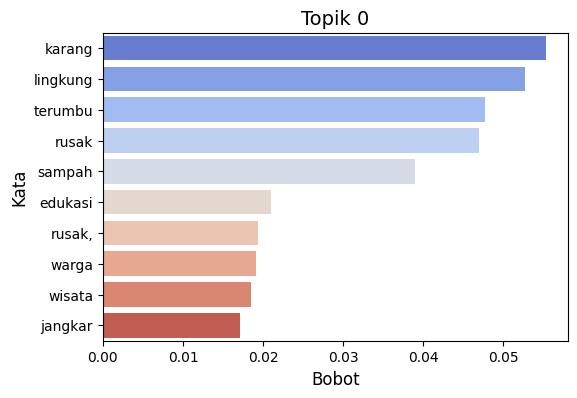

/tmp/ipython-input-378930985.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='word', data=topic_df, palette="coolwarm")


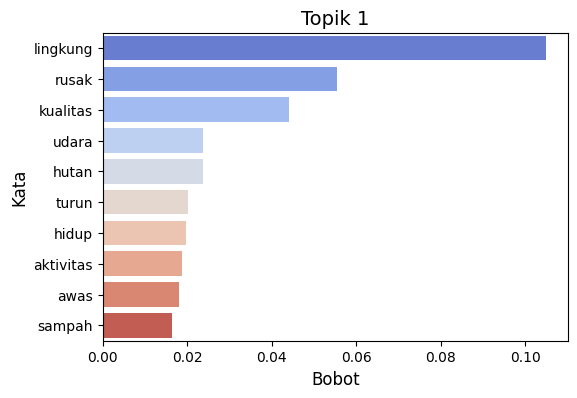

/tmp/ipython-input-378930985.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='word', data=topic_df, palette="coolwarm")


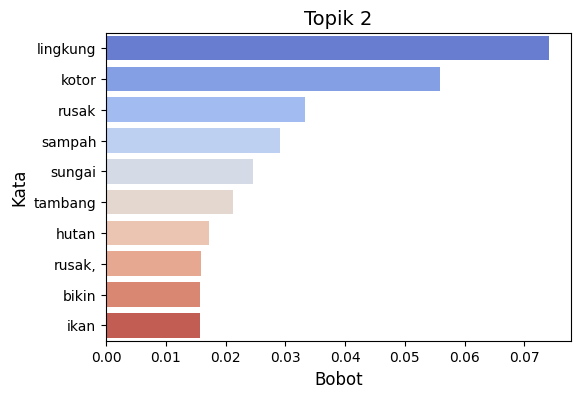

/tmp/ipython-input-378930985.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='word', data=topic_df, palette="coolwarm")


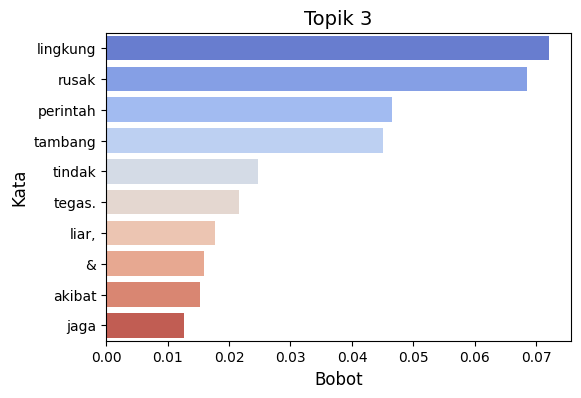

✅ Semua plot sudah disimpan di folder Google Drive: '/content/drive/My Drive/Data Tugas Akhir/LDA/Lingkungan/Gambar'


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
from google.colab import drive

# 1. Mount Google Drive
drive.mount('/content/drive')

# 2. Tentukan folder output di Drive
output_folder = "/content/drive/My Drive/Data Tugas Akhir/LDA/Lingkungan/Gambar"

# 3. Buat folder jika belum ada
os.makedirs(output_folder, exist_ok=True)

# Fungsi untuk membuat barplot dari df
def generate_barplot_from_df(df, topic_num):
    topic_df = df[df['topic_id'] == topic_num].sort_values(by='importance', ascending=False)

    plt.figure(figsize=(6, 4))
    sns.barplot(x='importance', y='word', data=topic_df, palette="coolwarm")
    plt.xlabel("Bobot", fontsize=12)
    plt.ylabel("Kata", fontsize=12)
    plt.title(f"Topik {topic_num}", fontsize=14)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    # Simpan gambar ke Google Drive
    filename = os.path.join(output_folder, f"topik_{topic_num}.png")
    plt.savefig(filename, bbox_inches='tight', dpi=300)
    plt.show()
    plt.close()

# Generate dan simpan semua topik
for topic_num in range(best_topics):
    generate_barplot_from_df(df, topic_num)

print(f"✅ Semua plot sudah disimpan di folder Google Drive: '{output_folder}'")

#LDA Keuangan

In [ ]:
import pandas as pd

df = pd.read_csv('keuangan_negatif.csv')

In [ ]:
df = df.drop_duplicates(subset='pertanyaan13')

In [ ]:
import re
import pandas as pd
def clean_ig_data(textt):

    textt = re.sub(r'\.{2,}', ' ', textt)
    textt = re.sub(r'\,{2,}', ' ', textt)
    textt = re.sub(r'"', ' ', textt)
    textt = re.sub(r'[^A-Za-z0-9\s,]', '', textt)
    textt = re.sub(r'\s+', ' ', textt).strip()

    return textt

df['cleaning'] = df['pertanyaan13'].apply(clean_ig_data)

In [ ]:
df['case_folding'] = df['pertanyaan13'].str.lower()

In [ ]:
import pandas as pd

def load_kamus_normalisasi(file_path):
    kamus = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            if '=' in line:
                tidak_baku, baku = line.strip().split('=')
                kamus[tidak_baku.lower()] = baku.lower()
    return kamus

def normalisasi_teks(teks, kamus):
    if pd.isnull(teks):
        return ''
    kata_kata = teks.split()
    hasil = [kamus.get(k.lower(), k) for k in kata_kata]
    return ' '.join(hasil)

kamus = load_kamus_normalisasi('kamus_norm.txt')

df['normalize'] = df['case_folding'].apply(lambda x: normalisasi_teks(x, kamus))

In [ ]:
df['tokenize'] = df['normalize'].apply(lambda x: x.split())

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_word = stopwords.words('indonesian')

def remove_stopwords(text):
    return [word for word in text if word not in stop_word]

df['stopword_removal'] = df['tokenize'].apply(lambda x: remove_stopwords(x))
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,pertanyaan13,cleaning,case_folding,normalize,tokenize,stopword_removal
0,"Transparansi udah lumayan, tp susah akses info...","Transparansi udah lumayan, tp susah akses info...","transparansi udah lumayan, tp susah akses info...","transparansi sudah lumayan, tapi susah akses i...","[transparansi, sudah, lumayan,, tapi, susah, a...","[transparansi, lumayan,, susah, akses, info, a..."
1,"Dana pemda tdk jelas arahnya, minim laporan.","Dana pemda tdk jelas arahnya, minim laporan","dana pemda tdk jelas arahnya, minim laporan.","dana pemerintah daerah tidak jelas arahnya, mi...","[dana, pemerintah, daerah, tidak, jelas, arahn...","[dana, pemerintah, daerah, arahnya,, minim, la..."
2,Dana pendidikan kadang telat turun.,Dana pendidikan kadang telat turun,dana pendidikan kadang telat turun.,dana pendidikan kadang telat turun.,"[dana, pendidikan, kadang, telat, turun.]","[dana, pendidikan, kadang, telat, turun.]"
3,Akuntabilitas keuangan daerah dan kecamatan ja...,Akuntabilitas keuangan daerah dan kecamatan ja...,akuntabilitas keuangan daerah dan kecamatan ja...,akuntabilitas keuangan daerah dan kecamatan ja...,"[akuntabilitas, keuangan, daerah, dan, kecamat...","[akuntabilitas, keuangan, daerah, kecamatan, j..."
4,Akuntabilitas sudah dibuka ke publik lewat med...,Akuntabilitas sudah dibuka ke publik lewat med...,akuntabilitas sudah dibuka ke publik lewat med...,akuntabilitas sudah dibuka ke publik lewat med...,"[akuntabilitas, sudah, dibuka, ke, publik, lew...","[akuntabilitas, dibuka, publik, media, sosial,..."
...,...,...,...,...,...,...
193,"Akuntabilitas daerah udah ada sistem, tp trans...","Akuntabilitas daerah udah ada sistem, tp trans...","akuntabilitas daerah udah ada sistem, tp trans...","akuntabilitas daerah sudah ada sistem, tapi tr...","[akuntabilitas, daerah, sudah, ada, sistem,, t...","[akuntabilitas, daerah, sistem,, transparansi,..."
194,Akuntabilitas pemerintah cukup baik tapi lapor...,Akuntabilitas pemerintah cukup baik tapi lapor...,akuntabilitas pemerintah cukup baik tapi lapor...,akuntabilitas pemerintah cukup baik tapi lapor...,"[akuntabilitas, pemerintah, cukup, baik, tapi,...","[akuntabilitas, pemerintah, laporan, publik, s..."
195,"Transparansi udah ada, tp pengawasan masyaraka...","Transparansi udah ada, tp pengawasan masyaraka...","transparansi udah ada, tp pengawasan masyaraka...","transparansi sudah ada, tapi pengawasan masyar...","[transparansi, sudah, ada,, tapi, pengawasan, ...","[transparansi, ada,, pengawasan, masyarakat, m..."
196,"Akuntabilitas sulit dipantau warga pedalaman, ...","Akuntabilitas sulit dipantau warga pedalaman, ...","akuntabilitas sulit dipantau warga pedalaman, ...","akuntabilitas sulit dipantau warga pedalaman, ...","[akuntabilitas, sulit, dipantau, warga, pedala...","[akuntabilitas, sulit, dipantau, warga, pedala..."


In [ ]:
!pip install simplemma

import pandas as pd
import simplemma

# Contoh DataFrame (asumsi sudah ada)
# df = pd.DataFrame({'stopword_removal': [...]})

def lemmatization(text_list):
    """
    Fungsi untuk melakukan lemmatisasi pada teks.
    Fungsi ini akan memproses kata-kata per individu.
    """
    if not isinstance(text_list, list):
        # Handle cases where input might not be a list (e.g., NaN after dropna earlier)
        return ''

    # Melakukan lemmatisasi pada setiap token dalam list
    # Menggunakan 'lang='id'' untuk bahasa Indonesia
    lemmatized_tokens = [simplemma.lemmatize(word, lang='id') for word in text_list]

    # Menggabungkan kembali token-token yang sudah dilemmatisasi menjadi string
    return ' '.join(lemmatized_tokens)

# Terapkan fungsi lemmatisasi ke kolom 'stopword_removal'
df['lemmatization'] = df['stopword_removal'].apply(lemmatization)
df

,pertanyaan13,cleaning,case_folding,normalize,tokenize,stopword_removal,lemmatization
0,"Transparansi udah lumayan, tp susah akses info...","Transparansi udah lumayan, tp susah akses info...","transparansi udah lumayan, tp susah akses info...","transparansi sudah lumayan, tapi susah akses i...","[transparansi, sudah, lumayan,, tapi, susah, a...","[transparansi, lumayan,, susah, akses, info, a...","transparansi lumayan, susah akses info anggaran."
1,"Dana pemda tdk jelas arahnya, minim laporan.","Dana pemda tdk jelas arahnya, minim laporan","dana pemda tdk jelas arahnya, minim laporan.","dana pemerintah daerah tidak jelas arahnya, mi...","[dana, pemerintah, daerah, tidak, jelas, arahn...","[dana, pemerintah, daerah, arahnya,, minim, la...","dana perintah daerah arahnya, minim laporan."
2,Dana pendidikan kadang telat turun.,Dana pendidikan kadang telat turun,dana pendidikan kadang telat turun.,dana pendidikan kadang telat turun.,"[dana, pendidikan, kadang, telat, turun.]","[dana, pendidikan, kadang, telat, turun.]",dana didik kadang telat turun.
3,Akuntabilitas keuangan daerah dan kecamatan ja...,Akuntabilitas keuangan daerah dan kecamatan ja...,akuntabilitas keuangan daerah dan kecamatan ja...,akuntabilitas keuangan daerah dan kecamatan ja...,"[akuntabilitas, keuangan, daerah, dan, kecamat...","[akuntabilitas, keuangan, daerah, kecamatan, j...",akuntabilitas uang daerah camat jarang bahas f...
4,Akuntabilitas sudah dibuka ke publik lewat med...,Akuntabilitas sudah dibuka ke publik lewat med...,akuntabilitas sudah dibuka ke publik lewat med...,akuntabilitas sudah dibuka ke publik lewat med...,"[akuntabilitas, sudah, dibuka, ke, publik, lew...","[akuntabilitas, dibuka, publik, media, sosial,...",akuntabilitas buka publik media sosial lapor k...
...,...,...,...,...,...,...,...
193,"Akuntabilitas daerah udah ada sistem, tp trans...","Akuntabilitas daerah udah ada sistem, tp trans...","akuntabilitas daerah udah ada sistem, tp trans...","akuntabilitas daerah sudah ada sistem, tapi tr...","[akuntabilitas, daerah, sudah, ada, sistem,, t...","[akuntabilitas, daerah, sistem,, transparansi,...","akuntabilitas daerah sistem, transparansi real..."
194,Akuntabilitas pemerintah cukup baik tapi lapor...,Akuntabilitas pemerintah cukup baik tapi lapor...,akuntabilitas pemerintah cukup baik tapi lapor...,akuntabilitas pemerintah cukup baik tapi lapor...,"[akuntabilitas, pemerintah, cukup, baik, tapi,...","[akuntabilitas, pemerintah, laporan, publik, s...",akuntabilitas perintah lapor publik sulit dipa...
195,"Transparansi udah ada, tp pengawasan masyaraka...","Transparansi udah ada, tp pengawasan masyaraka...","transparansi udah ada, tp pengawasan masyaraka...","transparansi sudah ada, tapi pengawasan masyar...","[transparansi, sudah, ada,, tapi, pengawasan, ...","[transparansi, ada,, pengawasan, masyarakat, m...","transparansi ada, awas masyarakat minim"
196,"Akuntabilitas sulit dipantau warga pedalaman, ...","Akuntabilitas sulit dipantau warga pedalaman, ...","akuntabilitas sulit dipantau warga pedalaman, ...","akuntabilitas sulit dipantau warga pedalaman, ...","[akuntabilitas, sulit, dipantau, warga, pedala...","[akuntabilitas, sulit, dipantau, warga, pedala...","akuntabilitas sulit pantau warga pedalaman, in..."


In [ ]:
df.to_csv('hasil akhir keuangan negatif.csv', index=False)
filtered_data = pd.read_csv("hasil akhir keuangan negatif.csv")

In [ ]:
if 'lemmatization' not in filtered_data.columns:
    raise ValueError("Kolom 'lemmatization' tidak ditemukan dalam filtered_data.")

data_tokenized = [text.split() for text in filtered_data['lemmatization'] if isinstance(text, str)]

if not data_tokenized:
    raise ValueError("Tidak ada data yang valid untuk diproses.")

dictionary = corpora.Dictionary(data_tokenized)
corpus = [dictionary.doc2bow(text) for text in data_tokenized]

num_words = 10

# Gunakan nilai alpha dan eta yang lebih eksplisit
alpha_value = 0.1  # Nilai alpha yang lebih stabil
beta_value = 0.01  # Nilai eta yang lebih stabil
topic_range = range(1, 5)  # Coba dengan jumlah topik lebih sedikit

best_score = -1
best_topics = None
best_model = None

for num_topics in topic_range:
    lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=50,
                         iterations=1000, alpha=alpha_value, eta=beta_value, random_state=42)

    coherence_model = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary,
                                     texts=data_tokenized, coherence='c_v')
    coherence_score = coherence_model.get_coherence()

    print(f"Jumlah Topik: {num_topics}, Coherence Score: {coherence_score:.4f}")

    if coherence_score > best_score:
        best_score = coherence_score
        best_topics = num_topics
        best_model = lda_model

print(f"\nJumlah Topik Optimal: {best_topics} dengan Coherence Score: {best_score:.4f}")

Jumlah Topik: 1, Coherence Score: 0.2266
Jumlah Topik: 2, Coherence Score: 0.2852
Jumlah Topik: 3, Coherence Score: 0.3199
Jumlah Topik: 4, Coherence Score: 0.3181

Jumlah Topik Optimal: 3 dengan Coherence Score: 0.3199


In [ ]:
topics = best_model.show_topics(num_topics=best_topics, num_words=num_words, formatted=False)
for topic in topics:
    print(f"Topik {topic[0]}:")
    for word, weight in topic[1]:
        print(f"  {word}: {weight:.4f}")
    print("\n")

out = []
for i in range(best_topics):
    topic_words = best_model.show_topic(i, topn=num_words)
    for word, weight in topic_words:
        out.append([word, i, weight])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance'])

print(df.head())

Topik 0:
  warga: 0.0536
  uang: 0.0515
  susah: 0.0475
  akuntabilitas: 0.0454
  transparansi: 0.0398
  lapor: 0.0285
  masyarakat: 0.0279
  info: 0.0270
  akses: 0.0266
  sulit: 0.0255


Topik 1:
  akuntabilitas: 0.0465
  dana: 0.0393
  susah: 0.0338
  minim: 0.0328
  minim.: 0.0328
  transparansi: 0.0295
  transparan,: 0.0295
  publik: 0.0280
  dimengerti: 0.0262
  warga: 0.0239


Topik 2:
  akuntabilitas: 0.0869
  lapor: 0.0645
  sulit: 0.0548
  info: 0.0445
  anggar: 0.0350
  susah: 0.0341
  warga.: 0.0286
  perintah: 0.0254
  dipahami: 0.0247
  diakses.: 0.0219


            word  topic_id  importance
0          warga         0    0.053628
1           uang         0    0.051515
2          susah         0    0.047535
3  akuntabilitas         0    0.045363
4   transparansi         0    0.039841


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/tmp/ipython-input-368753258.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='word', data=topic_df, palette="coolwarm")


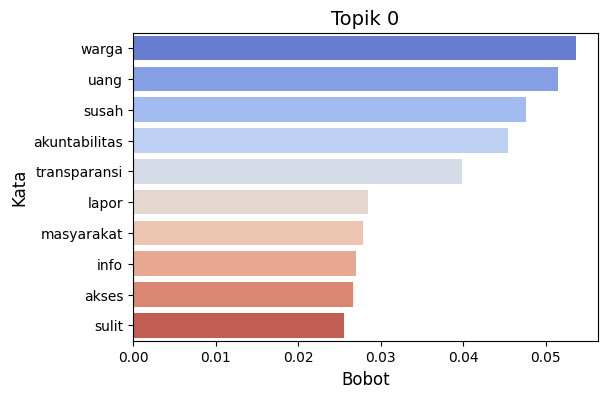

/tmp/ipython-input-368753258.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='word', data=topic_df, palette="coolwarm")


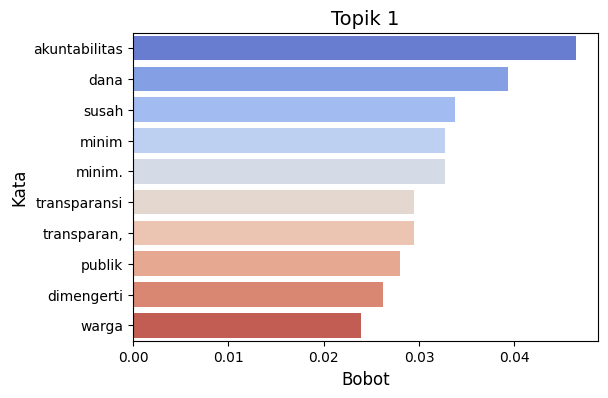

/tmp/ipython-input-368753258.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='word', data=topic_df, palette="coolwarm")


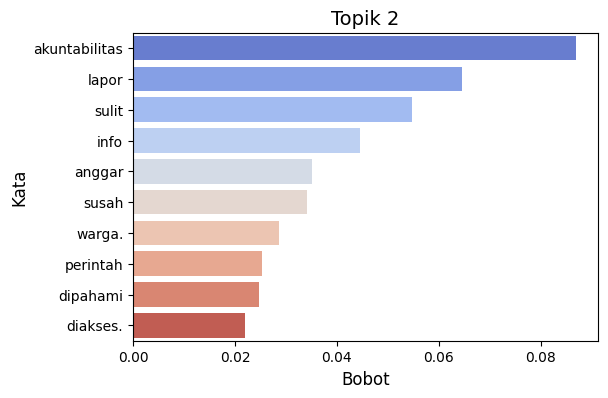

✅ Semua plot sudah disimpan di folder Google Drive: '/content/drive/My Drive/Data Tugas Akhir/LDA/Keuangan/Gambar'


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
from google.colab import drive

# 1. Mount Google Drive
drive.mount('/content/drive')

# 2. Tentukan folder output di Drive
output_folder = "/content/drive/My Drive/Data Tugas Akhir/LDA/Keuangan/Gambar"

# 3. Buat folder jika belum ada
os.makedirs(output_folder, exist_ok=True)

# Fungsi untuk membuat barplot dari df
def generate_barplot_from_df(df, topic_num):
    topic_df = df[df['topic_id'] == topic_num].sort_values(by='importance', ascending=False)

    plt.figure(figsize=(6, 4))
    sns.barplot(x='importance', y='word', data=topic_df, palette="coolwarm")
    plt.xlabel("Bobot", fontsize=12)
    plt.ylabel("Kata", fontsize=12)
    plt.title(f"Topik {topic_num}", fontsize=14)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    # Simpan gambar ke Google Drive
    filename = os.path.join(output_folder, f"topik_{topic_num}.png")
    plt.savefig(filename, bbox_inches='tight', dpi=300)
    plt.show()
    plt.close()

# Generate dan simpan semua topik
for topic_num in range(best_topics):
    generate_barplot_from_df(df, topic_num)

print(f"✅ Semua plot sudah disimpan di folder Google Drive: '{output_folder}'")

#LDA Layanan Publik

In [ ]:
import pandas as pd

df = pd.read_csv('layanan_publik_negatif.csv')

In [ ]:
df = df.drop_duplicates(subset='pertanyaan14')

In [ ]:
import re
import pandas as pd
def clean_ig_data(textt):

    textt = re.sub(r'\.{2,}', ' ', textt)
    textt = re.sub(r'\,{2,}', ' ', textt)
    textt = re.sub(r'"', ' ', textt)
    textt = re.sub(r'[^A-Za-z0-9\s,]', '', textt)
    textt = re.sub(r'\s+', ' ', textt).strip()

    return textt

df['cleaning'] = df['pertanyaan14'].apply(clean_ig_data)

In [ ]:
df['case_folding'] = df['pertanyaan14'].str.lower()

In [ ]:
import pandas as pd

def load_kamus_normalisasi(file_path):
    kamus = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            if '=' in line:
                tidak_baku, baku = line.strip().split('=')
                kamus[tidak_baku.lower()] = baku.lower()
    return kamus

def normalisasi_teks(teks, kamus):
    if pd.isnull(teks):
        return ''
    kata_kata = teks.split()
    hasil = [kamus.get(k.lower(), k) for k in kata_kata]
    return ' '.join(hasil)

kamus = load_kamus_normalisasi('kamus_norm.txt')

df['normalize'] = df['case_folding'].apply(lambda x: normalisasi_teks(x, kamus))

In [ ]:
df['tokenize'] = df['normalize'].apply(lambda x: x.split())

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_word = stopwords.words('indonesian')

def remove_stopwords(text):
    return [word for word in text if word not in stop_word]

df['stopword_removal'] = df['tokenize'].apply(lambda x: remove_stopwords(x))
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,pertanyaan14,cleaning,case_folding,normalize,tokenize,stopword_removal
0,Pelayanan cukup lambat.,Pelayanan cukup lambat,pelayanan cukup lambat.,pelayanan cukup lambat.,"[pelayanan, cukup, lambat.]","[pelayanan, lambat.]"
1,"Pelayanan kelurahan lambat, banyak pungli.","Pelayanan kelurahan lambat, banyak pungli","pelayanan kelurahan lambat, banyak pungli.","pelayanan kelurahan lambat, banyak pungli.","[pelayanan, kelurahan, lambat,, banyak, pungli.]","[pelayanan, kelurahan, lambat,, pungli.]"
2,"Urus surat keterangan miskin sulit, mesti bayar.","Urus surat keterangan miskin sulit, mesti bayar","urus surat keterangan miskin sulit, mesti bayar.","urus surat keterangan miskin sulit, mesti bayar.","[urus, surat, keterangan, miskin, sulit,, mest...","[urus, surat, keterangan, miskin, sulit,, mest..."
3,"Urus sertifikat halal sulit, biaya mahal.","Urus sertifikat halal sulit, biaya mahal","urus sertifikat halal sulit, biaya mahal.","urus sertifikat halal sulit, biaya mahal.","[urus, sertifikat, halal, sulit,, biaya, mahal.]","[urus, sertifikat, halal, sulit,, biaya, mahal.]"
4,"Layanan izin berdagang telah membaik, tapi kad...","Layanan izin berdagang telah membaik, tapi kad...","layanan izin berdagang telah membaik, tapi kad...","layanan izin berdagang telah membaik, tapi kad...","[layanan, izin, berdagang, telah, membaik,, ta...","[layanan, izin, berdagang, membaik,, kadang, p..."
...,...,...,...,...,...,...
252,"Sudah cukup baik, perlu di tingkatkan pelayana...","Sudah cukup baik, perlu di tingkatkan pelayana...","sudah cukup baik, perlu di tingkatkan pelayana...","sudah cukup baik, perlu di tingkatkan pelayana...","[sudah, cukup, baik,, perlu, di, tingkatkan, p...","[baik,, tingkatkan, pelayanan, masyarakat, pen..."
253,Pelayanan publik ramah tapi kadang lambat saat...,Pelayanan publik ramah tapi kadang lambat saat...,pelayanan publik ramah tapi kadang lambat saat...,pelayanan publik ramah tapi kadang lambat saat...,"[pelayanan, publik, ramah, tapi, kadang, lamba...","[pelayanan, publik, ramah, kadang, lambat, jam..."
254,"Pelayanan di kantor camat lambat, sering antre...","Pelayanan di kantor camat lambat, sering antre...","pelayanan di kantor camat lambat, sering antre...","pelayanan di kantor camat lambat, sering antre...","[pelayanan, di, kantor, camat, lambat,, sering...","[pelayanan, kantor, camat, lambat,, antre, lama.]"
255,"Pelayanan publik lambat karena jarak jauh, per...","Pelayanan publik lambat karena jarak jauh, per...","pelayanan publik lambat karena jarak jauh, per...","pelayanan publik lambat karena jarak jauh, per...","[pelayanan, publik, lambat, karena, jarak, jau...","[pelayanan, publik, lambat, jarak, jauh,, sist..."


In [ ]:
!pip install simplemma

import pandas as pd
import simplemma

# Contoh DataFrame (asumsi sudah ada)
# df = pd.DataFrame({'stopword_removal': [...]})

def lemmatization(text_list):
    """
    Fungsi untuk melakukan lemmatisasi pada teks.
    Fungsi ini akan memproses kata-kata per individu.
    """
    if not isinstance(text_list, list):
        # Handle cases where input might not be a list (e.g., NaN after dropna earlier)
        return ''

    # Melakukan lemmatisasi pada setiap token dalam list
    # Menggunakan 'lang='id'' untuk bahasa Indonesia
    lemmatized_tokens = [simplemma.lemmatize(word, lang='id') for word in text_list]

    # Menggabungkan kembali token-token yang sudah dilemmatisasi menjadi string
    return ' '.join(lemmatized_tokens)

# Terapkan fungsi lemmatisasi ke kolom 'stopword_removal'
df['lemmatization'] = df['stopword_removal'].apply(lemmatization)
df

,pertanyaan14,cleaning,case_folding,normalize,tokenize,stopword_removal,lemmatization
0,Pelayanan cukup lambat.,Pelayanan cukup lambat,pelayanan cukup lambat.,pelayanan cukup lambat.,"[pelayanan, cukup, lambat.]","[pelayanan, lambat.]",layan lambat.
1,"Pelayanan kelurahan lambat, banyak pungli.","Pelayanan kelurahan lambat, banyak pungli","pelayanan kelurahan lambat, banyak pungli.","pelayanan kelurahan lambat, banyak pungli.","[pelayanan, kelurahan, lambat,, banyak, pungli.]","[pelayanan, kelurahan, lambat,, pungli.]","layan lurah lambat, pungli."
2,"Urus surat keterangan miskin sulit, mesti bayar.","Urus surat keterangan miskin sulit, mesti bayar","urus surat keterangan miskin sulit, mesti bayar.","urus surat keterangan miskin sulit, mesti bayar.","[urus, surat, keterangan, miskin, sulit,, mest...","[urus, surat, keterangan, miskin, sulit,, mest...","urus surat terang miskin sulit, mesti bayar."
3,"Urus sertifikat halal sulit, biaya mahal.","Urus sertifikat halal sulit, biaya mahal","urus sertifikat halal sulit, biaya mahal.","urus sertifikat halal sulit, biaya mahal.","[urus, sertifikat, halal, sulit,, biaya, mahal.]","[urus, sertifikat, halal, sulit,, biaya, mahal.]","urus sertifikat halal sulit, biaya mahal."
4,"Layanan izin berdagang telah membaik, tapi kad...","Layanan izin berdagang telah membaik, tapi kad...","layanan izin berdagang telah membaik, tapi kad...","layanan izin berdagang telah membaik, tapi kad...","[layanan, izin, berdagang, telah, membaik,, ta...","[layanan, izin, berdagang, membaik,, kadang, p...","layan izin dagang membaik, kadang petugas susa..."
...,...,...,...,...,...,...,...
252,"Sudah cukup baik, perlu di tingkatkan pelayana...","Sudah cukup baik, perlu di tingkatkan pelayana...","sudah cukup baik, perlu di tingkatkan pelayana...","sudah cukup baik, perlu di tingkatkan pelayana...","[sudah, cukup, baik,, perlu, di, tingkatkan, p...","[baik,, tingkatkan, pelayanan, masyarakat, pen...","baik, tingkat layan masyarakat urus berkas dll..."
253,Pelayanan publik ramah tapi kadang lambat saat...,Pelayanan publik ramah tapi kadang lambat saat...,pelayanan publik ramah tapi kadang lambat saat...,pelayanan publik ramah tapi kadang lambat saat...,"[pelayanan, publik, ramah, tapi, kadang, lamba...","[pelayanan, publik, ramah, kadang, lambat, jam...",layan publik ramah kadang lambat jam sibuk.
254,"Pelayanan di kantor camat lambat, sering antre...","Pelayanan di kantor camat lambat, sering antre...","pelayanan di kantor camat lambat, sering antre...","pelayanan di kantor camat lambat, sering antre...","[pelayanan, di, kantor, camat, lambat,, sering...","[pelayanan, kantor, camat, lambat,, antre, lama.]","layan kantor camat lambat, antre lama."
255,"Pelayanan publik lambat karena jarak jauh, per...","Pelayanan publik lambat karena jarak jauh, per...","pelayanan publik lambat karena jarak jauh, per...","pelayanan publik lambat karena jarak jauh, per...","[pelayanan, publik, lambat, karena, jarak, jau...","[pelayanan, publik, lambat, jarak, jauh,, sist...","layan publik lambat jarak jauh, sistem mobile."


In [ ]:
df.to_csv('hasil akhir layanan publik negatif.csv', index=False)
filtered_data = pd.read_csv("hasil akhir layanan publik negatif.csv")

In [ ]:
if 'lemmatization' not in filtered_data.columns:
    raise ValueError("Kolom 'lemmatization' tidak ditemukan dalam filtered_data.")

data_tokenized = [text.split() for text in filtered_data['lemmatization'] if isinstance(text, str)]

if not data_tokenized:
    raise ValueError("Tidak ada data yang valid untuk diproses.")

dictionary = corpora.Dictionary(data_tokenized)
corpus = [dictionary.doc2bow(text) for text in data_tokenized]

num_words = 10

# Gunakan nilai alpha dan eta yang lebih eksplisit
alpha_value = 0.1  # Nilai alpha yang lebih stabil
beta_value = 0.01  # Nilai eta yang lebih stabil
topic_range = range(1, 5)  # Coba dengan jumlah topik lebih sedikit

best_score = -1
best_topics = None
best_model = None

for num_topics in topic_range:
    lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=50,
                         iterations=1000, alpha=alpha_value, eta=beta_value, random_state=42)

    coherence_model = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary,
                                     texts=data_tokenized, coherence='c_v')
    coherence_score = coherence_model.get_coherence()

    print(f"Jumlah Topik: {num_topics}, Coherence Score: {coherence_score:.4f}")

    if coherence_score > best_score:
        best_score = coherence_score
        best_topics = num_topics
        best_model = lda_model

print(f"\nJumlah Topik Optimal: {best_topics} dengan Coherence Score: {best_score:.4f}")

Jumlah Topik: 1, Coherence Score: 0.3871
Jumlah Topik: 2, Coherence Score: 0.4025
Jumlah Topik: 3, Coherence Score: 0.3379
Jumlah Topik: 4, Coherence Score: 0.3827

Jumlah Topik Optimal: 2 dengan Coherence Score: 0.4025


In [ ]:
topics = best_model.show_topics(num_topics=best_topics, num_words=num_words, formatted=False)
for topic in topics:
    print(f"Topik {topic[0]}:")
    for word, weight in topic[1]:
        print(f"  {word}: {weight:.4f}")
    print("\n")

out = []
for i in range(best_topics):
    topic_words = best_model.show_topic(i, topn=num_words)
    for word, weight in topic_words:
        out.append([word, i, weight])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance'])

print(df.head())

Topik 0:
  layan: 0.1466
  publik: 0.0969
  lambat.: 0.0806
  kadang: 0.0347
  lambat: 0.0334
  baik,: 0.0242
  susah: 0.0225
  kantor: 0.0165
  camat: 0.0150
  proses: 0.0150


Topik 1:
  layan: 0.1334
  publik: 0.0888
  lambat: 0.0485
  lambat,: 0.0258
  susah: 0.0167
  kadang: 0.0166
  urus: 0.0148
  jarak: 0.0145
  kantor: 0.0136
  sulit: 0.0124


      word  topic_id  importance
0    layan         0    0.146592
1   publik         0    0.096894
2  lambat.         0    0.080591
3   kadang         0    0.034719
4   lambat         0    0.033362


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/tmp/ipython-input-4091173082.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='word', data=topic_df, palette="coolwarm")


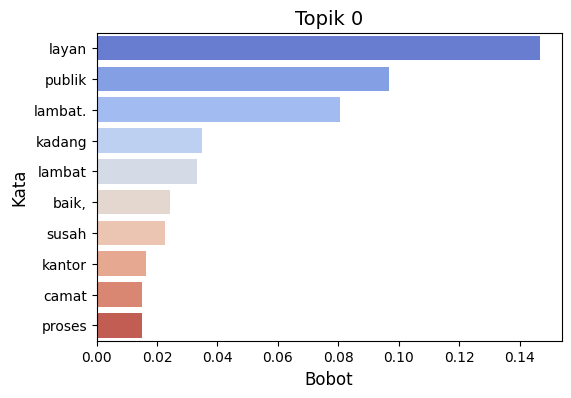

/tmp/ipython-input-4091173082.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='word', data=topic_df, palette="coolwarm")


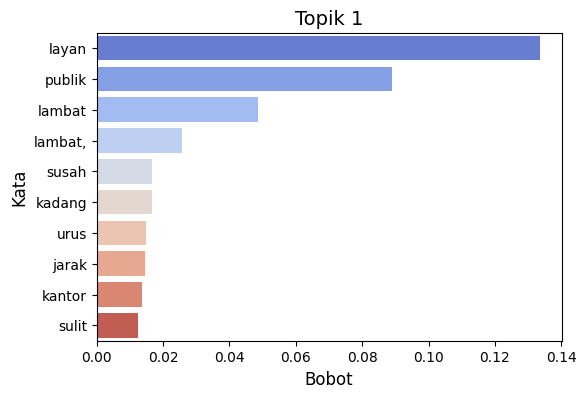

✅ Semua plot sudah disimpan di folder Google Drive: '/content/drive/My Drive/Data Tugas Akhir/LDA/Layanan Publik/Gambar'


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
from google.colab import drive

# 1. Mount Google Drive
drive.mount('/content/drive')

# 2. Tentukan folder output di Drive
output_folder = "/content/drive/My Drive/Data Tugas Akhir/LDA/Layanan Publik/Gambar"

# 3. Buat folder jika belum ada
os.makedirs(output_folder, exist_ok=True)

# Fungsi untuk membuat barplot dari df
def generate_barplot_from_df(df, topic_num):
    topic_df = df[df['topic_id'] == topic_num].sort_values(by='importance', ascending=False)

    plt.figure(figsize=(6, 4))
    sns.barplot(x='importance', y='word', data=topic_df, palette="coolwarm")
    plt.xlabel("Bobot", fontsize=12)
    plt.ylabel("Kata", fontsize=12)
    plt.title(f"Topik {topic_num}", fontsize=14)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    # Simpan gambar ke Google Drive
    filename = os.path.join(output_folder, f"topik_{topic_num}.png")
    plt.savefig(filename, bbox_inches='tight', dpi=300)
    plt.show()
    plt.close()

# Generate dan simpan semua topik
for topic_num in range(best_topics):
    generate_barplot_from_df(df, topic_num)

print(f"✅ Semua plot sudah disimpan di folder Google Drive: '{output_folder}'")